In [13]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [14]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json
import pandas as pd
from runAreaMask import * 
from skimage import measure
from matplotlib import _cntr as cntr
from time import time
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
def neighbor_widx(source):
    x=source[0]
    y=source[1]
    return (x+1,y),(x,y+1),(x-1,y),(x,y-1)

def index_item(pix_lst,item):
    for i,pix in enumerate(pix_lst):
        if str(list(pix))==str(list(item)):
             return i 

In [28]:
wmap  = pkl.load(open("pixel_em/10workers_rand0/obj1/voted_workers_mask.pkl"))
tiles= []
# Large outside tile 
x,y = np.where(wmap==0)
tiles.append(zip(x,y))
# Pixels voted by at least one worker
x,y = np.where(wmap!=0)
potential_pixs = np.array(zip(x,y))
#Compute the votes on each pixel 
votes = np.array([len(wmap[tuple(pix)]) for pix in potential_pixs])
# sort from lowest to highest number of votes  (low votes likely to be lone/small tiles)
srt_idx = np.argsort(votes)
srt_potential_pix = potential_pixs[srt_idx]

In [29]:
start = time()
tidx=1
while(len(srt_potential_pix)!=0):
    print "Tile ", tidx
    checked_pixs = []
    #print "srt_potential_pix length:", len(srt_potential_pix)
    source = tuple(srt_potential_pix[0])
    checked_pixs.append(source)
    srt_potential_pix=np.delete(srt_potential_pix,index_item(srt_potential_pix,source),axis=0)
    tiles.append([source])
    voted_workers = wmap[source]
    pidx =1
    #while (checked_pixs!=tiles[tidx]):
    potential_sources = [source]

    while (len(potential_sources)!=0):
#         print "Pix ", pidx
#         print "source:",source
#         print "tiles[tidx]:",tiles[tidx]
#         print "checked_pixs:",checked_pixs
#         print "potential_sources:",potential_sources
        at_least_one_connection=False
        for neighbor in neighbor_widx(source):
            if wmap[neighbor] == voted_workers:
                tiles[tidx].append(neighbor)
                # Remove added neighbor from potential pixels 
                found_idx = index_item(srt_potential_pix,neighbor)
                if found_idx==None:
                    #print "Neighbor already belong to another tile"
                    pass
                else: 
                    srt_potential_pix=np.delete(srt_potential_pix,found_idx,axis=0)
                    at_least_one_connection=True
                checked_pixs.append(neighbor)
#        if at_least_one_connection==False: 
#             potential_sources = [i for i in tiles[tidx] if i not in checked_pixs]

        # Identifying potential sources:
        potential_sources=[]
        for i in tiles[tidx]:
            if i not in checked_pixs:
                potential_sources.append(i)
#         print "potential_source after:",potential_sources            
        if len(potential_sources)==0:
            print "final tiles[tidx]:", tiles[tidx]
            print "len(srt_potential_pix):",len(srt_potential_pix)
#             print "new tile"
            break
        source = potential_sources[0]
        pidx+=1
    tidx+=1 #moving onto the next tile
end = time()
print "Elapsed Time: ", end-start

Tile  1
final tiles[tidx]: [(141, 326), (142, 326)]
len(srt_potential_pix): 28322
Tile  2
final tiles[tidx]: [(277, 259), (277, 258)]
len(srt_potential_pix): 28320
Tile  3
final tiles[tidx]: [(277, 257), (278, 257), (277, 258)]
len(srt_potential_pix): 28318
Tile  4
final tiles[tidx]: [(276, 421), (277, 421), (275, 421), (276, 420)]
len(srt_potential_pix): 28314
Tile  5
final tiles[tidx]: [(276, 260)]
len(srt_potential_pix): 28313
Tile  6
final tiles[tidx]: [(275, 420), (276, 420), (275, 421), (274, 420)]
len(srt_potential_pix): 28311
Tile  7
final tiles[tidx]: [(274, 421), (275, 421), (273, 421), (274, 420)]
len(srt_potential_pix): 28309
Tile  8
final tiles[tidx]: [(273, 420), (274, 420), (273, 421), (272, 420)]
len(srt_potential_pix): 28307
Tile  9
final tiles[tidx]: [(273, 263)]
len(srt_potential_pix): 28306
Tile  10
final tiles[tidx]: [(271, 420), (272, 420)]
len(srt_potential_pix): 28305
Tile  11
final tiles[tidx]: [(269, 265)]
len(srt_potential_pix): 28304
Tile  12
final tiles[tid

final tiles[tidx]: [(301, 418), (302, 418), (301, 419), (300, 418)]
len(srt_potential_pix): 28150
Tile  92
final tiles[tidx]: [(301, 204), (301, 203)]
len(srt_potential_pix): 28148
Tile  93
final tiles[tidx]: [(300, 419), (301, 419), (299, 419), (300, 418)]
len(srt_potential_pix): 28146
Tile  94
final tiles[tidx]: [(307, 191)]
len(srt_potential_pix): 28145
Tile  95
final tiles[tidx]: [(312, 416), (313, 416), (312, 417), (311, 416), (312, 415)]
len(srt_potential_pix): 28143
Tile  96
final tiles[tidx]: [(313, 415), (314, 415), (313, 416), (312, 415)]
len(srt_potential_pix): 28141
Tile  97
final tiles[tidx]: [(319, 182), (320, 182), (319, 181)]
len(srt_potential_pix): 28138
Tile  98
final tiles[tidx]: [(319, 180), (319, 181), (318, 180), (319, 179)]
len(srt_potential_pix): 28135
Tile  99
final tiles[tidx]: [(318, 416), (317, 416), (318, 415)]
len(srt_potential_pix): 28132
Tile  100
final tiles[tidx]: [(318, 414), (319, 414), (318, 415), (317, 414)]
len(srt_potential_pix): 28129
Tile  101


final tiles[tidx]: [(203, 370), (204, 370), (203, 369)]
len(srt_potential_pix): 27984
Tile  173
final tiles[tidx]: [(203, 368), (204, 368), (203, 369), (202, 368), (203, 367)]
len(srt_potential_pix): 27981
Tile  174
final tiles[tidx]: [(203, 298), (204, 298), (203, 297)]
len(srt_potential_pix): 27980
Tile  175
final tiles[tidx]: [(203, 296), (204, 296), (203, 297), (202, 296)]
len(srt_potential_pix): 27978
Tile  176
final tiles[tidx]: [(202, 369), (203, 369), (201, 369), (202, 368)]
len(srt_potential_pix): 27976
Tile  177
final tiles[tidx]: [(202, 367), (203, 367), (202, 368), (201, 367)]
len(srt_potential_pix): 27975
Tile  178
final tiles[tidx]: [(202, 297), (203, 297), (202, 296)]
len(srt_potential_pix): 27974
Tile  179
final tiles[tidx]: [(201, 368), (202, 368), (201, 369), (200, 368), (201, 367)]
len(srt_potential_pix): 27973
Tile  180
final tiles[tidx]: [(206, 369), (207, 369), (206, 370), (205, 369)]
len(srt_potential_pix): 27971
Tile  181
final tiles[tidx]: [(193, 367), (194, 36

final tiles[tidx]: [(219, 298), (220, 298), (219, 299), (218, 298)]
len(srt_potential_pix): 27838
Tile  261
final tiles[tidx]: [(218, 376), (219, 376), (218, 375)]
len(srt_potential_pix): 27836
Tile  262
final tiles[tidx]: [(212, 299), (213, 299), (212, 300), (211, 299), (212, 298)]
len(srt_potential_pix): 27831
Tile  263
final tiles[tidx]: [(212, 297), (213, 297), (212, 298), (211, 297)]
len(srt_potential_pix): 27828
Tile  264
final tiles[tidx]: [(211, 371), (212, 371), (210, 371)]
len(srt_potential_pix): 27825
Tile  265
final tiles[tidx]: [(211, 300), (212, 300), (210, 300), (211, 299)]
len(srt_potential_pix): 27823
Tile  266
final tiles[tidx]: [(211, 298), (212, 298), (211, 299), (210, 298), (211, 297)]
len(srt_potential_pix): 27821
Tile  267
final tiles[tidx]: [(210, 370), (210, 371), (209, 370)]
len(srt_potential_pix): 27819
Tile  268
final tiles[tidx]: [(210, 299), (211, 299), (210, 300), (209, 299), (210, 298)]
len(srt_potential_pix): 27817
Tile  269
final tiles[tidx]: [(210, 29

final tiles[tidx]: [(352, 258), (353, 258), (352, 259), (351, 258)]
len(srt_potential_pix): 27673
Tile  339
final tiles[tidx]: [(348, 372), (349, 372), (348, 373), (347, 372), (348, 371)]
len(srt_potential_pix): 27671
Tile  340
final tiles[tidx]: [(348, 370), (349, 370), (348, 371)]
len(srt_potential_pix): 27670
Tile  341
final tiles[tidx]: [(348, 258), (349, 258), (347, 258)]
len(srt_potential_pix): 27668
Tile  342
final tiles[tidx]: [(347, 374), (346, 374), (347, 373)]
len(srt_potential_pix): 27665
Tile  343
final tiles[tidx]: [(346, 375), (345, 375), (346, 374)]
len(srt_potential_pix): 27663
Tile  344
final tiles[tidx]: [(346, 373), (347, 373), (346, 374)]
len(srt_potential_pix): 27662
Tile  345
final tiles[tidx]: [(345, 376), (344, 376), (345, 375)]
len(srt_potential_pix): 27660
Tile  346
final tiles[tidx]: [(349, 369), (350, 369), (349, 370)]
len(srt_potential_pix): 27659
Tile  347
final tiles[tidx]: [(358, 259), (359, 259), (357, 259)]
len(srt_potential_pix): 27657
Tile  348
fina

final tiles[tidx]: [(373, 277), (374, 277), (373, 278), (373, 276)]
len(srt_potential_pix): 27513
Tile  422
final tiles[tidx]: [(372, 290), (372, 291), (372, 289)]
len(srt_potential_pix): 27511
Tile  423
final tiles[tidx]: [(372, 293), (371, 293), (372, 292)]
len(srt_potential_pix): 27510
Tile  424
final tiles[tidx]: [(372, 325), (372, 326)]
len(srt_potential_pix): 27508
Tile  425
final tiles[tidx]: [(373, 272), (374, 272), (373, 273), (373, 271)]
len(srt_potential_pix): 27506
Tile  426
final tiles[tidx]: [(373, 275), (374, 275), (373, 276), (373, 274)]
len(srt_potential_pix): 27505
Tile  427
final tiles[tidx]: [(169, 301), (168, 301)]
len(srt_potential_pix): 27503
Tile  428
final tiles[tidx]: [(345, 374), (346, 374), (345, 375)]
len(srt_potential_pix): 27502
Tile  429
final tiles[tidx]: [(344, 378), (343, 378), (344, 377)]
len(srt_potential_pix): 27499
Tile  430
final tiles[tidx]: [(325, 232), (326, 232), (325, 233), (324, 232), (325, 231)]
len(srt_potential_pix): 27494
Tile  431
fina

final tiles[tidx]: [(338, 403), (339, 403), (338, 404), (338, 402)]
len(srt_potential_pix): 27334
Tile  501
final tiles[tidx]: [(338, 399), (338, 398)]
len(srt_potential_pix): 27332
Tile  502
final tiles[tidx]: [(338, 397), (338, 398), (337, 397), (338, 396)]
len(srt_potential_pix): 27329
Tile  503
final tiles[tidx]: [(338, 395), (338, 396), (337, 395), (338, 394)]
len(srt_potential_pix): 27326
Tile  504
final tiles[tidx]: [(338, 392), (339, 392), (338, 393), (338, 391)]
len(srt_potential_pix): 27325
Tile  505
final tiles[tidx]: [(338, 262), (337, 262), (338, 261)]
len(srt_potential_pix): 27323
Tile  506
final tiles[tidx]: [(338, 260), (339, 260), (338, 261), (337, 260)]
len(srt_potential_pix): 27321
Tile  507
final tiles[tidx]: [(337, 407), (338, 407), (337, 408)]
len(srt_potential_pix): 27320
Tile  508
final tiles[tidx]: [(338, 401), (339, 401), (338, 402)]
len(srt_potential_pix): 27319
Tile  509
final tiles[tidx]: [(339, 404), (340, 404), (339, 405), (338, 404), (339, 403)]
len(srt_

final tiles[tidx]: [(147, 318), (148, 318), (147, 319)]
len(srt_potential_pix): 27182
Tile  589
final tiles[tidx]: [(153, 352), (153, 353)]
len(srt_potential_pix): 27180
Tile  590
final tiles[tidx]: [(150, 317), (149, 317), (150, 316)]
len(srt_potential_pix): 27178
Tile  591
final tiles[tidx]: [(166, 302), (167, 302), (165, 302)]
len(srt_potential_pix): 27177
Tile  592
final tiles[tidx]: [(146, 336), (146, 337)]
len(srt_potential_pix): 27175
Tile  593
final tiles[tidx]: [(146, 338), (146, 339), (146, 337)]
len(srt_potential_pix): 27173
Tile  594
final tiles[tidx]: [(144, 323), (145, 323), (144, 324)]
len(srt_potential_pix): 27170
Tile  595
final tiles[tidx]: [(143, 324), (144, 324), (143, 325)]
len(srt_potential_pix): 27168
Tile  596
final tiles[tidx]: [(144, 330), (144, 331), (143, 330), (144, 329)]
len(srt_potential_pix): 27165
Tile  597
final tiles[tidx]: [(153, 312)]
len(srt_potential_pix): 27164
Tile  598
final tiles[tidx]: [(144, 328), (145, 328), (144, 329), (143, 328), (144, 32

final tiles[tidx]: [(370, 298), (370, 299), (370, 297)]
len(srt_potential_pix): 26992
Tile  682
final tiles[tidx]: [(370, 296), (370, 297), (370, 295)]
len(srt_potential_pix): 26990
Tile  683
final tiles[tidx]: [(270, 419), (271, 419)]
len(srt_potential_pix): 26988
Tile  684
final tiles[tidx]: [(326, 260), (327, 260)]
len(srt_potential_pix): 26986
Tile  685
final tiles[tidx]: [(224, 382), (224, 381)]
len(srt_potential_pix): 26984
Tile  686
final tiles[tidx]: [(319, 413), (318, 413)]
len(srt_potential_pix): 26982
Tile  687
final tiles[tidx]: [(315, 180)]
len(srt_potential_pix): 26981
Tile  688
final tiles[tidx]: [(333, 260), (334, 260)]
len(srt_potential_pix): 26979
Tile  689
final tiles[tidx]: [(332, 409), (333, 409), (332, 408)]
len(srt_potential_pix): 26976
Tile  690
final tiles[tidx]: [(317, 181), (316, 181)]
len(srt_potential_pix): 26974
Tile  691
final tiles[tidx]: [(370, 322), (370, 321)]
len(srt_potential_pix): 26972
Tile  692
final tiles[tidx]: [(149, 344)]
len(srt_potential_pi

final tiles[tidx]: [(337, 403), (337, 402)]
len(srt_potential_pix): 26827
Tile  780
final tiles[tidx]: [(185, 296)]
len(srt_potential_pix): 26826
Tile  781
final tiles[tidx]: [(221, 377)]
len(srt_potential_pix): 26825
Tile  782
final tiles[tidx]: [(233, 291)]
len(srt_potential_pix): 26824
Tile  783
final tiles[tidx]: [(280, 255)]
len(srt_potential_pix): 26823
Tile  784
final tiles[tidx]: [(295, 225), (295, 224)]
len(srt_potential_pix): 26821
Tile  785
final tiles[tidx]: [(345, 373)]
len(srt_potential_pix): 26820
Tile  786
final tiles[tidx]: [(368, 268), (369, 268)]
len(srt_potential_pix): 26819
Tile  787
final tiles[tidx]: [(336, 391), (337, 391), (336, 392), (336, 390)]
len(srt_potential_pix): 26818
Tile  788
final tiles[tidx]: [(215, 371), (215, 372), (214, 371)]
len(srt_potential_pix): 26817
Tile  789
final tiles[tidx]: [(162, 360)]
len(srt_potential_pix): 26816
Tile  790
final tiles[tidx]: [(324, 240), (324, 241)]
len(srt_potential_pix): 26814
Tile  791
final tiles[tidx]: [(294, 22

final tiles[tidx]: [(145, 330), (145, 331)]
len(srt_potential_pix): 26678
Tile  878
final tiles[tidx]: [(334, 261), (335, 261), (334, 260)]
len(srt_potential_pix): 26677
Tile  879
final tiles[tidx]: [(197, 365), (198, 365), (196, 365)]
len(srt_potential_pix): 26676
Tile  880
final tiles[tidx]: [(201, 297), (201, 296)]
len(srt_potential_pix): 26675
Tile  881
final tiles[tidx]: [(236, 397), (237, 397)]
len(srt_potential_pix): 26673
Tile  882
final tiles[tidx]: [(145, 332), (146, 332), (145, 331)]
len(srt_potential_pix): 26672
Tile  883
final tiles[tidx]: [(154, 353)]
len(srt_potential_pix): 26671
Tile  884
final tiles[tidx]: [(255, 412), (254, 412)]
len(srt_potential_pix): 26669
Tile  885
final tiles[tidx]: [(353, 365)]
len(srt_potential_pix): 26668
Tile  886
final tiles[tidx]: [(377, 333)]
len(srt_potential_pix): 26667
Tile  887
final tiles[tidx]: [(376, 350)]
len(srt_potential_pix): 26666
Tile  888
final tiles[tidx]: [(197, 295)]
len(srt_potential_pix): 26665
Tile  889
final tiles[tidx

final tiles[tidx]: [(321, 233), (322, 233), (321, 232)]
len(srt_potential_pix): 26515
Tile  983
final tiles[tidx]: [(273, 419)]
len(srt_potential_pix): 26514
Tile  984
final tiles[tidx]: [(310, 414)]
len(srt_potential_pix): 26513
Tile  985
final tiles[tidx]: [(274, 263)]
len(srt_potential_pix): 26512
Tile  986
final tiles[tidx]: [(323, 211), (323, 210)]
len(srt_potential_pix): 26510
Tile  987
final tiles[tidx]: [(337, 264)]
len(srt_potential_pix): 26509
Tile  988
final tiles[tidx]: [(314, 182)]
len(srt_potential_pix): 26508
Tile  989
final tiles[tidx]: [(323, 209), (323, 210), (323, 208)]
len(srt_potential_pix): 26506
Tile  990
final tiles[tidx]: [(336, 389)]
len(srt_potential_pix): 26505
Tile  991
final tiles[tidx]: [(345, 260)]
len(srt_potential_pix): 26504
Tile  992
final tiles[tidx]: [(200, 365)]
len(srt_potential_pix): 26503
Tile  993
final tiles[tidx]: [(278, 260), (278, 259)]
len(srt_potential_pix): 26501
Tile  994
final tiles[tidx]: [(257, 274), (258, 274), (257, 275), (256, 27

final tiles[tidx]: [(281, 256), (282, 256), (281, 257), (280, 256), (281, 255)]
len(srt_potential_pix): 26357
Tile  1086
final tiles[tidx]: [(307, 193)]
len(srt_potential_pix): 26356
Tile  1087
final tiles[tidx]: [(248, 279), (249, 279), (248, 280)]
len(srt_potential_pix): 26353
Tile  1088
final tiles[tidx]: [(375, 350)]
len(srt_potential_pix): 26352
Tile  1089
final tiles[tidx]: [(224, 380)]
len(srt_potential_pix): 26351
Tile  1090
final tiles[tidx]: [(146, 330), (146, 329)]
len(srt_potential_pix): 26349
Tile  1091
final tiles[tidx]: [(380, 340), (380, 341)]
len(srt_potential_pix): 26347
Tile  1092
final tiles[tidx]: [(326, 261), (327, 261)]
len(srt_potential_pix): 26345
Tile  1093
final tiles[tidx]: [(338, 384)]
len(srt_potential_pix): 26344
Tile  1094
final tiles[tidx]: [(369, 312), (369, 311)]
len(srt_potential_pix): 26342
Tile  1095
final tiles[tidx]: [(230, 389)]
len(srt_potential_pix): 26341
Tile  1096
final tiles[tidx]: [(377, 349)]
len(srt_potential_pix): 26340
Tile  1097
fina

final tiles[tidx]: [(295, 226), (295, 227)]
len(srt_potential_pix): 26210
Tile  1192
final tiles[tidx]: [(266, 417), (267, 417), (265, 417)]
len(srt_potential_pix): 26207
Tile  1193
final tiles[tidx]: [(301, 210), (301, 211), (301, 209)]
len(srt_potential_pix): 26204
Tile  1194
final tiles[tidx]: [(309, 190)]
len(srt_potential_pix): 26203
Tile  1195
final tiles[tidx]: [(230, 388)]
len(srt_potential_pix): 26202
Tile  1196
final tiles[tidx]: [(152, 315)]
len(srt_potential_pix): 26201
Tile  1197
final tiles[tidx]: [(282, 257)]
len(srt_potential_pix): 26200
Tile  1198
final tiles[tidx]: [(157, 355)]
len(srt_potential_pix): 26199
Tile  1199
final tiles[tidx]: [(294, 233)]
len(srt_potential_pix): 26198
Tile  1200
final tiles[tidx]: [(301, 416)]
len(srt_potential_pix): 26197
Tile  1201
final tiles[tidx]: [(338, 383)]
len(srt_potential_pix): 26196
Tile  1202
final tiles[tidx]: [(186, 297), (187, 297)]
len(srt_potential_pix): 26194
Tile  1203
final tiles[tidx]: [(249, 280)]
len(srt_potential_pi

final tiles[tidx]: [(300, 215), (299, 215), (300, 214)]
len(srt_potential_pix): 26044
Tile  1295
final tiles[tidx]: [(276, 262)]
len(srt_potential_pix): 26043
Tile  1296
final tiles[tidx]: [(226, 299), (226, 300)]
len(srt_potential_pix): 26041
Tile  1297
final tiles[tidx]: [(236, 395), (235, 395)]
len(srt_potential_pix): 26040
Tile  1298
final tiles[tidx]: [(329, 261), (330, 261), (329, 262), (328, 261)]
len(srt_potential_pix): 26037
Tile  1299
final tiles[tidx]: [(193, 295), (194, 295)]
len(srt_potential_pix): 26036
Tile  1300
final tiles[tidx]: [(325, 196), (325, 197)]
len(srt_potential_pix): 26034
Tile  1301
final tiles[tidx]: [(218, 304), (219, 304), (218, 303)]
len(srt_potential_pix): 26031
Tile  1302
final tiles[tidx]: [(365, 267), (366, 267), (365, 266)]
len(srt_potential_pix): 26028
Tile  1303
final tiles[tidx]: [(331, 407), (331, 408)]
len(srt_potential_pix): 26026
Tile  1304
final tiles[tidx]: [(378, 337)]
len(srt_potential_pix): 26025
Tile  1305
final tiles[tidx]: [(237, 396

final tiles[tidx]: [(359, 262), (360, 262)]
len(srt_potential_pix): 25883
Tile  1409
final tiles[tidx]: [(253, 410), (254, 410)]
len(srt_potential_pix): 25881
Tile  1410
final tiles[tidx]: [(335, 266), (336, 266), (334, 266), (335, 265)]
len(srt_potential_pix): 25877
Tile  1411
final tiles[tidx]: [(241, 286)]
len(srt_potential_pix): 25876
Tile  1412
final tiles[tidx]: [(371, 276), (371, 277)]
len(srt_potential_pix): 25874
Tile  1413
final tiles[tidx]: [(334, 395)]
len(srt_potential_pix): 25873
Tile  1414
final tiles[tidx]: [(271, 418), (272, 418), (270, 418)]
len(srt_potential_pix): 25870
Tile  1415
final tiles[tidx]: [(338, 381), (338, 382)]
len(srt_potential_pix): 25868
Tile  1416
final tiles[tidx]: [(175, 300), (176, 300)]
len(srt_potential_pix): 25866
Tile  1417
final tiles[tidx]: [(230, 295)]
len(srt_potential_pix): 25865
Tile  1418
final tiles[tidx]: [(370, 352)]
len(srt_potential_pix): 25864
Tile  1419
final tiles[tidx]: [(244, 283), (245, 283)]
len(srt_potential_pix): 25862
Til

final tiles[tidx]: [(196, 364), (195, 364)]
len(srt_potential_pix): 25721
Tile  1510
final tiles[tidx]: [(295, 231), (295, 230)]
len(srt_potential_pix): 25719
Tile  1511
final tiles[tidx]: [(214, 303), (215, 303)]
len(srt_potential_pix): 25717
Tile  1512
final tiles[tidx]: [(199, 364), (200, 364)]
len(srt_potential_pix): 25716
Tile  1513
final tiles[tidx]: [(331, 265), (330, 265)]
len(srt_potential_pix): 25715
Tile  1514
final tiles[tidx]: [(197, 296)]
len(srt_potential_pix): 25714
Tile  1515
final tiles[tidx]: [(202, 300)]
len(srt_potential_pix): 25713
Tile  1516
final tiles[tidx]: [(268, 417)]
len(srt_potential_pix): 25712
Tile  1517
final tiles[tidx]: [(278, 261), (279, 261)]
len(srt_potential_pix): 25710
Tile  1518
final tiles[tidx]: [(318, 412)]
len(srt_potential_pix): 25709
Tile  1519
final tiles[tidx]: [(353, 363)]
len(srt_potential_pix): 25708
Tile  1520
final tiles[tidx]: [(304, 202)]
len(srt_potential_pix): 25707
Tile  1521
final tiles[tidx]: [(215, 370)]
len(srt_potential_pi

final tiles[tidx]: [(290, 243), (290, 244)]
len(srt_potential_pix): 25579
Tile  1623
final tiles[tidx]: [(199, 297)]
len(srt_potential_pix): 25578
Tile  1624
final tiles[tidx]: [(228, 384)]
len(srt_potential_pix): 25577
Tile  1625
final tiles[tidx]: [(205, 301), (206, 301)]
len(srt_potential_pix): 25575
Tile  1626
final tiles[tidx]: [(169, 302)]
len(srt_potential_pix): 25574
Tile  1627
final tiles[tidx]: [(311, 189)]
len(srt_potential_pix): 25573
Tile  1628
final tiles[tidx]: [(306, 414), (307, 414)]
len(srt_potential_pix): 25571
Tile  1629
final tiles[tidx]: [(236, 394)]
len(srt_potential_pix): 25570
Tile  1630
final tiles[tidx]: [(193, 364)]
len(srt_potential_pix): 25569
Tile  1631
final tiles[tidx]: [(300, 217)]
len(srt_potential_pix): 25568
Tile  1632
final tiles[tidx]: [(355, 262), (356, 262), (354, 262)]
len(srt_potential_pix): 25565
Tile  1633
final tiles[tidx]: [(378, 341), (378, 340)]
len(srt_potential_pix): 25563
Tile  1634
final tiles[tidx]: [(200, 298)]
len(srt_potential_pi

final tiles[tidx]: [(335, 386), (335, 387)]
len(srt_potential_pix): 25420
Tile  1722
final tiles[tidx]: [(370, 278), (370, 277)]
len(srt_potential_pix): 25419
Tile  1723
final tiles[tidx]: [(165, 304)]
len(srt_potential_pix): 25418
Tile  1724
final tiles[tidx]: [(345, 261), (346, 261)]
len(srt_potential_pix): 25416
Tile  1725
final tiles[tidx]: [(217, 371)]
len(srt_potential_pix): 25415
Tile  1726
final tiles[tidx]: [(323, 251), (323, 252)]
len(srt_potential_pix): 25413
Tile  1727
final tiles[tidx]: [(323, 253), (323, 254), (323, 252)]
len(srt_potential_pix): 25411
Tile  1728
final tiles[tidx]: [(361, 264)]
len(srt_potential_pix): 25410
Tile  1729
final tiles[tidx]: [(323, 255), (323, 254)]
len(srt_potential_pix): 25409
Tile  1730
final tiles[tidx]: [(175, 364)]
len(srt_potential_pix): 25408
Tile  1731
final tiles[tidx]: [(212, 303), (213, 303)]
len(srt_potential_pix): 25406
Tile  1732
final tiles[tidx]: [(286, 419), (285, 419)]
len(srt_potential_pix): 25404
Tile  1733
final tiles[tidx

final tiles[tidx]: [(292, 240), (291, 240), (292, 239)]
len(srt_potential_pix): 25277
Tile  1827
final tiles[tidx]: [(282, 258)]
len(srt_potential_pix): 25276
Tile  1828
final tiles[tidx]: [(158, 355)]
len(srt_potential_pix): 25275
Tile  1829
final tiles[tidx]: [(263, 272)]
len(srt_potential_pix): 25274
Tile  1830
final tiles[tidx]: [(370, 325)]
len(srt_potential_pix): 25273
Tile  1831
final tiles[tidx]: [(332, 404), (332, 403)]
len(srt_potential_pix): 25271
Tile  1832
final tiles[tidx]: [(150, 319)]
len(srt_potential_pix): 25270
Tile  1833
final tiles[tidx]: [(326, 265), (327, 265), (326, 264)]
len(srt_potential_pix): 25269
Tile  1834
final tiles[tidx]: [(323, 241)]
len(srt_potential_pix): 25268
Tile  1835
final tiles[tidx]: [(219, 373)]
len(srt_potential_pix): 25267
Tile  1836
final tiles[tidx]: [(232, 294)]
len(srt_potential_pix): 25266
Tile  1837
final tiles[tidx]: [(306, 198)]
len(srt_potential_pix): 25265
Tile  1838
final tiles[tidx]: [(298, 222), (298, 223)]
len(srt_potential_pi

final tiles[tidx]: [(315, 185), (314, 185), (315, 184)]
len(srt_potential_pix): 25120
Tile  1928
final tiles[tidx]: [(323, 187)]
len(srt_potential_pix): 25119
Tile  1929
final tiles[tidx]: [(339, 377), (339, 378)]
len(srt_potential_pix): 25117
Tile  1930
final tiles[tidx]: [(306, 201), (306, 200)]
len(srt_potential_pix): 25115
Tile  1931
final tiles[tidx]: [(230, 298), (229, 298), (230, 297)]
len(srt_potential_pix): 25114
Tile  1932
final tiles[tidx]: [(352, 262), (351, 262)]
len(srt_potential_pix): 25113
Tile  1933
final tiles[tidx]: [(306, 199), (306, 200)]
len(srt_potential_pix): 25112
Tile  1934
final tiles[tidx]: [(230, 296), (231, 296), (230, 297)]
len(srt_potential_pix): 25110
Tile  1935
final tiles[tidx]: [(335, 268), (336, 268), (334, 268), (335, 267)]
len(srt_potential_pix): 25106
Tile  1936
final tiles[tidx]: [(244, 284)]
len(srt_potential_pix): 25105
Tile  1937
final tiles[tidx]: [(329, 267), (328, 267)]
len(srt_potential_pix): 25104
Tile  1938
final tiles[tidx]: [(226, 302

final tiles[tidx]: [(321, 208), (322, 208), (321, 209), (321, 207)]
len(srt_potential_pix): 24957
Tile  2023
final tiles[tidx]: [(319, 229), (319, 228)]
len(srt_potential_pix): 24956
Tile  2024
final tiles[tidx]: [(363, 266), (362, 266)]
len(srt_potential_pix): 24954
Tile  2025
final tiles[tidx]: [(186, 365), (185, 365)]
len(srt_potential_pix): 24953
Tile  2026
final tiles[tidx]: [(370, 279), (370, 280)]
len(srt_potential_pix): 24952
Tile  2027
final tiles[tidx]: [(369, 285), (369, 286)]
len(srt_potential_pix): 24950
Tile  2028
final tiles[tidx]: [(260, 413)]
len(srt_potential_pix): 24949
Tile  2029
final tiles[tidx]: [(320, 223)]
len(srt_potential_pix): 24948
Tile  2030
final tiles[tidx]: [(364, 267)]
len(srt_potential_pix): 24947
Tile  2031
final tiles[tidx]: [(369, 291)]
len(srt_potential_pix): 24946
Tile  2032
final tiles[tidx]: [(182, 300), (183, 300), (181, 300)]
len(srt_potential_pix): 24943
Tile  2033
final tiles[tidx]: [(192, 299), (193, 299), (191, 299)]
len(srt_potential_pix

final tiles[tidx]: [(373, 335), (374, 335), (373, 334)]
len(srt_potential_pix): 24812
Tile  2114
final tiles[tidx]: [(373, 332), (373, 333), (372, 332)]
len(srt_potential_pix): 24811
Tile  2115
final tiles[tidx]: [(148, 325), (148, 326)]
len(srt_potential_pix): 24809
Tile  2116
final tiles[tidx]: [(260, 275), (259, 275)]
len(srt_potential_pix): 24808
Tile  2117
final tiles[tidx]: [(171, 303), (170, 303), (171, 302)]
len(srt_potential_pix): 24805
Tile  2118
final tiles[tidx]: [(170, 362)]
len(srt_potential_pix): 24804
Tile  2119
final tiles[tidx]: [(148, 330), (148, 331)]
len(srt_potential_pix): 24803
Tile  2120
final tiles[tidx]: [(375, 337)]
len(srt_potential_pix): 24802
Tile  2121
final tiles[tidx]: [(377, 340)]
len(srt_potential_pix): 24801
Tile  2122
final tiles[tidx]: [(355, 361)]
len(srt_potential_pix): 24800
Tile  2123
final tiles[tidx]: [(362, 356)]
len(srt_potential_pix): 24799
Tile  2124
final tiles[tidx]: [(360, 357)]
len(srt_potential_pix): 24798
Tile  2125
final tiles[tidx

final tiles[tidx]: [(319, 201), (320, 201), (319, 202), (319, 200)]
len(srt_potential_pix): 24627
Tile  2210
final tiles[tidx]: [(319, 199), (320, 199), (319, 200)]
len(srt_potential_pix): 24625
Tile  2211
final tiles[tidx]: [(188, 300), (187, 300)]
len(srt_potential_pix): 24623
Tile  2212
final tiles[tidx]: [(363, 354), (364, 354), (363, 355), (362, 354)]
len(srt_potential_pix): 24620
Tile  2213
final tiles[tidx]: [(151, 322), (151, 323), (150, 322), (151, 321)]
len(srt_potential_pix): 24616
Tile  2214
final tiles[tidx]: [(151, 320), (152, 320), (151, 321), (151, 319)]
len(srt_potential_pix): 24613
Tile  2215
final tiles[tidx]: [(157, 353)]
len(srt_potential_pix): 24612
Tile  2216
final tiles[tidx]: [(242, 286)]
len(srt_potential_pix): 24611
Tile  2217
final tiles[tidx]: [(348, 263)]
len(srt_potential_pix): 24610
Tile  2218
final tiles[tidx]: [(168, 305), (169, 305), (167, 305)]
len(srt_potential_pix): 24607
Tile  2219
final tiles[tidx]: [(162, 307), (163, 307), (162, 308)]
len(srt_po

final tiles[tidx]: [(370, 329), (371, 329), (370, 330), (370, 328)]
len(srt_potential_pix): 24449
Tile  2307
final tiles[tidx]: [(229, 384)]
len(srt_potential_pix): 24448
Tile  2308
final tiles[tidx]: [(340, 268), (339, 268), (340, 267)]
len(srt_potential_pix): 24445
Tile  2309
final tiles[tidx]: [(375, 346), (376, 346), (375, 347)]
len(srt_potential_pix): 24442
Tile  2310
final tiles[tidx]: [(375, 348), (376, 348), (374, 348), (375, 347)]
len(srt_potential_pix): 24439
Tile  2311
final tiles[tidx]: [(376, 339), (376, 340), (375, 339)]
len(srt_potential_pix): 24436
Tile  2312
final tiles[tidx]: [(376, 341), (377, 341), (376, 340)]
len(srt_potential_pix): 24434
Tile  2313
final tiles[tidx]: [(376, 347), (377, 347), (376, 348), (375, 347), (376, 346)]
len(srt_potential_pix): 24432
Tile  2314
final tiles[tidx]: [(377, 342), (377, 343), (377, 341)]
len(srt_potential_pix): 24430
Tile  2315
final tiles[tidx]: [(163, 358)]
len(srt_potential_pix): 24429
Tile  2316
final tiles[tidx]: [(171, 304)

final tiles[tidx]: [(222, 306), (223, 306)]
len(srt_potential_pix): 24286
Tile  2399
final tiles[tidx]: [(368, 290), (369, 290), (368, 291), (368, 289)]
len(srt_potential_pix): 24284
Tile  2400
final tiles[tidx]: [(337, 376), (338, 376), (337, 377)]
len(srt_potential_pix): 24283
Tile  2401
final tiles[tidx]: [(283, 259), (284, 259)]
len(srt_potential_pix): 24282
Tile  2402
final tiles[tidx]: [(368, 292), (368, 293), (368, 291)]
len(srt_potential_pix): 24281
Tile  2403
final tiles[tidx]: [(368, 294), (368, 295), (367, 294), (368, 293)]
len(srt_potential_pix): 24280
Tile  2404
final tiles[tidx]: [(222, 375)]
len(srt_potential_pix): 24279
Tile  2405
final tiles[tidx]: [(295, 237), (295, 236)]
len(srt_potential_pix): 24277
Tile  2406
final tiles[tidx]: [(368, 326), (369, 326), (368, 327), (368, 325)]
len(srt_potential_pix): 24276
Tile  2407
final tiles[tidx]: [(337, 379), (336, 379), (337, 378)]
len(srt_potential_pix): 24275
Tile  2408
final tiles[tidx]: [(368, 296), (368, 297), (367, 296)

final tiles[tidx]: [(163, 308), (162, 308), (163, 307)]
len(srt_potential_pix): 24142
Tile  2489
final tiles[tidx]: [(298, 416), (297, 416)]
len(srt_potential_pix): 24141
Tile  2490
final tiles[tidx]: [(207, 302), (208, 302), (207, 303), (206, 302)]
len(srt_potential_pix): 24139
Tile  2491
final tiles[tidx]: [(352, 361), (353, 361), (352, 362), (351, 361)]
len(srt_potential_pix): 24138
Tile  2492
final tiles[tidx]: [(335, 270), (336, 270), (335, 271), (334, 270), (335, 269)]
len(srt_potential_pix): 24137
Tile  2493
final tiles[tidx]: [(329, 268), (330, 268)]
len(srt_potential_pix): 24135
Tile  2494
final tiles[tidx]: [(240, 398)]
len(srt_potential_pix): 24134
Tile  2495
final tiles[tidx]: [(355, 359), (356, 359), (355, 360), (354, 359)]
len(srt_potential_pix): 24132
Tile  2496
final tiles[tidx]: [(208, 365)]
len(srt_potential_pix): 24131
Tile  2497
final tiles[tidx]: [(358, 358), (357, 358), (358, 357)]
len(srt_potential_pix): 24130
Tile  2498
final tiles[tidx]: [(315, 186)]
len(srt_po

final tiles[tidx]: [(367, 279), (368, 279), (367, 280), (367, 278)]
len(srt_potential_pix): 23945
Tile  2579
final tiles[tidx]: [(367, 281), (368, 281), (367, 282), (366, 281), (367, 280)]
len(srt_potential_pix): 23944
Tile  2580
final tiles[tidx]: [(161, 311), (161, 312), (160, 311), (161, 310)]
len(srt_potential_pix): 23940
Tile  2581
final tiles[tidx]: [(367, 283), (368, 283), (367, 284), (366, 283), (367, 282)]
len(srt_potential_pix): 23939
Tile  2582
final tiles[tidx]: [(309, 196), (310, 196), (309, 197)]
len(srt_potential_pix): 23936
Tile  2583
final tiles[tidx]: [(343, 367), (344, 367), (343, 368)]
len(srt_potential_pix): 23933
Tile  2584
final tiles[tidx]: [(327, 408)]
len(srt_potential_pix): 23932
Tile  2585
final tiles[tidx]: [(366, 326), (367, 326), (366, 325)]
len(srt_potential_pix): 23929
Tile  2586
final tiles[tidx]: [(367, 290), (367, 291), (366, 290), (367, 289)]
len(srt_potential_pix): 23928
Tile  2587
final tiles[tidx]: [(160, 310), (161, 310), (160, 311)]
len(srt_pot

final tiles[tidx]: [(373, 346), (374, 346), (373, 347), (372, 346)]
len(srt_potential_pix): 23728
Tile  2665
final tiles[tidx]: [(354, 358), (355, 358), (353, 358)]
len(srt_potential_pix): 23725
Tile  2666
final tiles[tidx]: [(356, 264), (357, 264), (355, 264)]
len(srt_potential_pix): 23722
Tile  2667
final tiles[tidx]: [(339, 372)]
len(srt_potential_pix): 23721
Tile  2668
final tiles[tidx]: [(318, 226), (319, 226), (318, 227), (317, 226), (318, 225)]
len(srt_potential_pix): 23717
Tile  2669
final tiles[tidx]: [(372, 338), (373, 338), (372, 337)]
len(srt_potential_pix): 23715
Tile  2670
final tiles[tidx]: [(371, 348), (370, 348), (371, 347)]
len(srt_potential_pix): 23713
Tile  2671
final tiles[tidx]: [(226, 306), (227, 306), (226, 307), (225, 306), (226, 305)]
len(srt_potential_pix): 23711
Tile  2672
final tiles[tidx]: [(226, 304), (227, 304), (226, 305)]
len(srt_potential_pix): 23710
Tile  2673
final tiles[tidx]: [(371, 346), (372, 346), (371, 347)]
len(srt_potential_pix): 23709
Tile 

final tiles[tidx]: [(334, 273), (335, 273), (334, 272)]
len(srt_potential_pix): 23562
Tile  2754
final tiles[tidx]: [(196, 301), (197, 301)]
len(srt_potential_pix): 23561
Tile  2755
final tiles[tidx]: [(222, 374)]
len(srt_potential_pix): 23560
Tile  2756
final tiles[tidx]: [(368, 350), (367, 350), (368, 349)]
len(srt_potential_pix): 23559
Tile  2757
final tiles[tidx]: [(368, 348), (369, 348), (368, 349), (368, 347)]
len(srt_potential_pix): 23558
Tile  2758
final tiles[tidx]: [(310, 197), (310, 198), (309, 197), (310, 196)]
len(srt_potential_pix): 23557
Tile  2759
final tiles[tidx]: [(295, 239), (295, 238)]
len(srt_potential_pix): 23555
Tile  2760
final tiles[tidx]: [(155, 316), (156, 316), (155, 317)]
len(srt_potential_pix): 23553
Tile  2761
final tiles[tidx]: [(150, 339), (150, 340), (150, 338)]
len(srt_potential_pix): 23551
Tile  2762
final tiles[tidx]: [(342, 267), (341, 267), (342, 266)]
len(srt_potential_pix): 23549
Tile  2763
final tiles[tidx]: [(152, 323), (153, 323), (152, 324)

final tiles[tidx]: [(308, 199), (309, 199), (308, 200), (308, 198)]
len(srt_potential_pix): 23400
Tile  2840
final tiles[tidx]: [(320, 196), (321, 196), (320, 197)]
len(srt_potential_pix): 23399
Tile  2841
final tiles[tidx]: [(335, 379), (335, 380)]
len(srt_potential_pix): 23397
Tile  2842
final tiles[tidx]: [(319, 207), (319, 208)]
len(srt_potential_pix): 23396
Tile  2843
final tiles[tidx]: [(320, 220), (320, 221), (319, 220), (320, 219)]
len(srt_potential_pix): 23395
Tile  2844
final tiles[tidx]: [(215, 306), (216, 306), (214, 306)]
len(srt_potential_pix): 23392
Tile  2845
final tiles[tidx]: [(319, 198)]
len(srt_potential_pix): 23391
Tile  2846
final tiles[tidx]: [(260, 410), (260, 411), (259, 410)]
len(srt_potential_pix): 23388
Tile  2847
final tiles[tidx]: [(349, 263), (350, 263)]
len(srt_potential_pix): 23386
Tile  2848
final tiles[tidx]: [(319, 225), (319, 226), (318, 225), (319, 224)]
len(srt_potential_pix): 23385
Tile  2849
final tiles[tidx]: [(317, 227), (318, 227), (317, 228)

final tiles[tidx]: [(349, 360), (350, 360), (349, 361)]
len(srt_potential_pix): 23258
Tile  2926
final tiles[tidx]: [(240, 288)]
len(srt_potential_pix): 23257
Tile  2927
final tiles[tidx]: [(189, 362), (190, 362), (189, 363), (188, 362)]
len(srt_potential_pix): 23256
Tile  2928
final tiles[tidx]: [(189, 364), (190, 364), (188, 364), (189, 363)]
len(srt_potential_pix): 23255
Tile  2929
final tiles[tidx]: [(320, 253), (321, 253), (320, 254)]
len(srt_potential_pix): 23254
Tile  2930
final tiles[tidx]: [(183, 364), (184, 364), (182, 364), (183, 363)]
len(srt_potential_pix): 23252
Tile  2931
final tiles[tidx]: [(365, 290), (366, 290), (365, 291), (365, 289)]
len(srt_potential_pix): 23251
Tile  2932
final tiles[tidx]: [(320, 257), (321, 257), (320, 258), (320, 256)]
len(srt_potential_pix): 23250
Tile  2933
final tiles[tidx]: [(244, 285)]
len(srt_potential_pix): 23249
Tile  2934
final tiles[tidx]: [(317, 184), (317, 185)]
len(srt_potential_pix): 23248
Tile  2935
final tiles[tidx]: [(314, 189)

final tiles[tidx]: [(310, 248), (311, 248), (310, 249), (309, 248), (310, 247)]
len(srt_potential_pix): 23094
Tile  3006
final tiles[tidx]: [(310, 250), (311, 250), (310, 251), (309, 250), (310, 249)]
len(srt_potential_pix): 23090
Tile  3007
final tiles[tidx]: [(311, 208), (312, 208), (311, 209), (310, 208), (311, 207)]
len(srt_potential_pix): 23086
Tile  3008
final tiles[tidx]: [(311, 201), (312, 201), (311, 202), (310, 201), (311, 200)]
len(srt_potential_pix): 23081
Tile  3009
final tiles[tidx]: [(311, 241), (312, 241), (311, 242), (310, 241), (311, 240)]
len(srt_potential_pix): 23080
Tile  3010
final tiles[tidx]: [(311, 243), (312, 243), (311, 244), (310, 243), (311, 242)]
len(srt_potential_pix): 23079
Tile  3011
final tiles[tidx]: [(310, 336), (311, 336), (310, 337), (309, 336), (310, 335)]
len(srt_potential_pix): 23075
Tile  3012
final tiles[tidx]: [(310, 334), (311, 334), (310, 335), (309, 334), (310, 333)]
len(srt_potential_pix): 23071
Tile  3013
final tiles[tidx]: [(311, 321), 

final tiles[tidx]: [(310, 317), (311, 317), (310, 318), (309, 317), (310, 316)]
len(srt_potential_pix): 22850
Tile  3074
final tiles[tidx]: [(311, 386), (312, 386), (311, 387), (310, 386), (311, 385)]
len(srt_potential_pix): 22845
Tile  3075
final tiles[tidx]: [(311, 384), (312, 384), (311, 385), (310, 384), (311, 383)]
len(srt_potential_pix): 22841
Tile  3076
final tiles[tidx]: [(310, 400), (311, 400), (310, 401), (309, 400), (310, 399)]
len(srt_potential_pix): 22836
Tile  3077
final tiles[tidx]: [(310, 402), (311, 402), (310, 403), (309, 402), (310, 401)]
len(srt_potential_pix): 22832
Tile  3078
final tiles[tidx]: [(311, 381), (312, 381), (311, 382), (310, 381), (311, 380)]
len(srt_potential_pix): 22827
Tile  3079
final tiles[tidx]: [(312, 199), (313, 199), (312, 200), (311, 199), (312, 198)]
len(srt_potential_pix): 22824
Tile  3080
final tiles[tidx]: [(311, 379), (312, 379), (311, 380), (310, 379), (311, 378)]
len(srt_potential_pix): 22820
Tile  3081
final tiles[tidx]: [(311, 288), 

final tiles[tidx]: [(311, 344), (312, 344), (311, 345), (310, 344), (311, 343)]
len(srt_potential_pix): 22643
Tile  3142
final tiles[tidx]: [(310, 259), (311, 259), (310, 260), (309, 259), (310, 258)]
len(srt_potential_pix): 22639
Tile  3143
final tiles[tidx]: [(310, 257), (311, 257), (310, 258), (309, 257), (310, 256)]
len(srt_potential_pix): 22635
Tile  3144
final tiles[tidx]: [(310, 255), (311, 255), (310, 256), (309, 255), (310, 254)]
len(srt_potential_pix): 22631
Tile  3145
final tiles[tidx]: [(310, 253), (311, 253), (310, 254), (309, 253), (310, 252)]
len(srt_potential_pix): 22627
Tile  3146
final tiles[tidx]: [(311, 348), (312, 348), (311, 349), (310, 348), (311, 347)]
len(srt_potential_pix): 22624
Tile  3147
final tiles[tidx]: [(311, 342), (312, 342), (311, 343), (310, 342), (311, 341)]
len(srt_potential_pix): 22622
Tile  3148
final tiles[tidx]: [(312, 238), (313, 238), (312, 239), (311, 238), (312, 237)]
len(srt_potential_pix): 22620
Tile  3149
final tiles[tidx]: [(312, 224), 

final tiles[tidx]: [(316, 244), (317, 244), (316, 245), (315, 244), (316, 243)]
len(srt_potential_pix): 22463
Tile  3211
final tiles[tidx]: [(316, 242), (317, 242), (316, 243), (315, 242), (316, 241)]
len(srt_potential_pix): 22459
Tile  3212
final tiles[tidx]: [(316, 240), (317, 240), (316, 241), (315, 240), (316, 239)]
len(srt_potential_pix): 22455
Tile  3213
final tiles[tidx]: [(316, 257), (317, 257), (316, 258), (315, 257), (316, 256)]
len(srt_potential_pix): 22451
Tile  3214
final tiles[tidx]: [(316, 259), (317, 259), (316, 260), (315, 259), (316, 258)]
len(srt_potential_pix): 22447
Tile  3215
final tiles[tidx]: [(316, 275), (317, 275), (316, 276), (315, 275), (316, 274)]
len(srt_potential_pix): 22442
Tile  3216
final tiles[tidx]: [(316, 273), (317, 273), (316, 274), (315, 273), (316, 272)]
len(srt_potential_pix): 22438
Tile  3217
final tiles[tidx]: [(316, 271), (317, 271), (316, 272), (315, 271), (316, 270)]
len(srt_potential_pix): 22434
Tile  3218
final tiles[tidx]: [(316, 269), 

final tiles[tidx]: [(316, 194), (317, 194), (316, 195), (315, 194), (316, 193)]
len(srt_potential_pix): 22178
Tile  3281
final tiles[tidx]: [(315, 320), (316, 320), (315, 321), (314, 320), (315, 319)]
len(srt_potential_pix): 22176
Tile  3282
final tiles[tidx]: [(315, 318), (316, 318), (315, 319), (314, 318), (315, 317)]
len(srt_potential_pix): 22174
Tile  3283
final tiles[tidx]: [(315, 316), (316, 316), (315, 317), (314, 316), (315, 315)]
len(srt_potential_pix): 22172
Tile  3284
final tiles[tidx]: [(315, 322), (316, 322), (315, 323), (314, 322), (315, 321)]
len(srt_potential_pix): 22170
Tile  3285
final tiles[tidx]: [(315, 314), (316, 314), (315, 315), (314, 314), (315, 313)]
len(srt_potential_pix): 22168
Tile  3286
final tiles[tidx]: [(315, 312), (316, 312), (315, 313), (314, 312), (315, 311)]
len(srt_potential_pix): 22166
Tile  3287
final tiles[tidx]: [(315, 310), (316, 310), (315, 311), (314, 310), (315, 309)]
len(srt_potential_pix): 22164
Tile  3288
final tiles[tidx]: [(315, 308), 

final tiles[tidx]: [(315, 379), (316, 379), (315, 380), (314, 379), (315, 378)]
len(srt_potential_pix): 21979
Tile  3350
final tiles[tidx]: [(315, 377), (316, 377), (315, 378), (314, 377), (315, 376)]
len(srt_potential_pix): 21975
Tile  3351
final tiles[tidx]: [(315, 375), (316, 375), (315, 376), (314, 375), (315, 374)]
len(srt_potential_pix): 21971
Tile  3352
final tiles[tidx]: [(315, 373), (316, 373), (315, 374), (314, 373), (315, 372)]
len(srt_potential_pix): 21967
Tile  3353
final tiles[tidx]: [(315, 371), (316, 371), (315, 372), (314, 371), (315, 370)]
len(srt_potential_pix): 21963
Tile  3354
final tiles[tidx]: [(315, 369), (316, 369), (315, 370), (314, 369), (315, 368)]
len(srt_potential_pix): 21959
Tile  3355
final tiles[tidx]: [(315, 367), (316, 367), (315, 368), (314, 367), (315, 366)]
len(srt_potential_pix): 21956
Tile  3356
final tiles[tidx]: [(315, 344), (316, 344), (315, 345), (314, 344), (315, 343)]
len(srt_potential_pix): 21954
Tile  3357
final tiles[tidx]: [(316, 358), 

final tiles[tidx]: [(317, 392), (318, 392), (317, 393), (316, 392), (317, 391)]
len(srt_potential_pix): 21771
Tile  3420
final tiles[tidx]: [(317, 389), (318, 389), (317, 390), (316, 389), (317, 388)]
len(srt_potential_pix): 21767
Tile  3421
final tiles[tidx]: [(317, 387), (318, 387), (317, 388), (316, 387), (317, 386)]
len(srt_potential_pix): 21764
Tile  3422
final tiles[tidx]: [(317, 385), (318, 385), (317, 386), (316, 385), (317, 384)]
len(srt_potential_pix): 21761
Tile  3423
final tiles[tidx]: [(317, 400), (318, 400), (317, 401), (316, 400), (317, 399)]
len(srt_potential_pix): 21758
Tile  3424
final tiles[tidx]: [(317, 402), (318, 402), (317, 403), (316, 402), (317, 401)]
len(srt_potential_pix): 21755
Tile  3425
final tiles[tidx]: [(318, 189), (319, 189), (318, 190), (317, 189), (318, 188)]
len(srt_potential_pix): 21751
Tile  3426
final tiles[tidx]: [(318, 187), (319, 187), (318, 188), (317, 187), (318, 186)]
len(srt_potential_pix): 21747
Tile  3427
final tiles[tidx]: [(159, 332), 

final tiles[tidx]: [(315, 261), (316, 261), (315, 262), (314, 261), (315, 260)]
len(srt_potential_pix): 21631
Tile  3489
final tiles[tidx]: [(313, 288), (314, 288), (313, 289), (312, 288), (313, 287)]
len(srt_potential_pix): 21630
Tile  3490
final tiles[tidx]: [(313, 286), (314, 286), (313, 287), (312, 286), (313, 285)]
len(srt_potential_pix): 21628
Tile  3491
final tiles[tidx]: [(313, 284), (314, 284), (313, 285), (312, 284), (313, 283)]
len(srt_potential_pix): 21625
Tile  3492
final tiles[tidx]: [(313, 290), (314, 290), (313, 291), (312, 290), (313, 289)]
len(srt_potential_pix): 21624
Tile  3493
final tiles[tidx]: [(313, 279), (314, 279), (313, 280), (312, 279), (313, 278)]
len(srt_potential_pix): 21622
Tile  3494
final tiles[tidx]: [(313, 277), (314, 277), (313, 278), (312, 277), (313, 276)]
len(srt_potential_pix): 21620
Tile  3495
final tiles[tidx]: [(313, 275), (314, 275), (313, 276), (312, 275), (313, 274)]
len(srt_potential_pix): 21618
Tile  3496
final tiles[tidx]: [(313, 281), 

final tiles[tidx]: [(313, 345), (314, 345), (313, 346), (312, 345), (313, 344)]
len(srt_potential_pix): 21449
Tile  3558
final tiles[tidx]: [(313, 343), (314, 343), (313, 344), (312, 343), (313, 342)]
len(srt_potential_pix): 21445
Tile  3559
final tiles[tidx]: [(313, 341), (314, 341), (313, 342), (312, 341), (313, 340)]
len(srt_potential_pix): 21442
Tile  3560
final tiles[tidx]: [(313, 339), (314, 339), (313, 340), (312, 339), (313, 338)]
len(srt_potential_pix): 21439
Tile  3561
final tiles[tidx]: [(313, 337), (314, 337), (313, 338), (312, 337), (313, 336)]
len(srt_potential_pix): 21437
Tile  3562
final tiles[tidx]: [(313, 335), (314, 335), (313, 336), (312, 335), (313, 334)]
len(srt_potential_pix): 21436
Tile  3563
final tiles[tidx]: [(313, 233), (314, 233), (313, 234), (312, 233), (313, 232)]
len(srt_potential_pix): 21434
Tile  3564
final tiles[tidx]: [(313, 231), (314, 231), (313, 232), (312, 231), (313, 230)]
len(srt_potential_pix): 21432
Tile  3565
final tiles[tidx]: [(312, 338), 

final tiles[tidx]: [(313, 393), (314, 393), (313, 394), (312, 393), (313, 392)]
len(srt_potential_pix): 21336
Tile  3626
final tiles[tidx]: [(314, 382), (315, 382), (314, 383), (313, 382), (314, 381)]
len(srt_potential_pix): 21335
Tile  3627
final tiles[tidx]: [(314, 380), (315, 380), (314, 381), (313, 380), (314, 379)]
len(srt_potential_pix): 21334
Tile  3628
final tiles[tidx]: [(314, 378), (315, 378), (314, 379), (313, 378), (314, 377)]
len(srt_potential_pix): 21333
Tile  3629
final tiles[tidx]: [(314, 376), (315, 376), (314, 377), (313, 376), (314, 375)]
len(srt_potential_pix): 21332
Tile  3630
final tiles[tidx]: [(314, 409), (315, 409), (314, 410), (313, 409), (314, 408)]
len(srt_potential_pix): 21330
Tile  3631
final tiles[tidx]: [(314, 407), (315, 407), (314, 408), (313, 407), (314, 406)]
len(srt_potential_pix): 21328
Tile  3632
final tiles[tidx]: [(314, 405), (315, 405), (314, 406), (313, 405), (314, 404)]
len(srt_potential_pix): 21326
Tile  3633
final tiles[tidx]: [(314, 403), 

final tiles[tidx]: [(314, 228), (315, 228), (314, 229), (313, 228), (314, 227)]
len(srt_potential_pix): 21232
Tile  3695
final tiles[tidx]: [(314, 217), (315, 217), (314, 218), (313, 217), (314, 216)]
len(srt_potential_pix): 21231
Tile  3696
final tiles[tidx]: [(314, 215), (315, 215), (314, 216), (313, 215), (314, 214)]
len(srt_potential_pix): 21230
Tile  3697
final tiles[tidx]: [(314, 213), (315, 213), (314, 214), (313, 213), (314, 212)]
len(srt_potential_pix): 21229
Tile  3698
final tiles[tidx]: [(314, 211), (315, 211), (314, 212), (313, 211), (314, 210)]
len(srt_potential_pix): 21228
Tile  3699
final tiles[tidx]: [(314, 246), (315, 246), (314, 247), (313, 246), (314, 245)]
len(srt_potential_pix): 21227
Tile  3700
final tiles[tidx]: [(314, 244), (315, 244), (314, 245), (313, 244), (314, 243)]
len(srt_potential_pix): 21226
Tile  3701
final tiles[tidx]: [(314, 242), (315, 242), (314, 243), (313, 242), (314, 241)]
len(srt_potential_pix): 21225
Tile  3702
final tiles[tidx]: [(314, 230), 

final tiles[tidx]: [(300, 298), (301, 298), (300, 299), (299, 298), (300, 297)]
len(srt_potential_pix): 21070
Tile  3765
final tiles[tidx]: [(300, 296), (301, 296), (300, 297), (299, 296), (300, 295)]
len(srt_potential_pix): 21066
Tile  3766
final tiles[tidx]: [(300, 294), (301, 294), (300, 295), (299, 294), (300, 293)]
len(srt_potential_pix): 21062
Tile  3767
final tiles[tidx]: [(300, 292), (301, 292), (300, 293), (299, 292), (300, 291)]
len(srt_potential_pix): 21058
Tile  3768
final tiles[tidx]: [(300, 290), (301, 290), (300, 291), (299, 290), (300, 289)]
len(srt_potential_pix): 21054
Tile  3769
final tiles[tidx]: [(300, 310), (301, 310), (300, 311), (299, 310), (300, 309)]
len(srt_potential_pix): 21050
Tile  3770
final tiles[tidx]: [(300, 312), (301, 312), (300, 313), (299, 312), (300, 311)]
len(srt_potential_pix): 21046
Tile  3771
final tiles[tidx]: [(300, 331), (301, 331), (300, 332), (299, 331), (300, 330)]
len(srt_potential_pix): 21042
Tile  3772
final tiles[tidx]: [(300, 329), 

final tiles[tidx]: [(299, 346), (300, 346), (299, 347), (298, 346), (299, 345)]
len(srt_potential_pix): 20812
Tile  3834
final tiles[tidx]: [(299, 344), (300, 344), (299, 345), (298, 344), (299, 343)]
len(srt_potential_pix): 20810
Tile  3835
final tiles[tidx]: [(299, 352), (300, 352), (299, 353), (298, 352), (299, 351)]
len(srt_potential_pix): 20808
Tile  3836
final tiles[tidx]: [(299, 363), (300, 363), (299, 364), (298, 363), (299, 362)]
len(srt_potential_pix): 20806
Tile  3837
final tiles[tidx]: [(299, 365), (300, 365), (299, 366), (298, 365), (299, 364)]
len(srt_potential_pix): 20804
Tile  3838
final tiles[tidx]: [(299, 384), (300, 384), (299, 385), (298, 384), (299, 383)]
len(srt_potential_pix): 20802
Tile  3839
final tiles[tidx]: [(299, 382), (300, 382), (299, 383), (298, 382), (299, 381)]
len(srt_potential_pix): 20799
Tile  3840
final tiles[tidx]: [(299, 379), (300, 379), (299, 380), (298, 379), (299, 378)]
len(srt_potential_pix): 20797
Tile  3841
final tiles[tidx]: [(299, 377), 

final tiles[tidx]: [(299, 390), (300, 390), (299, 391), (298, 390), (299, 389)]
len(srt_potential_pix): 20659
Tile  3902
final tiles[tidx]: [(299, 408), (300, 408), (299, 409), (298, 408), (299, 407)]
len(srt_potential_pix): 20657
Tile  3903
final tiles[tidx]: [(300, 238), (301, 238), (300, 239), (299, 238), (300, 237)]
len(srt_potential_pix): 20655
Tile  3904
final tiles[tidx]: [(300, 236), (301, 236), (300, 237), (299, 236), (300, 235)]
len(srt_potential_pix): 20653
Tile  3905
final tiles[tidx]: [(300, 234), (301, 234), (300, 235), (299, 234), (300, 233)]
len(srt_potential_pix): 20651
Tile  3906
final tiles[tidx]: [(300, 232), (301, 232), (300, 233), (299, 232), (300, 231)]
len(srt_potential_pix): 20649
Tile  3907
final tiles[tidx]: [(300, 230), (301, 230), (300, 231), (299, 230), (300, 229)]
len(srt_potential_pix): 20647
Tile  3908
final tiles[tidx]: [(300, 228), (301, 228), (300, 229), (299, 228), (300, 227)]
len(srt_potential_pix): 20645
Tile  3909
final tiles[tidx]: [(300, 226), 

final tiles[tidx]: [(303, 232), (304, 232), (303, 233), (302, 232), (303, 231)]
len(srt_potential_pix): 20435
Tile  3973
final tiles[tidx]: [(303, 230), (304, 230), (303, 231), (302, 230), (303, 229)]
len(srt_potential_pix): 20431
Tile  3974
final tiles[tidx]: [(303, 228), (304, 228), (303, 229), (302, 228), (303, 227)]
len(srt_potential_pix): 20427
Tile  3975
final tiles[tidx]: [(303, 226), (304, 226), (303, 227), (302, 226), (303, 225)]
len(srt_potential_pix): 20423
Tile  3976
final tiles[tidx]: [(303, 224), (304, 224), (303, 225), (302, 224), (303, 223)]
len(srt_potential_pix): 20419
Tile  3977
final tiles[tidx]: [(303, 222), (304, 222), (303, 223), (302, 222), (303, 221)]
len(srt_potential_pix): 20415
Tile  3978
final tiles[tidx]: [(303, 220), (304, 220), (303, 221), (302, 220), (303, 219)]
len(srt_potential_pix): 20411
Tile  3979
final tiles[tidx]: [(302, 394), (303, 394), (302, 395), (301, 394), (302, 393)]
len(srt_potential_pix): 20407
Tile  3980
final tiles[tidx]: [(302, 392), 

final tiles[tidx]: [(302, 248), (303, 248), (302, 249), (301, 248), (302, 247)]
len(srt_potential_pix): 20282
Tile  4041
final tiles[tidx]: [(302, 246), (303, 246), (302, 247), (301, 246), (302, 245)]
len(srt_potential_pix): 20280
Tile  4042
final tiles[tidx]: [(302, 244), (303, 244), (302, 245), (301, 244), (302, 243)]
len(srt_potential_pix): 20278
Tile  4043
final tiles[tidx]: [(302, 242), (303, 242), (302, 243), (301, 242), (302, 241)]
len(srt_potential_pix): 20276
Tile  4044
final tiles[tidx]: [(302, 240), (303, 240), (302, 241), (301, 240), (302, 239)]
len(srt_potential_pix): 20274
Tile  4045
final tiles[tidx]: [(302, 238), (303, 238), (302, 239), (301, 238), (302, 237)]
len(srt_potential_pix): 20272
Tile  4046
final tiles[tidx]: [(301, 365), (302, 365), (301, 366), (300, 365), (301, 364)]
len(srt_potential_pix): 20271
Tile  4047
final tiles[tidx]: [(301, 381), (302, 381), (301, 382), (300, 381), (301, 380)]
len(srt_potential_pix): 20270
Tile  4048
final tiles[tidx]: [(301, 379), 

final tiles[tidx]: [(297, 270), (298, 270), (297, 271), (296, 270), (297, 269)]
len(srt_potential_pix): 20039
Tile  4110
final tiles[tidx]: [(297, 290), (298, 290), (297, 291), (296, 290), (297, 289)]
len(srt_potential_pix): 20035
Tile  4111
final tiles[tidx]: [(297, 292), (298, 292), (297, 293), (296, 292), (297, 291)]
len(srt_potential_pix): 20031
Tile  4112
final tiles[tidx]: [(297, 311), (298, 311), (297, 312), (296, 311), (297, 310)]
len(srt_potential_pix): 20027
Tile  4113
final tiles[tidx]: [(297, 309), (298, 309), (297, 310), (296, 309), (297, 308)]
len(srt_potential_pix): 20024
Tile  4114
final tiles[tidx]: [(297, 307), (298, 307), (297, 308), (296, 307), (297, 306)]
len(srt_potential_pix): 20021
Tile  4115
final tiles[tidx]: [(297, 305), (298, 305), (297, 306), (296, 305), (297, 304)]
len(srt_potential_pix): 20018
Tile  4116
final tiles[tidx]: [(297, 303), (298, 303), (297, 304), (296, 303), (297, 302)]
len(srt_potential_pix): 20015
Tile  4117
final tiles[tidx]: [(297, 301), 

final tiles[tidx]: [(295, 334), (296, 334), (295, 335), (294, 334), (295, 333)]
len(srt_potential_pix): 19842
Tile  4179
final tiles[tidx]: [(295, 353), (296, 353), (295, 354), (294, 353), (295, 352)]
len(srt_potential_pix): 19840
Tile  4180
final tiles[tidx]: [(295, 351), (296, 351), (295, 352), (294, 351), (295, 350)]
len(srt_potential_pix): 19838
Tile  4181
final tiles[tidx]: [(295, 349), (296, 349), (295, 350), (294, 349), (295, 348)]
len(srt_potential_pix): 19836
Tile  4182
final tiles[tidx]: [(295, 347), (296, 347), (295, 348), (294, 347), (295, 346)]
len(srt_potential_pix): 19834
Tile  4183
final tiles[tidx]: [(295, 345), (296, 345), (295, 346), (294, 345), (295, 344)]
len(srt_potential_pix): 19832
Tile  4184
final tiles[tidx]: [(295, 343), (296, 343), (295, 344), (294, 343), (295, 342)]
len(srt_potential_pix): 19830
Tile  4185
final tiles[tidx]: [(295, 341), (296, 341), (295, 342), (294, 341), (295, 340)]
len(srt_potential_pix): 19828
Tile  4186
final tiles[tidx]: [(295, 339), 

final tiles[tidx]: [(298, 387), (299, 387), (298, 388), (297, 387), (298, 386)]
len(srt_potential_pix): 19713
Tile  4248
final tiles[tidx]: [(298, 385), (299, 385), (298, 386), (297, 385), (298, 384)]
len(srt_potential_pix): 19712
Tile  4249
final tiles[tidx]: [(298, 383), (299, 383), (298, 384), (297, 383), (298, 382)]
len(srt_potential_pix): 19710
Tile  4250
final tiles[tidx]: [(298, 381), (299, 381), (298, 382), (297, 381), (298, 380)]
len(srt_potential_pix): 19707
Tile  4251
final tiles[tidx]: [(298, 378), (299, 378), (298, 379), (297, 378), (298, 377)]
len(srt_potential_pix): 19706
Tile  4252
final tiles[tidx]: [(298, 376), (299, 376), (298, 377), (297, 376), (298, 375)]
len(srt_potential_pix): 19705
Tile  4253
final tiles[tidx]: [(298, 353), (299, 353), (298, 354), (297, 353), (298, 352)]
len(srt_potential_pix): 19703
Tile  4254
final tiles[tidx]: [(298, 351), (299, 351), (298, 352), (297, 351), (298, 350)]
len(srt_potential_pix): 19701
Tile  4255
final tiles[tidx]: [(298, 325), 

final tiles[tidx]: [(299, 239), (300, 239), (299, 240), (298, 239), (299, 238)]
len(srt_potential_pix): 19610
Tile  4316
final tiles[tidx]: [(299, 237), (300, 237), (299, 238), (298, 237), (299, 236)]
len(srt_potential_pix): 19608
Tile  4317
final tiles[tidx]: [(299, 235), (300, 235), (299, 236), (298, 235), (299, 234)]
len(srt_potential_pix): 19606
Tile  4318
final tiles[tidx]: [(299, 233), (300, 233), (299, 234), (298, 233), (299, 232)]
len(srt_potential_pix): 19604
Tile  4319
final tiles[tidx]: [(299, 231), (300, 231), (299, 232), (298, 231), (299, 230)]
len(srt_potential_pix): 19602
Tile  4320
final tiles[tidx]: [(299, 229), (300, 229), (299, 230), (299, 228)]
len(srt_potential_pix): 19601
Tile  4321
final tiles[tidx]: [(299, 227), (300, 227), (299, 228)]
len(srt_potential_pix): 19600
Tile  4322
final tiles[tidx]: [(298, 306), (299, 306), (298, 307), (297, 306), (298, 305)]
len(srt_potential_pix): 19599
Tile  4323
final tiles[tidx]: [(298, 304), (299, 304), (298, 305), (297, 304), 

final tiles[tidx]: [(298, 253), (299, 253), (298, 254), (297, 253), (298, 252)]
len(srt_potential_pix): 19533
Tile  4385
final tiles[tidx]: [(298, 251), (299, 251), (298, 252), (297, 251), (298, 250)]
len(srt_potential_pix): 19532
Tile  4386
final tiles[tidx]: [(310, 234), (311, 234), (310, 235), (309, 234), (310, 233)]
len(srt_potential_pix): 19530
Tile  4387
final tiles[tidx]: [(307, 392), (308, 392), (307, 393), (306, 392), (307, 391)]
len(srt_potential_pix): 19525
Tile  4388
final tiles[tidx]: [(307, 390), (308, 390), (307, 391), (306, 390), (307, 389)]
len(srt_potential_pix): 19521
Tile  4389
final tiles[tidx]: [(307, 388), (308, 388), (307, 389), (306, 388), (307, 387)]
len(srt_potential_pix): 19517
Tile  4390
final tiles[tidx]: [(307, 386), (308, 386), (307, 387), (306, 386), (307, 385)]
len(srt_potential_pix): 19513
Tile  4391
final tiles[tidx]: [(307, 384), (308, 384), (307, 385), (306, 384), (307, 383)]
len(srt_potential_pix): 19509
Tile  4392
final tiles[tidx]: [(307, 382), 

final tiles[tidx]: [(308, 250), (309, 250), (308, 251), (307, 250), (308, 249)]
len(srt_potential_pix): 19269
Tile  4455
final tiles[tidx]: [(308, 248), (309, 248), (308, 249), (307, 248), (308, 247)]
len(srt_potential_pix): 19266
Tile  4456
final tiles[tidx]: [(308, 224), (309, 224), (308, 225), (307, 224), (308, 223)]
len(srt_potential_pix): 19261
Tile  4457
final tiles[tidx]: [(308, 222), (309, 222), (308, 223), (307, 222), (308, 221)]
len(srt_potential_pix): 19257
Tile  4458
final tiles[tidx]: [(308, 220), (309, 220), (308, 221), (307, 220), (308, 219)]
len(srt_potential_pix): 19253
Tile  4459
final tiles[tidx]: [(308, 218), (309, 218), (308, 219), (307, 218), (308, 217)]
len(srt_potential_pix): 19249
Tile  4460
final tiles[tidx]: [(308, 216), (309, 216), (308, 217), (307, 216), (308, 215)]
len(srt_potential_pix): 19245
Tile  4461
final tiles[tidx]: [(308, 214), (309, 214), (308, 215), (307, 214), (308, 213)]
len(srt_potential_pix): 19241
Tile  4462
final tiles[tidx]: [(308, 212), 

final tiles[tidx]: [(307, 235), (308, 235), (307, 236), (306, 235), (307, 234)]
len(srt_potential_pix): 19095
Tile  4523
final tiles[tidx]: [(307, 301), (308, 301), (307, 302), (306, 301), (307, 300)]
len(srt_potential_pix): 19090
Tile  4524
final tiles[tidx]: [(307, 299), (308, 299), (307, 300), (306, 299), (307, 298)]
len(srt_potential_pix): 19086
Tile  4525
final tiles[tidx]: [(307, 297), (308, 297), (307, 298), (306, 297), (307, 296)]
len(srt_potential_pix): 19082
Tile  4526
final tiles[tidx]: [(307, 295), (308, 295), (307, 296), (306, 295), (307, 294)]
len(srt_potential_pix): 19078
Tile  4527
final tiles[tidx]: [(307, 292), (308, 292), (307, 293), (306, 292), (307, 291)]
len(srt_potential_pix): 19076
Tile  4528
final tiles[tidx]: [(307, 290), (308, 290), (307, 291), (306, 290), (307, 289)]
len(srt_potential_pix): 19074
Tile  4529
final tiles[tidx]: [(307, 288), (308, 288), (307, 289), (306, 288), (307, 287)]
len(srt_potential_pix): 19072
Tile  4530
final tiles[tidx]: [(307, 286), 

final tiles[tidx]: [(309, 280), (310, 280), (309, 281), (308, 280), (309, 279)]
len(srt_potential_pix): 18941
Tile  4591
final tiles[tidx]: [(309, 278), (310, 278), (309, 279), (308, 278), (309, 277)]
len(srt_potential_pix): 18940
Tile  4592
final tiles[tidx]: [(309, 275), (310, 275), (309, 276), (308, 275), (309, 274)]
len(srt_potential_pix): 18939
Tile  4593
final tiles[tidx]: [(309, 273), (310, 273), (309, 274), (308, 273), (309, 272)]
len(srt_potential_pix): 18938
Tile  4594
final tiles[tidx]: [(309, 271), (310, 271), (309, 272), (308, 271), (309, 270)]
len(srt_potential_pix): 18937
Tile  4595
final tiles[tidx]: [(309, 269), (310, 269), (309, 270), (308, 269), (309, 268)]
len(srt_potential_pix): 18936
Tile  4596
final tiles[tidx]: [(309, 288), (310, 288), (309, 289), (308, 288), (309, 287)]
len(srt_potential_pix): 18935
Tile  4597
final tiles[tidx]: [(309, 310), (310, 310), (309, 311), (308, 310), (309, 309)]
len(srt_potential_pix): 18932
Tile  4598
final tiles[tidx]: [(309, 307), 

final tiles[tidx]: [(308, 375), (309, 375), (308, 376), (307, 375), (308, 374)]
len(srt_potential_pix): 18835
Tile  4660
final tiles[tidx]: [(308, 373), (309, 373), (308, 374), (307, 373), (308, 372)]
len(srt_potential_pix): 18834
Tile  4661
final tiles[tidx]: [(308, 365), (309, 365), (308, 366), (307, 365), (308, 364)]
len(srt_potential_pix): 18833
Tile  4662
final tiles[tidx]: [(308, 308), (309, 308), (308, 309), (307, 308), (308, 307)]
len(srt_potential_pix): 18832
Tile  4663
final tiles[tidx]: [(308, 306), (309, 306), (308, 307), (307, 306), (308, 305)]
len(srt_potential_pix): 18831
Tile  4664
final tiles[tidx]: [(308, 304), (309, 304), (308, 305), (307, 304), (308, 303)]
len(srt_potential_pix): 18830
Tile  4665
final tiles[tidx]: [(308, 302), (309, 302), (308, 303), (307, 302), (308, 301)]
len(srt_potential_pix): 18829
Tile  4666
final tiles[tidx]: [(308, 300), (309, 300), (308, 301), (307, 300), (308, 299)]
len(srt_potential_pix): 18828
Tile  4667
final tiles[tidx]: [(308, 298), 

final tiles[tidx]: [(304, 233), (305, 233), (304, 234), (303, 233), (304, 232)]
len(srt_potential_pix): 18694
Tile  4728
final tiles[tidx]: [(304, 231), (305, 231), (304, 232), (303, 231), (304, 230)]
len(srt_potential_pix): 18692
Tile  4729
final tiles[tidx]: [(304, 229), (305, 229), (304, 230), (303, 229), (304, 228)]
len(srt_potential_pix): 18690
Tile  4730
final tiles[tidx]: [(304, 227), (305, 227), (304, 228), (303, 227), (304, 226)]
len(srt_potential_pix): 18688
Tile  4731
final tiles[tidx]: [(304, 225), (305, 225), (304, 226), (303, 225), (304, 224)]
len(srt_potential_pix): 18686
Tile  4732
final tiles[tidx]: [(304, 223), (305, 223), (304, 224), (303, 223), (304, 222)]
len(srt_potential_pix): 18684
Tile  4733
final tiles[tidx]: [(304, 221), (305, 221), (304, 222), (303, 221), (304, 220)]
len(srt_potential_pix): 18682
Tile  4734
final tiles[tidx]: [(304, 240), (305, 240), (304, 241), (303, 240), (304, 239)]
len(srt_potential_pix): 18679
Tile  4735
final tiles[tidx]: [(304, 243), 

final tiles[tidx]: [(303, 323), (304, 323), (303, 324), (302, 323), (303, 322)]
len(srt_potential_pix): 18483
Tile  4796
final tiles[tidx]: [(303, 321), (304, 321), (303, 322), (302, 321), (303, 320)]
len(srt_potential_pix): 18482
Tile  4797
final tiles[tidx]: [(303, 319), (304, 319), (303, 320), (302, 319), (303, 318)]
len(srt_potential_pix): 18481
Tile  4798
final tiles[tidx]: [(303, 317), (304, 317), (303, 318), (302, 317), (303, 316)]
len(srt_potential_pix): 18480
Tile  4799
final tiles[tidx]: [(303, 315), (304, 315), (303, 316), (302, 315), (303, 314)]
len(srt_potential_pix): 18479
Tile  4800
final tiles[tidx]: [(303, 313), (304, 313), (303, 314), (302, 313), (303, 312)]
len(srt_potential_pix): 18478
Tile  4801
final tiles[tidx]: [(303, 285), (304, 285), (303, 286), (302, 285), (303, 284)]
len(srt_potential_pix): 18477
Tile  4802
final tiles[tidx]: [(303, 283), (304, 283), (303, 284), (302, 283), (303, 282)]
len(srt_potential_pix): 18476
Tile  4803
final tiles[tidx]: [(303, 251), 

final tiles[tidx]: [(305, 388), (306, 388), (305, 389), (304, 388), (305, 387)]
len(srt_potential_pix): 18387
Tile  4865
final tiles[tidx]: [(305, 386), (306, 386), (305, 387), (304, 386), (305, 385)]
len(srt_potential_pix): 18386
Tile  4866
final tiles[tidx]: [(305, 384), (306, 384), (305, 385), (304, 384), (305, 383)]
len(srt_potential_pix): 18385
Tile  4867
final tiles[tidx]: [(305, 382), (306, 382), (305, 383), (304, 382), (305, 381)]
len(srt_potential_pix): 18384
Tile  4868
final tiles[tidx]: [(305, 400), (306, 400), (305, 401), (304, 400), (305, 399)]
len(srt_potential_pix): 18383
Tile  4869
final tiles[tidx]: [(306, 260), (307, 260), (306, 261), (305, 260), (306, 259)]
len(srt_potential_pix): 18382
Tile  4870
final tiles[tidx]: [(306, 214), (307, 214), (306, 215), (305, 214), (306, 213)]
len(srt_potential_pix): 18381
Tile  4871
final tiles[tidx]: [(306, 212), (307, 212), (306, 213), (305, 212), (306, 211)]
len(srt_potential_pix): 18380
Tile  4872
final tiles[tidx]: [(306, 210), 

final tiles[tidx]: [(305, 265), (306, 265), (305, 266), (304, 265), (305, 264)]
len(srt_potential_pix): 18289
Tile  4934
final tiles[tidx]: [(305, 273), (306, 273), (305, 274), (304, 273), (305, 272)]
len(srt_potential_pix): 18288
Tile  4935
final tiles[tidx]: [(305, 271), (306, 271), (305, 272), (304, 271), (305, 270)]
len(srt_potential_pix): 18287
Tile  4936
final tiles[tidx]: [(305, 269), (306, 269), (305, 270), (304, 269), (305, 268)]
len(srt_potential_pix): 18286
Tile  4937
final tiles[tidx]: [(305, 241), (306, 241), (305, 242), (304, 241), (305, 240)]
len(srt_potential_pix): 18285
Tile  4938
final tiles[tidx]: [(305, 239), (306, 239), (305, 240), (304, 239), (305, 238)]
len(srt_potential_pix): 18284
Tile  4939
final tiles[tidx]: [(305, 215), (306, 215), (305, 216), (304, 215), (305, 214)]
len(srt_potential_pix): 18283
Tile  4940
final tiles[tidx]: [(305, 213), (306, 213), (305, 214), (304, 213), (305, 212)]
len(srt_potential_pix): 18282
Tile  4941
final tiles[tidx]: [(305, 211), 

final tiles[tidx]: [(346, 333), (347, 333), (346, 334), (345, 333), (346, 332)]
len(srt_potential_pix): 18117
Tile  5004
final tiles[tidx]: [(346, 335), (347, 335), (346, 336), (345, 335), (346, 334)]
len(srt_potential_pix): 18113
Tile  5005
final tiles[tidx]: [(346, 353), (347, 353), (346, 354), (345, 353), (346, 352)]
len(srt_potential_pix): 18109
Tile  5006
final tiles[tidx]: [(346, 351), (347, 351), (346, 352), (345, 351), (346, 350)]
len(srt_potential_pix): 18105
Tile  5007
final tiles[tidx]: [(346, 349), (347, 349), (346, 350), (345, 349), (346, 348)]
len(srt_potential_pix): 18101
Tile  5008
final tiles[tidx]: [(346, 347), (347, 347), (346, 348), (345, 347), (346, 346)]
len(srt_potential_pix): 18097
Tile  5009
final tiles[tidx]: [(346, 345), (347, 345), (346, 346), (345, 345), (346, 344)]
len(srt_potential_pix): 18093
Tile  5010
final tiles[tidx]: [(346, 343), (347, 343), (346, 344), (345, 343), (346, 342)]
len(srt_potential_pix): 18089
Tile  5011
final tiles[tidx]: [(346, 341), 

final tiles[tidx]: [(345, 322), (346, 322), (345, 323), (344, 322), (345, 321)]
len(srt_potential_pix): 17927
Tile  5072
final tiles[tidx]: [(345, 320), (346, 320), (345, 321), (344, 320), (345, 319)]
len(srt_potential_pix): 17925
Tile  5073
final tiles[tidx]: [(345, 318), (346, 318), (345, 319), (344, 318), (345, 317)]
len(srt_potential_pix): 17923
Tile  5074
final tiles[tidx]: [(345, 316), (346, 316), (345, 317), (344, 316), (345, 315)]
len(srt_potential_pix): 17921
Tile  5075
final tiles[tidx]: [(345, 314), (346, 314), (345, 315), (344, 314), (345, 313)]
len(srt_potential_pix): 17919
Tile  5076
final tiles[tidx]: [(345, 312), (346, 312), (345, 313), (344, 312), (345, 311)]
len(srt_potential_pix): 17917
Tile  5077
final tiles[tidx]: [(345, 310), (346, 310), (345, 311), (344, 310), (345, 309)]
len(srt_potential_pix): 17914
Tile  5078
final tiles[tidx]: [(345, 308), (346, 308), (345, 309), (344, 308), (345, 307)]
len(srt_potential_pix): 17912
Tile  5079
final tiles[tidx]: [(345, 284), 

final tiles[tidx]: [(350, 305), (351, 305), (350, 306), (349, 305), (350, 304)]
len(srt_potential_pix): 17751
Tile  5141
final tiles[tidx]: [(350, 303), (351, 303), (350, 304), (349, 303), (350, 302)]
len(srt_potential_pix): 17747
Tile  5142
final tiles[tidx]: [(350, 321), (351, 321), (350, 322), (349, 321), (350, 320)]
len(srt_potential_pix): 17743
Tile  5143
final tiles[tidx]: [(350, 323), (351, 323), (350, 324), (349, 323), (350, 322)]
len(srt_potential_pix): 17739
Tile  5144
final tiles[tidx]: [(350, 341), (351, 341), (350, 342), (349, 341), (350, 340)]
len(srt_potential_pix): 17734
Tile  5145
final tiles[tidx]: [(350, 339), (351, 339), (350, 340), (349, 339), (350, 338)]
len(srt_potential_pix): 17730
Tile  5146
final tiles[tidx]: [(350, 337), (351, 337), (350, 338), (349, 337), (350, 336)]
len(srt_potential_pix): 17726
Tile  5147
final tiles[tidx]: [(350, 335), (351, 335), (350, 336), (349, 335), (350, 334)]
len(srt_potential_pix): 17722
Tile  5148
final tiles[tidx]: [(350, 333), 

final tiles[tidx]: [(351, 271), (352, 271), (351, 272), (350, 271), (351, 270)]
len(srt_potential_pix): 17534
Tile  5209
final tiles[tidx]: [(351, 287), (352, 287), (351, 288), (350, 287), (351, 286)]
len(srt_potential_pix): 17532
Tile  5210
final tiles[tidx]: [(351, 285), (352, 285), (351, 286), (350, 285), (351, 284)]
len(srt_potential_pix): 17530
Tile  5211
final tiles[tidx]: [(351, 283), (352, 283), (351, 284), (350, 283), (351, 282)]
len(srt_potential_pix): 17528
Tile  5212
final tiles[tidx]: [(351, 281), (352, 281), (351, 282), (350, 281), (351, 280)]
len(srt_potential_pix): 17526
Tile  5213
final tiles[tidx]: [(351, 279), (352, 279), (351, 280), (350, 279), (351, 278)]
len(srt_potential_pix): 17524
Tile  5214
final tiles[tidx]: [(351, 277), (352, 277), (351, 278), (350, 277), (351, 276)]
len(srt_potential_pix): 17522
Tile  5215
final tiles[tidx]: [(351, 275), (352, 275), (351, 276), (350, 275), (351, 274)]
len(srt_potential_pix): 17520
Tile  5216
final tiles[tidx]: [(351, 273), 

final tiles[tidx]: [(349, 334), (350, 334), (349, 335), (348, 334), (349, 333)]
len(srt_potential_pix): 17450
Tile  5277
final tiles[tidx]: [(348, 279), (349, 279), (348, 280), (347, 279), (348, 278)]
len(srt_potential_pix): 17448
Tile  5278
final tiles[tidx]: [(349, 308), (350, 308), (349, 309), (348, 308), (349, 307)]
len(srt_potential_pix): 17447
Tile  5279
final tiles[tidx]: [(349, 306), (350, 306), (349, 307), (348, 306), (349, 305)]
len(srt_potential_pix): 17446
Tile  5280
final tiles[tidx]: [(349, 304), (350, 304), (349, 305), (348, 304), (349, 303)]
len(srt_potential_pix): 17445
Tile  5281
final tiles[tidx]: [(349, 302), (350, 302), (349, 303), (348, 302), (349, 301)]
len(srt_potential_pix): 17444
Tile  5282
final tiles[tidx]: [(349, 300), (350, 300), (349, 301), (348, 300), (349, 299)]
len(srt_potential_pix): 17443
Tile  5283
final tiles[tidx]: [(349, 298), (350, 298), (349, 299), (348, 298), (349, 297)]
len(srt_potential_pix): 17442
Tile  5284
final tiles[tidx]: [(349, 296), 

final tiles[tidx]: [(341, 296), (342, 296), (341, 297), (340, 296), (341, 295)]
len(srt_potential_pix): 17245
Tile  5346
final tiles[tidx]: [(341, 294), (342, 294), (341, 295), (340, 294), (341, 293)]
len(srt_potential_pix): 17243
Tile  5347
final tiles[tidx]: [(341, 292), (342, 292), (341, 293), (340, 292), (341, 291)]
len(srt_potential_pix): 17241
Tile  5348
final tiles[tidx]: [(340, 363), (341, 363), (340, 364), (339, 363), (340, 362)]
len(srt_potential_pix): 17239
Tile  5349
final tiles[tidx]: [(341, 288), (342, 288), (341, 289), (340, 288), (341, 287)]
len(srt_potential_pix): 17237
Tile  5350
final tiles[tidx]: [(341, 286), (342, 286), (341, 287), (340, 286), (341, 285)]
len(srt_potential_pix): 17235
Tile  5351
final tiles[tidx]: [(341, 284), (342, 284), (341, 285), (340, 284), (341, 283)]
len(srt_potential_pix): 17233
Tile  5352
final tiles[tidx]: [(341, 282), (342, 282), (341, 283), (340, 282), (341, 281)]
len(srt_potential_pix): 17231
Tile  5353
final tiles[tidx]: [(341, 290), 

final tiles[tidx]: [(338, 319), (339, 319), (338, 320), (337, 319), (338, 318)]
len(srt_potential_pix): 17053
Tile  5414
final tiles[tidx]: [(338, 317), (339, 317), (338, 318), (337, 317), (338, 316)]
len(srt_potential_pix): 17050
Tile  5415
final tiles[tidx]: [(338, 315), (339, 315), (338, 316), (337, 315), (338, 314)]
len(srt_potential_pix): 17047
Tile  5416
final tiles[tidx]: [(338, 313), (339, 313), (338, 314), (337, 313), (338, 312)]
len(srt_potential_pix): 17044
Tile  5417
final tiles[tidx]: [(338, 311), (339, 311), (338, 312), (337, 311), (338, 310)]
len(srt_potential_pix): 17042
Tile  5418
final tiles[tidx]: [(338, 373), (337, 373), (338, 372)]
len(srt_potential_pix): 17040
Tile  5419
final tiles[tidx]: [(154, 347), (155, 347), (154, 346)]
len(srt_potential_pix): 17037
Tile  5420
final tiles[tidx]: [(339, 324), (340, 324), (339, 325), (338, 324), (339, 323)]
len(srt_potential_pix): 17036
Tile  5421
final tiles[tidx]: [(339, 322), (340, 322), (339, 323), (338, 322), (339, 321)]


final tiles[tidx]: [(343, 315), (344, 315), (343, 316), (342, 315), (343, 314)]
len(srt_potential_pix): 16912
Tile  5483
final tiles[tidx]: [(343, 292), (344, 292), (343, 293), (342, 292), (343, 291)]
len(srt_potential_pix): 16909
Tile  5484
final tiles[tidx]: [(343, 290), (344, 290), (343, 291), (342, 290), (343, 289)]
len(srt_potential_pix): 16907
Tile  5485
final tiles[tidx]: [(343, 288), (344, 288), (343, 289), (342, 288), (343, 287)]
len(srt_potential_pix): 16905
Tile  5486
final tiles[tidx]: [(343, 286), (344, 286), (343, 287), (342, 286), (343, 285)]
len(srt_potential_pix): 16903
Tile  5487
final tiles[tidx]: [(343, 284), (344, 284), (343, 285), (342, 284), (343, 283)]
len(srt_potential_pix): 16901
Tile  5488
final tiles[tidx]: [(343, 282), (344, 282), (343, 283), (342, 282), (343, 281)]
len(srt_potential_pix): 16899
Tile  5489
final tiles[tidx]: [(343, 280), (344, 280), (343, 281), (342, 280), (343, 279)]
len(srt_potential_pix): 16897
Tile  5490
final tiles[tidx]: [(343, 278), 

len(srt_potential_pix): 16791
Tile  5551
final tiles[tidx]: [(341, 318), (342, 318), (341, 319), (340, 318), (341, 317)]
len(srt_potential_pix): 16789
Tile  5552
final tiles[tidx]: [(341, 316), (342, 316), (341, 317), (340, 316), (341, 315)]
len(srt_potential_pix): 16787
Tile  5553
final tiles[tidx]: [(341, 314), (342, 314), (341, 315), (340, 314), (341, 313)]
len(srt_potential_pix): 16785
Tile  5554
final tiles[tidx]: [(341, 322), (342, 322), (341, 323), (340, 322), (341, 321)]
len(srt_potential_pix): 16783
Tile  5555
final tiles[tidx]: [(341, 310), (342, 310), (341, 311), (340, 310), (341, 309)]
len(srt_potential_pix): 16781
Tile  5556
final tiles[tidx]: [(341, 308), (342, 308), (341, 309), (340, 308), (341, 307)]
len(srt_potential_pix): 16779
Tile  5557
final tiles[tidx]: [(341, 306), (342, 306), (341, 307), (340, 306), (341, 305)]
len(srt_potential_pix): 16777
Tile  5558
final tiles[tidx]: [(341, 304), (342, 304), (341, 305), (340, 304), (341, 303)]
len(srt_potential_pix): 16776
Ti

final tiles[tidx]: [(361, 268), (362, 268), (361, 269), (360, 268), (361, 267)]
len(srt_potential_pix): 16613
Tile  5620
final tiles[tidx]: [(361, 266), (361, 267), (360, 266)]
len(srt_potential_pix): 16611
Tile  5621
final tiles[tidx]: [(151, 334), (152, 334), (151, 335), (151, 333)]
len(srt_potential_pix): 16608
Tile  5622
final tiles[tidx]: [(151, 336), (152, 336), (151, 337), (151, 335)]
len(srt_potential_pix): 16606
Tile  5623
final tiles[tidx]: [(361, 282), (362, 282), (361, 283), (360, 282), (361, 281)]
len(srt_potential_pix): 16602
Tile  5624
final tiles[tidx]: [(361, 284), (362, 284), (361, 285), (360, 284), (361, 283)]
len(srt_potential_pix): 16598
Tile  5625
final tiles[tidx]: [(361, 301), (362, 301), (361, 302), (360, 301), (361, 300)]
len(srt_potential_pix): 16594
Tile  5626
final tiles[tidx]: [(361, 299), (362, 299), (361, 300), (360, 299), (361, 298)]
len(srt_potential_pix): 16590
Tile  5627
final tiles[tidx]: [(361, 297), (362, 297), (361, 298), (360, 297), (361, 296)]


final tiles[tidx]: [(151, 340), (152, 340), (151, 341), (151, 339)]
len(srt_potential_pix): 16425
Tile  5690
final tiles[tidx]: [(151, 342), (152, 342), (151, 343), (151, 341)]
len(srt_potential_pix): 16422
Tile  5691
final tiles[tidx]: [(359, 353), (360, 353), (359, 354), (358, 353), (359, 352)]
len(srt_potential_pix): 16419
Tile  5692
final tiles[tidx]: [(359, 351), (360, 351), (359, 352), (358, 351), (359, 350)]
len(srt_potential_pix): 16416
Tile  5693
final tiles[tidx]: [(359, 348), (360, 348), (359, 349), (358, 348), (359, 347)]
len(srt_potential_pix): 16411
Tile  5694
final tiles[tidx]: [(359, 346), (360, 346), (359, 347), (358, 346), (359, 345)]
len(srt_potential_pix): 16407
Tile  5695
final tiles[tidx]: [(359, 344), (360, 344), (359, 345), (358, 344), (359, 343)]
len(srt_potential_pix): 16403
Tile  5696
final tiles[tidx]: [(359, 342), (360, 342), (359, 343), (358, 342), (359, 341)]
len(srt_potential_pix): 16400
Tile  5697
final tiles[tidx]: [(359, 318), (360, 318), (359, 319), 

final tiles[tidx]: [(365, 338), (366, 338), (365, 339), (364, 338), (365, 337)]
len(srt_potential_pix): 16224
Tile  5759
final tiles[tidx]: [(365, 346), (366, 346), (365, 347), (364, 346), (365, 345)]
len(srt_potential_pix): 16222
Tile  5760
final tiles[tidx]: [(365, 334), (366, 334), (365, 335), (364, 334), (365, 333)]
len(srt_potential_pix): 16220
Tile  5761
final tiles[tidx]: [(365, 332), (366, 332), (365, 333), (364, 332), (365, 331)]
len(srt_potential_pix): 16217
Tile  5762
final tiles[tidx]: [(365, 330), (366, 330), (365, 331), (364, 330), (365, 329)]
len(srt_potential_pix): 16214
Tile  5763
final tiles[tidx]: [(365, 328), (366, 328), (365, 329), (364, 328), (365, 327)]
len(srt_potential_pix): 16211
Tile  5764
final tiles[tidx]: [(365, 336), (366, 336), (365, 337), (364, 336), (365, 335)]
len(srt_potential_pix): 16209
Tile  5765
final tiles[tidx]: [(367, 346), (368, 346), (367, 347), (366, 346), (367, 345)]
len(srt_potential_pix): 16207
Tile  5766
final tiles[tidx]: [(366, 331), 

final tiles[tidx]: [(363, 331), (364, 331), (363, 332), (362, 331), (363, 330)]
len(srt_potential_pix): 16069
Tile  5831
final tiles[tidx]: [(363, 339), (364, 339), (363, 340), (362, 339), (363, 338)]
len(srt_potential_pix): 16067
Tile  5832
final tiles[tidx]: [(363, 301), (363, 302), (362, 301), (363, 300)]
len(srt_potential_pix): 16066
Tile  5833
final tiles[tidx]: [(363, 276), (364, 276), (363, 277), (362, 276), (363, 275)]
len(srt_potential_pix): 16064
Tile  5834
final tiles[tidx]: [(363, 274), (364, 274), (363, 275), (362, 274), (363, 273)]
len(srt_potential_pix): 16062
Tile  5835
final tiles[tidx]: [(363, 272), (364, 272), (363, 273), (362, 272), (363, 271)]
len(srt_potential_pix): 16060
Tile  5836
final tiles[tidx]: [(363, 270), (364, 270), (363, 271), (362, 270), (363, 269)]
len(srt_potential_pix): 16058
Tile  5837
final tiles[tidx]: [(363, 278), (364, 278), (363, 279), (362, 278), (363, 277)]
len(srt_potential_pix): 16056
Tile  5838
final tiles[tidx]: [(362, 352), (363, 352), 

final tiles[tidx]: [(353, 328), (354, 328), (353, 329), (352, 328), (353, 327)]
len(srt_potential_pix): 15893
Tile  5901
final tiles[tidx]: [(353, 326), (354, 326), (353, 327), (352, 326), (353, 325)]
len(srt_potential_pix): 15890
Tile  5902
final tiles[tidx]: [(353, 324), (354, 324), (353, 325), (352, 324), (353, 323)]
len(srt_potential_pix): 15887
Tile  5903
final tiles[tidx]: [(353, 322), (354, 322), (353, 323), (352, 322), (353, 321)]
len(srt_potential_pix): 15884
Tile  5904
final tiles[tidx]: [(353, 320), (354, 320), (353, 321), (352, 320), (353, 319)]
len(srt_potential_pix): 15881
Tile  5905
final tiles[tidx]: [(353, 338), (354, 338), (353, 339), (352, 338), (353, 337)]
len(srt_potential_pix): 15877
Tile  5906
final tiles[tidx]: [(353, 340), (354, 340), (353, 341), (352, 340), (353, 339)]
len(srt_potential_pix): 15873
Tile  5907
final tiles[tidx]: [(353, 357), (354, 357), (352, 357), (353, 356)]
len(srt_potential_pix): 15869
Tile  5908
final tiles[tidx]: [(353, 355), (354, 355), 

final tiles[tidx]: [(352, 305), (353, 305), (352, 306), (351, 305), (352, 304)]
len(srt_potential_pix): 15729
Tile  5969
final tiles[tidx]: [(352, 323), (353, 323), (352, 324), (351, 323), (352, 322)]
len(srt_potential_pix): 15728
Tile  5970
final tiles[tidx]: [(352, 321), (353, 321), (352, 322), (351, 321), (352, 320)]
len(srt_potential_pix): 15727
Tile  5971
final tiles[tidx]: [(352, 319), (353, 319), (352, 320), (351, 319), (352, 318)]
len(srt_potential_pix): 15726
Tile  5972
final tiles[tidx]: [(352, 317), (353, 317), (352, 318), (351, 317), (352, 316)]
len(srt_potential_pix): 15725
Tile  5973
final tiles[tidx]: [(352, 313), (353, 313), (352, 314), (351, 313), (352, 312)]
len(srt_potential_pix): 15724
Tile  5974
final tiles[tidx]: [(352, 311), (353, 311), (352, 312), (351, 311), (352, 310)]
len(srt_potential_pix): 15723
Tile  5975
final tiles[tidx]: [(352, 309), (353, 309), (352, 310), (351, 309), (352, 308)]
len(srt_potential_pix): 15722
Tile  5976
final tiles[tidx]: [(352, 307), 

final tiles[tidx]: [(357, 327), (358, 327), (357, 328), (356, 327), (357, 326)]
len(srt_potential_pix): 15615
Tile  6039
final tiles[tidx]: [(357, 345), (358, 345), (357, 346), (356, 345), (357, 344)]
len(srt_potential_pix): 15611
Tile  6040
final tiles[tidx]: [(357, 347), (358, 347), (357, 348), (356, 347), (357, 346)]
len(srt_potential_pix): 15607
Tile  6041
final tiles[tidx]: [(358, 273), (359, 273), (358, 274), (357, 273), (358, 272)]
len(srt_potential_pix): 15605
Tile  6042
final tiles[tidx]: [(358, 271), (359, 271), (358, 272), (357, 271), (358, 270)]
len(srt_potential_pix): 15602
Tile  6043
final tiles[tidx]: [(358, 269), (359, 269), (358, 270), (357, 269), (358, 268)]
len(srt_potential_pix): 15599
Tile  6044
final tiles[tidx]: [(358, 267), (359, 267), (358, 268), (357, 267), (358, 266)]
len(srt_potential_pix): 15596
Tile  6045
final tiles[tidx]: [(357, 355), (358, 355), (356, 355), (357, 354)]
len(srt_potential_pix): 15592
Tile  6046
final tiles[tidx]: [(357, 353), (358, 353), 

final tiles[tidx]: [(355, 308), (356, 308), (355, 309), (354, 308), (355, 307)]
len(srt_potential_pix): 15449
Tile  6108
final tiles[tidx]: [(355, 306), (356, 306), (355, 307), (354, 306), (355, 305)]
len(srt_potential_pix): 15448
Tile  6109
final tiles[tidx]: [(355, 304), (356, 304), (355, 305), (354, 304), (355, 303)]
len(srt_potential_pix): 15447
Tile  6110
final tiles[tidx]: [(355, 312), (356, 312), (355, 313), (354, 312), (355, 311)]
len(srt_potential_pix): 15446
Tile  6111
final tiles[tidx]: [(355, 300), (356, 300), (355, 301), (354, 300), (355, 299)]
len(srt_potential_pix): 15445
Tile  6112
final tiles[tidx]: [(355, 298), (356, 298), (355, 299), (354, 298), (355, 297)]
len(srt_potential_pix): 15444
Tile  6113
final tiles[tidx]: [(355, 296), (356, 296), (355, 297), (354, 296), (355, 295)]
len(srt_potential_pix): 15443
Tile  6114
final tiles[tidx]: [(355, 294), (356, 294), (355, 295), (354, 294), (355, 293)]
len(srt_potential_pix): 15442
Tile  6115
final tiles[tidx]: [(355, 302), 

final tiles[tidx]: [(323, 346), (324, 346), (323, 347), (322, 346), (323, 345)]
len(srt_potential_pix): 15304
Tile  6176
final tiles[tidx]: [(323, 323), (324, 323), (323, 324), (322, 323), (323, 322)]
len(srt_potential_pix): 15299
Tile  6177
final tiles[tidx]: [(323, 321), (324, 321), (323, 322), (322, 321), (323, 320)]
len(srt_potential_pix): 15295
Tile  6178
final tiles[tidx]: [(323, 319), (324, 319), (323, 320), (322, 319), (323, 318)]
len(srt_potential_pix): 15291
Tile  6179
final tiles[tidx]: [(323, 317), (324, 317), (323, 318), (322, 317), (323, 316)]
len(srt_potential_pix): 15287
Tile  6180
final tiles[tidx]: [(323, 315), (324, 315), (323, 316), (322, 315), (323, 314)]
len(srt_potential_pix): 15283
Tile  6181
final tiles[tidx]: [(323, 313), (324, 313), (323, 314), (322, 313), (323, 312)]
len(srt_potential_pix): 15279
Tile  6182
final tiles[tidx]: [(323, 311), (324, 311), (323, 312), (322, 311), (323, 310)]
len(srt_potential_pix): 15275
Tile  6183
final tiles[tidx]: [(323, 309), 

final tiles[tidx]: [(322, 332), (323, 332), (322, 333), (321, 332), (322, 331)]
len(srt_potential_pix): 15067
Tile  6245
final tiles[tidx]: [(322, 330), (323, 330), (322, 331), (321, 330), (322, 329)]
len(srt_potential_pix): 15065
Tile  6246
final tiles[tidx]: [(322, 328), (323, 328), (322, 329), (321, 328), (322, 327)]
len(srt_potential_pix): 15063
Tile  6247
final tiles[tidx]: [(322, 345), (323, 345), (322, 346), (321, 345), (322, 344)]
len(srt_potential_pix): 15061
Tile  6248
final tiles[tidx]: [(322, 347), (323, 347), (322, 348), (321, 347), (322, 346)]
len(srt_potential_pix): 15059
Tile  6249
final tiles[tidx]: [(322, 365), (323, 365), (322, 366), (321, 365), (322, 364)]
len(srt_potential_pix): 15057
Tile  6250
final tiles[tidx]: [(322, 363), (323, 363), (322, 364), (321, 363), (322, 362)]
len(srt_potential_pix): 15055
Tile  6251
final tiles[tidx]: [(322, 361), (323, 361), (322, 362), (321, 361), (322, 360)]
len(srt_potential_pix): 15053
Tile  6252
final tiles[tidx]: [(322, 359), 

final tiles[tidx]: [(322, 395), (323, 395), (322, 396), (321, 395), (322, 394)]
len(srt_potential_pix): 14910
Tile  6314
final tiles[tidx]: [(322, 393), (323, 393), (322, 394), (321, 393), (322, 392)]
len(srt_potential_pix): 14908
Tile  6315
final tiles[tidx]: [(325, 391), (326, 391), (325, 392), (324, 391), (325, 390)]
len(srt_potential_pix): 14903
Tile  6316
final tiles[tidx]: [(325, 389), (326, 389), (325, 390), (324, 389), (325, 388)]
len(srt_potential_pix): 14899
Tile  6317
final tiles[tidx]: [(325, 387), (326, 387), (325, 388), (324, 387), (325, 386)]
len(srt_potential_pix): 14895
Tile  6318
final tiles[tidx]: [(325, 385), (326, 385), (325, 386), (324, 385), (325, 384)]
len(srt_potential_pix): 14891
Tile  6319
final tiles[tidx]: [(325, 383), (326, 383), (325, 384), (324, 383), (325, 382)]
len(srt_potential_pix): 14887
Tile  6320
final tiles[tidx]: [(325, 381), (326, 381), (325, 382), (324, 381), (325, 380)]
len(srt_potential_pix): 14883
Tile  6321
final tiles[tidx]: [(325, 379), 

final tiles[tidx]: [(326, 276), (327, 276), (326, 277), (325, 276), (326, 275)]
len(srt_potential_pix): 14668
Tile  6384
final tiles[tidx]: [(326, 274), (327, 274), (326, 275), (325, 274), (326, 273)]
len(srt_potential_pix): 14664
Tile  6385
final tiles[tidx]: [(156, 332), (157, 332), (156, 333), (155, 332), (156, 331)]
len(srt_potential_pix): 14659
Tile  6386
final tiles[tidx]: [(156, 334), (157, 334), (156, 335), (155, 334), (156, 333)]
len(srt_potential_pix): 14655
Tile  6387
final tiles[tidx]: [(156, 336), (157, 336), (156, 337), (155, 336), (156, 335)]
len(srt_potential_pix): 14651
Tile  6388
final tiles[tidx]: [(156, 338), (157, 338), (156, 339), (155, 338), (156, 337)]
len(srt_potential_pix): 14647
Tile  6389
final tiles[tidx]: [(156, 340), (157, 340), (156, 341), (155, 340), (156, 339)]
len(srt_potential_pix): 14644
Tile  6390
final tiles[tidx]: [(326, 282), (327, 282), (326, 283), (325, 282), (326, 281)]
len(srt_potential_pix): 14640
Tile  6391
final tiles[tidx]: [(326, 284), 

final tiles[tidx]: [(319, 312), (320, 312), (319, 313), (318, 312), (319, 311)]
len(srt_potential_pix): 14509
Tile  6453
final tiles[tidx]: [(319, 310), (320, 310), (319, 311), (318, 310), (319, 309)]
len(srt_potential_pix): 14506
Tile  6454
final tiles[tidx]: [(319, 308), (320, 308), (319, 309), (318, 308), (319, 307)]
len(srt_potential_pix): 14503
Tile  6455
final tiles[tidx]: [(319, 306), (320, 306), (319, 307), (318, 306), (319, 305)]
len(srt_potential_pix): 14500
Tile  6456
final tiles[tidx]: [(319, 304), (320, 304), (319, 305), (318, 304), (319, 303)]
len(srt_potential_pix): 14497
Tile  6457
final tiles[tidx]: [(319, 302), (320, 302), (319, 303), (318, 302), (319, 301)]
len(srt_potential_pix): 14495
Tile  6458
final tiles[tidx]: [(319, 278), (320, 278), (319, 279), (318, 278), (319, 277)]
len(srt_potential_pix): 14492
Tile  6459
final tiles[tidx]: [(319, 276), (320, 276), (319, 277), (318, 276), (319, 275)]
len(srt_potential_pix): 14489
Tile  6460
final tiles[tidx]: [(319, 244), 

final tiles[tidx]: [(319, 190), (320, 190), (319, 191), (318, 190), (319, 189)]
len(srt_potential_pix): 14285
Tile  6522
final tiles[tidx]: [(319, 188), (320, 188), (319, 189), (318, 188), (319, 187)]
len(srt_potential_pix): 14283
Tile  6523
final tiles[tidx]: [(318, 309), (319, 309), (318, 310), (317, 309), (318, 308)]
len(srt_potential_pix): 14282
Tile  6524
final tiles[tidx]: [(318, 307), (319, 307), (318, 308), (317, 307), (318, 306)]
len(srt_potential_pix): 14281
Tile  6525
final tiles[tidx]: [(318, 305), (319, 305), (318, 306), (317, 305), (318, 304)]
len(srt_potential_pix): 14280
Tile  6526
final tiles[tidx]: [(318, 303), (319, 303), (318, 304), (317, 303), (318, 302)]
len(srt_potential_pix): 14279
Tile  6527
final tiles[tidx]: [(318, 301), (319, 301), (318, 302), (317, 301), (318, 300)]
len(srt_potential_pix): 14278
Tile  6528
final tiles[tidx]: [(318, 299), (319, 299), (318, 300), (317, 299), (318, 298)]
len(srt_potential_pix): 14277
Tile  6529
final tiles[tidx]: [(318, 297), 

final tiles[tidx]: [(321, 325), (322, 325), (321, 326), (320, 325), (321, 324)]
len(srt_potential_pix): 14194
Tile  6591
final tiles[tidx]: [(321, 323), (322, 323), (321, 324), (320, 323), (321, 322)]
len(srt_potential_pix): 14192
Tile  6592
final tiles[tidx]: [(321, 321), (322, 321), (321, 322), (320, 321), (321, 320)]
len(srt_potential_pix): 14190
Tile  6593
final tiles[tidx]: [(321, 319), (322, 319), (321, 320), (320, 319), (321, 318)]
len(srt_potential_pix): 14188
Tile  6594
final tiles[tidx]: [(321, 327), (322, 327), (321, 328), (320, 327), (321, 326)]
len(srt_potential_pix): 14186
Tile  6595
final tiles[tidx]: [(321, 295), (322, 295), (321, 296), (320, 295), (321, 294)]
len(srt_potential_pix): 14184
Tile  6596
final tiles[tidx]: [(321, 271), (321, 272), (320, 271)]
len(srt_potential_pix): 14181
Tile  6597
final tiles[tidx]: [(321, 250), (320, 250), (321, 249)]
len(srt_potential_pix): 14178
Tile  6598
final tiles[tidx]: [(321, 248), (322, 248), (321, 249), (320, 248), (321, 247)]


final tiles[tidx]: [(320, 279), (321, 279), (320, 280), (319, 279), (320, 278)]
len(srt_potential_pix): 14057
Tile  6661
final tiles[tidx]: [(320, 239), (320, 240), (319, 239), (320, 238)]
len(srt_potential_pix): 14056
Tile  6662
final tiles[tidx]: [(320, 237), (320, 238), (319, 237)]
len(srt_potential_pix): 14055
Tile  6663
final tiles[tidx]: [(320, 195), (319, 195), (320, 194)]
len(srt_potential_pix): 14054
Tile  6664
final tiles[tidx]: [(159, 321), (160, 321), (159, 322), (158, 321), (159, 320)]
len(srt_potential_pix): 14053
Tile  6665
final tiles[tidx]: [(159, 323), (160, 323), (159, 324), (158, 323), (159, 322)]
len(srt_potential_pix): 14052
Tile  6666
final tiles[tidx]: [(320, 243), (321, 243), (320, 244), (319, 243), (320, 242)]
len(srt_potential_pix): 14051
Tile  6667
final tiles[tidx]: [(320, 277), (321, 277), (320, 278), (319, 277), (320, 276)]
len(srt_potential_pix): 14050
Tile  6668
final tiles[tidx]: [(320, 249), (321, 249), (320, 250), (319, 249), (320, 248)]
len(srt_pote

final tiles[tidx]: [(333, 382), (333, 383), (332, 382), (333, 381)]
len(srt_potential_pix): 13854
Tile  6731
final tiles[tidx]: [(333, 384), (332, 384), (333, 383)]
len(srt_potential_pix): 13852
Tile  6732
final tiles[tidx]: [(334, 333), (335, 333), (334, 334), (333, 333), (334, 332)]
len(srt_potential_pix): 13850
Tile  6733
final tiles[tidx]: [(334, 331), (335, 331), (334, 332), (333, 331), (334, 330)]
len(srt_potential_pix): 13848
Tile  6734
final tiles[tidx]: [(334, 329), (335, 329), (334, 330), (333, 329), (334, 328)]
len(srt_potential_pix): 13845
Tile  6735
final tiles[tidx]: [(334, 326), (335, 326), (334, 327), (333, 326), (334, 325)]
len(srt_potential_pix): 13843
Tile  6736
final tiles[tidx]: [(334, 324), (335, 324), (334, 325), (333, 324), (334, 323)]
len(srt_potential_pix): 13841
Tile  6737
final tiles[tidx]: [(334, 322), (335, 322), (334, 323), (333, 322), (334, 321)]
len(srt_potential_pix): 13839
Tile  6738
final tiles[tidx]: [(334, 320), (335, 320), (334, 321), (333, 320), 

final tiles[tidx]: [(331, 371), (332, 371), (331, 372), (330, 371), (331, 370)]
len(srt_potential_pix): 13673
Tile  6801
final tiles[tidx]: [(331, 369), (332, 369), (331, 370), (330, 369), (331, 368)]
len(srt_potential_pix): 13669
Tile  6802
final tiles[tidx]: [(331, 367), (332, 367), (331, 368), (330, 367), (331, 366)]
len(srt_potential_pix): 13665
Tile  6803
final tiles[tidx]: [(331, 365), (332, 365), (331, 366), (330, 365), (331, 364)]
len(srt_potential_pix): 13661
Tile  6804
final tiles[tidx]: [(331, 363), (332, 363), (331, 364), (330, 363), (331, 362)]
len(srt_potential_pix): 13657
Tile  6805
final tiles[tidx]: [(332, 322), (333, 322), (332, 323), (331, 322), (332, 321)]
len(srt_potential_pix): 13655
Tile  6806
final tiles[tidx]: [(331, 381), (332, 381), (331, 382), (330, 381), (331, 380)]
len(srt_potential_pix): 13651
Tile  6807
final tiles[tidx]: [(331, 383), (332, 383), (331, 384), (330, 383), (331, 382)]
len(srt_potential_pix): 13647
Tile  6808
final tiles[tidx]: [(332, 278), 

final tiles[tidx]: [(336, 366), (337, 366), (336, 367), (335, 366), (336, 365)]
len(srt_potential_pix): 13508
Tile  6872
final tiles[tidx]: [(336, 343), (337, 343), (336, 344), (335, 343), (336, 342)]
len(srt_potential_pix): 13505
Tile  6873
final tiles[tidx]: [(336, 341), (337, 341), (336, 342), (335, 341), (336, 340)]
len(srt_potential_pix): 13503
Tile  6874
final tiles[tidx]: [(336, 339), (337, 339), (336, 340), (335, 339), (336, 338)]
len(srt_potential_pix): 13501
Tile  6875
final tiles[tidx]: [(336, 337), (337, 337), (336, 338), (335, 337), (336, 336)]
len(srt_potential_pix): 13499
Tile  6876
final tiles[tidx]: [(336, 335), (337, 335), (336, 336), (335, 335), (336, 334)]
len(srt_potential_pix): 13497
Tile  6877
final tiles[tidx]: [(336, 333), (337, 333), (336, 334), (335, 333), (336, 332)]
len(srt_potential_pix): 13495
Tile  6878
final tiles[tidx]: [(336, 331), (337, 331), (336, 332), (335, 331), (336, 330)]
len(srt_potential_pix): 13493
Tile  6879
final tiles[tidx]: [(336, 329), 

final tiles[tidx]: [(335, 332), (336, 332), (335, 333), (334, 332), (335, 331)]
len(srt_potential_pix): 13387
Tile  6941
final tiles[tidx]: [(335, 330), (336, 330), (335, 331), (334, 330), (335, 329)]
len(srt_potential_pix): 13386
Tile  6942
final tiles[tidx]: [(335, 297), (336, 297), (335, 298), (334, 297), (335, 296)]
len(srt_potential_pix): 13384
Tile  6943
final tiles[tidx]: [(335, 328), (336, 328), (335, 329), (334, 328), (335, 327)]
len(srt_potential_pix): 13383
Tile  6944
final tiles[tidx]: [(335, 321), (336, 321), (335, 322), (334, 321), (335, 320)]
len(srt_potential_pix): 13381
Tile  6945
final tiles[tidx]: [(335, 319), (336, 319), (335, 320), (334, 319), (335, 318)]
len(srt_potential_pix): 13379
Tile  6946
final tiles[tidx]: [(335, 295), (336, 295), (335, 296), (334, 295), (335, 294)]
len(srt_potential_pix): 13377
Tile  6947
final tiles[tidx]: [(334, 377), (335, 377), (334, 378), (333, 377), (334, 376)]
len(srt_potential_pix): 13375
Tile  6948
final tiles[tidx]: [(334, 375), 

final tiles[tidx]: [(327, 379), (328, 379), (327, 380), (326, 379), (327, 378)]
len(srt_potential_pix): 13224
Tile  7010
final tiles[tidx]: [(327, 397), (328, 397), (327, 398), (326, 397), (327, 396)]
len(srt_potential_pix): 13221
Tile  7011
final tiles[tidx]: [(327, 399), (328, 399), (327, 400), (326, 399), (327, 398)]
len(srt_potential_pix): 13218
Tile  7012
final tiles[tidx]: [(328, 281), (329, 281), (328, 282), (327, 281), (328, 280)]
len(srt_potential_pix): 13214
Tile  7013
final tiles[tidx]: [(328, 279), (329, 279), (328, 280), (327, 279), (328, 278)]
len(srt_potential_pix): 13210
Tile  7014
final tiles[tidx]: [(328, 277), (329, 277), (328, 278), (327, 277), (328, 276)]
len(srt_potential_pix): 13206
Tile  7015
final tiles[tidx]: [(328, 275), (329, 275), (328, 276), (327, 275), (328, 274)]
len(srt_potential_pix): 13202
Tile  7016
final tiles[tidx]: [(327, 407), (326, 407), (327, 406)]
len(srt_potential_pix): 13199
Tile  7017
final tiles[tidx]: [(327, 405), (328, 405), (327, 406), 

final tiles[tidx]: [(326, 366), (327, 366), (326, 367), (325, 366), (326, 365)]
len(srt_potential_pix): 13053
Tile  7079
final tiles[tidx]: [(326, 364), (327, 364), (326, 365), (325, 364), (326, 363)]
len(srt_potential_pix): 13052
Tile  7080
final tiles[tidx]: [(326, 362), (327, 362), (326, 363), (325, 362), (326, 361)]
len(srt_potential_pix): 13050
Tile  7081
final tiles[tidx]: [(326, 368), (327, 368), (326, 369), (325, 368), (326, 367)]
len(srt_potential_pix): 13049
Tile  7082
final tiles[tidx]: [(326, 359), (327, 359), (326, 360), (325, 359), (326, 358)]
len(srt_potential_pix): 13048
Tile  7083
final tiles[tidx]: [(326, 357), (327, 357), (326, 358), (325, 357), (326, 356)]
len(srt_potential_pix): 13047
Tile  7084
final tiles[tidx]: [(326, 355), (327, 355), (326, 356), (325, 355), (326, 354)]
len(srt_potential_pix): 13046
Tile  7085
final tiles[tidx]: [(326, 353), (327, 353), (326, 354), (325, 353), (326, 352)]
len(srt_potential_pix): 13045
Tile  7086
final tiles[tidx]: [(326, 351), 

final tiles[tidx]: [(330, 380), (331, 380), (330, 381), (329, 380), (330, 379)]
len(srt_potential_pix): 12980
Tile  7148
final tiles[tidx]: [(330, 394), (329, 394), (330, 393)]
len(srt_potential_pix): 12978
Tile  7149
final tiles[tidx]: [(330, 392), (330, 393), (329, 392), (330, 391)]
len(srt_potential_pix): 12976
Tile  7150
final tiles[tidx]: [(330, 389), (331, 389), (330, 390), (329, 389), (330, 388)]
len(srt_potential_pix): 12974
Tile  7151
final tiles[tidx]: [(330, 387), (331, 387), (330, 388), (329, 387), (330, 386)]
len(srt_potential_pix): 12972
Tile  7152
final tiles[tidx]: [(330, 385), (331, 385), (330, 386), (329, 385), (330, 384)]
len(srt_potential_pix): 12969
Tile  7153
final tiles[tidx]: [(330, 382), (331, 382), (330, 383), (329, 382), (330, 381)]
len(srt_potential_pix): 12968
Tile  7154
final tiles[tidx]: [(330, 359), (331, 359), (330, 360), (329, 359), (330, 358)]
len(srt_potential_pix): 12967
Tile  7155
final tiles[tidx]: [(330, 357), (331, 357), (330, 358), (329, 357), 

final tiles[tidx]: [(329, 348), (330, 348), (329, 349), (328, 348), (329, 347)]
len(srt_potential_pix): 12834
Tile  7217
final tiles[tidx]: [(329, 294), (330, 294), (329, 295), (328, 294), (329, 293)]
len(srt_potential_pix): 12832
Tile  7218
final tiles[tidx]: [(329, 292), (330, 292), (329, 293), (328, 292), (329, 291)]
len(srt_potential_pix): 12830
Tile  7219
final tiles[tidx]: [(329, 290), (330, 290), (329, 291), (328, 290), (329, 289)]
len(srt_potential_pix): 12828
Tile  7220
final tiles[tidx]: [(329, 288), (330, 288), (329, 289), (328, 288), (329, 287)]
len(srt_potential_pix): 12826
Tile  7221
final tiles[tidx]: [(329, 296), (330, 296), (329, 297), (328, 296), (329, 295)]
len(srt_potential_pix): 12824
Tile  7222
final tiles[tidx]: [(329, 284), (330, 284), (329, 285), (328, 284), (329, 283)]
len(srt_potential_pix): 12822
Tile  7223
final tiles[tidx]: [(329, 282), (330, 282), (329, 283), (328, 282), (329, 281)]
len(srt_potential_pix): 12820
Tile  7224
final tiles[tidx]: [(329, 280), 

final tiles[tidx]: [(233, 299), (234, 299), (233, 300)]
len(srt_potential_pix): 12651
Tile  7286
final tiles[tidx]: [(164, 336), (165, 336), (164, 337), (163, 336), (164, 335)]
len(srt_potential_pix): 12646
Tile  7287
final tiles[tidx]: [(232, 386), (233, 386), (232, 385)]
len(srt_potential_pix): 12643
Tile  7288
final tiles[tidx]: [(232, 384), (233, 384), (232, 385), (231, 384), (232, 383)]
len(srt_potential_pix): 12639
Tile  7289
final tiles[tidx]: [(232, 381), (233, 381), (232, 382), (231, 381), (232, 380)]
len(srt_potential_pix): 12637
Tile  7290
final tiles[tidx]: [(232, 379), (233, 379), (232, 380), (231, 379), (232, 378)]
len(srt_potential_pix): 12635
Tile  7291
final tiles[tidx]: [(232, 377), (233, 377), (232, 378), (231, 377), (232, 376)]
len(srt_potential_pix): 12633
Tile  7292
final tiles[tidx]: [(233, 309), (234, 309), (233, 310), (232, 309), (233, 308)]
len(srt_potential_pix): 12629
Tile  7293
final tiles[tidx]: [(233, 311), (234, 311), (233, 312), (232, 311), (233, 310)]


final tiles[tidx]: [(231, 331), (232, 331), (231, 332), (230, 331), (231, 330)]
len(srt_potential_pix): 12472
Tile  7356
final tiles[tidx]: [(231, 329), (232, 329), (231, 330), (230, 329), (231, 328)]
len(srt_potential_pix): 12469
Tile  7357
final tiles[tidx]: [(231, 327), (232, 327), (231, 328), (230, 327), (231, 326)]
len(srt_potential_pix): 12466
Tile  7358
final tiles[tidx]: [(231, 325), (232, 325), (231, 326), (230, 325), (231, 324)]
len(srt_potential_pix): 12463
Tile  7359
final tiles[tidx]: [(231, 323), (232, 323), (231, 324), (230, 323), (231, 322)]
len(srt_potential_pix): 12460
Tile  7360
final tiles[tidx]: [(231, 321), (232, 321), (231, 322), (230, 321), (231, 320)]
len(srt_potential_pix): 12457
Tile  7361
final tiles[tidx]: [(231, 319), (232, 319), (231, 320), (230, 319), (231, 318)]
len(srt_potential_pix): 12454
Tile  7362
final tiles[tidx]: [(231, 317), (232, 317), (231, 318), (230, 317), (231, 316)]
len(srt_potential_pix): 12451
Tile  7363
final tiles[tidx]: [(231, 315), 

final tiles[tidx]: [(232, 312), (233, 312), (232, 313), (231, 312), (232, 311)]
len(srt_potential_pix): 12287
Tile  7425
final tiles[tidx]: [(232, 310), (233, 310), (232, 311), (231, 310), (232, 309)]
len(srt_potential_pix): 12286
Tile  7426
final tiles[tidx]: [(232, 308), (233, 308), (232, 309), (231, 308), (232, 307)]
len(srt_potential_pix): 12285
Tile  7427
final tiles[tidx]: [(232, 306), (233, 306), (232, 307), (231, 306), (232, 305)]
len(srt_potential_pix): 12284
Tile  7428
final tiles[tidx]: [(232, 304), (233, 304), (232, 305), (231, 304), (232, 303)]
len(srt_potential_pix): 12283
Tile  7429
final tiles[tidx]: [(232, 302), (233, 302), (232, 303), (231, 302), (232, 301)]
len(srt_potential_pix): 12282
Tile  7430
final tiles[tidx]: [(164, 331), (165, 331), (164, 332), (163, 331), (164, 330)]
len(srt_potential_pix): 12278
Tile  7431
final tiles[tidx]: [(235, 296), (236, 296), (235, 297)]
len(srt_potential_pix): 12275
Tile  7432
final tiles[tidx]: [(237, 369), (238, 369), (237, 370), 

final tiles[tidx]: [(238, 346), (239, 346), (238, 347), (237, 346), (238, 345)]
len(srt_potential_pix): 12050
Tile  7494
final tiles[tidx]: [(238, 368), (239, 368), (238, 369), (237, 368), (238, 367)]
len(srt_potential_pix): 12048
Tile  7495
final tiles[tidx]: [(238, 370), (239, 370), (238, 371), (237, 370), (238, 369)]
len(srt_potential_pix): 12046
Tile  7496
final tiles[tidx]: [(238, 390), (239, 390), (238, 391), (237, 390), (238, 389)]
len(srt_potential_pix): 12044
Tile  7497
final tiles[tidx]: [(238, 388), (239, 388), (238, 389), (237, 388), (238, 387)]
len(srt_potential_pix): 12042
Tile  7498
final tiles[tidx]: [(238, 386), (239, 386), (238, 387), (237, 386), (238, 385)]
len(srt_potential_pix): 12040
Tile  7499
final tiles[tidx]: [(238, 384), (239, 384), (238, 385), (237, 384), (238, 383)]
len(srt_potential_pix): 12038
Tile  7500
final tiles[tidx]: [(238, 382), (239, 382), (238, 383), (237, 382), (238, 381)]
len(srt_potential_pix): 12036
Tile  7501
final tiles[tidx]: [(238, 380), 

final tiles[tidx]: [(235, 309), (236, 309), (235, 310), (234, 309), (235, 308)]
len(srt_potential_pix): 11919
Tile  7562
final tiles[tidx]: [(235, 307), (236, 307), (235, 308), (234, 307), (235, 306)]
len(srt_potential_pix): 11918
Tile  7563
final tiles[tidx]: [(235, 305), (236, 305), (235, 306), (234, 305), (235, 304)]
len(srt_potential_pix): 11917
Tile  7564
final tiles[tidx]: [(235, 303), (236, 303), (235, 304), (234, 303), (235, 302)]
len(srt_potential_pix): 11916
Tile  7565
final tiles[tidx]: [(235, 301), (236, 301), (235, 302), (234, 301), (235, 300)]
len(srt_potential_pix): 11915
Tile  7566
final tiles[tidx]: [(235, 299), (236, 299), (235, 300), (234, 299), (235, 298)]
len(srt_potential_pix): 11914
Tile  7567
final tiles[tidx]: [(235, 319), (236, 319), (235, 320), (234, 319), (235, 318)]
len(srt_potential_pix): 11913
Tile  7568
final tiles[tidx]: [(235, 321), (236, 321), (235, 322), (234, 321), (235, 320)]
len(srt_potential_pix): 11912
Tile  7569
final tiles[tidx]: [(235, 343), 

final tiles[tidx]: [(223, 338), (224, 338), (223, 339), (222, 338), (223, 337)]
len(srt_potential_pix): 11809
Tile  7630
final tiles[tidx]: [(223, 359), (224, 359), (223, 360), (222, 359), (223, 358)]
len(srt_potential_pix): 11804
Tile  7631
final tiles[tidx]: [(223, 357), (224, 357), (223, 358), (222, 357), (223, 356)]
len(srt_potential_pix): 11800
Tile  7632
final tiles[tidx]: [(223, 355), (224, 355), (223, 356), (222, 355), (223, 354)]
len(srt_potential_pix): 11796
Tile  7633
final tiles[tidx]: [(223, 353), (224, 353), (223, 354), (222, 353), (223, 352)]
len(srt_potential_pix): 11792
Tile  7634
final tiles[tidx]: [(223, 351), (224, 351), (223, 352), (222, 351), (223, 350)]
len(srt_potential_pix): 11788
Tile  7635
final tiles[tidx]: [(223, 349), (224, 349), (223, 350), (222, 349), (223, 348)]
len(srt_potential_pix): 11784
Tile  7636
final tiles[tidx]: [(223, 347), (224, 347), (223, 348), (222, 347), (223, 346)]
len(srt_potential_pix): 11780
Tile  7637
final tiles[tidx]: [(223, 345), 

final tiles[tidx]: [(224, 331), (225, 331), (224, 332), (223, 331), (224, 330)]
len(srt_potential_pix): 11600
Tile  7699
final tiles[tidx]: [(224, 327), (225, 327), (224, 328), (223, 327), (224, 326)]
len(srt_potential_pix): 11598
Tile  7700
final tiles[tidx]: [(224, 325), (225, 325), (224, 326), (223, 325), (224, 324)]
len(srt_potential_pix): 11596
Tile  7701
final tiles[tidx]: [(224, 323), (225, 323), (224, 324), (223, 323), (224, 322)]
len(srt_potential_pix): 11594
Tile  7702
final tiles[tidx]: [(224, 321), (225, 321), (224, 322), (223, 321), (224, 320)]
len(srt_potential_pix): 11592
Tile  7703
final tiles[tidx]: [(224, 329), (225, 329), (224, 330), (223, 329), (224, 328)]
len(srt_potential_pix): 11590
Tile  7704
final tiles[tidx]: [(222, 333), (223, 333), (222, 334), (221, 333), (222, 332)]
len(srt_potential_pix): 11588
Tile  7705
final tiles[tidx]: [(222, 331), (223, 331), (222, 332), (221, 331), (222, 330)]
len(srt_potential_pix): 11586
Tile  7706
final tiles[tidx]: [(220, 333), 

final tiles[tidx]: [(222, 309), (223, 309), (222, 310), (221, 309), (222, 308)]
len(srt_potential_pix): 11411
Tile  7768
final tiles[tidx]: [(222, 329), (223, 329), (222, 330), (221, 329), (222, 328)]
len(srt_potential_pix): 11410
Tile  7769
final tiles[tidx]: [(222, 327), (223, 327), (222, 328), (221, 327), (222, 326)]
len(srt_potential_pix): 11409
Tile  7770
final tiles[tidx]: [(222, 325), (223, 325), (222, 326), (221, 325), (222, 324)]
len(srt_potential_pix): 11408
Tile  7771
final tiles[tidx]: [(222, 323), (223, 323), (222, 324), (221, 323), (222, 322)]
len(srt_potential_pix): 11407
Tile  7772
final tiles[tidx]: [(222, 321), (223, 321), (222, 322), (221, 321), (222, 320)]
len(srt_potential_pix): 11406
Tile  7773
final tiles[tidx]: [(222, 319), (223, 319), (222, 320), (221, 319), (222, 318)]
len(srt_potential_pix): 11405
Tile  7774
final tiles[tidx]: [(222, 317), (223, 317), (222, 318), (221, 317), (222, 316)]
len(srt_potential_pix): 11404
Tile  7775
final tiles[tidx]: [(222, 315), 

final tiles[tidx]: [(228, 350), (229, 350), (228, 351), (227, 350), (228, 349)]
len(srt_potential_pix): 11249
Tile  7838
final tiles[tidx]: [(228, 348), (229, 348), (228, 349), (227, 348), (228, 347)]
len(srt_potential_pix): 11245
Tile  7839
final tiles[tidx]: [(228, 346), (229, 346), (228, 347), (227, 346), (228, 345)]
len(srt_potential_pix): 11241
Tile  7840
final tiles[tidx]: [(228, 344), (229, 344), (228, 345), (227, 344), (228, 343)]
len(srt_potential_pix): 11237
Tile  7841
final tiles[tidx]: [(228, 342), (229, 342), (228, 343), (227, 342), (228, 341)]
len(srt_potential_pix): 11233
Tile  7842
final tiles[tidx]: [(228, 340), (229, 340), (228, 341), (227, 340), (228, 339)]
len(srt_potential_pix): 11229
Tile  7843
final tiles[tidx]: [(228, 338), (229, 338), (228, 339), (227, 338), (228, 337)]
len(srt_potential_pix): 11225
Tile  7844
final tiles[tidx]: [(228, 336), (229, 336), (228, 337), (227, 336), (228, 335)]
len(srt_potential_pix): 11221
Tile  7845
final tiles[tidx]: [(228, 334), 

final tiles[tidx]: [(225, 334), (226, 334), (225, 335), (224, 334), (225, 333)]
len(srt_potential_pix): 11099
Tile  7907
final tiles[tidx]: [(225, 332), (226, 332), (225, 333), (224, 332), (225, 331)]
len(srt_potential_pix): 11098
Tile  7908
final tiles[tidx]: [(225, 330), (226, 330), (225, 331), (224, 330), (225, 329)]
len(srt_potential_pix): 11097
Tile  7909
final tiles[tidx]: [(225, 368), (226, 368), (225, 369), (224, 368), (225, 367)]
len(srt_potential_pix): 11095
Tile  7910
final tiles[tidx]: [(225, 366), (226, 366), (225, 367), (224, 366), (225, 365)]
len(srt_potential_pix): 11093
Tile  7911
final tiles[tidx]: [(225, 364), (226, 364), (225, 365), (224, 364), (225, 363)]
len(srt_potential_pix): 11091
Tile  7912
final tiles[tidx]: [(225, 362), (226, 362), (225, 363), (224, 362), (225, 361)]
len(srt_potential_pix): 11089
Tile  7913
final tiles[tidx]: [(225, 360), (226, 360), (225, 361), (224, 360), (225, 359)]
len(srt_potential_pix): 11086
Tile  7914
final tiles[tidx]: [(225, 357), 

final tiles[tidx]: [(247, 382), (248, 382), (247, 383), (246, 382), (247, 381)]
len(srt_potential_pix): 10914
Tile  7978
final tiles[tidx]: [(247, 380), (248, 380), (247, 381), (246, 380), (247, 379)]
len(srt_potential_pix): 10910
Tile  7979
final tiles[tidx]: [(247, 378), (248, 378), (247, 379), (246, 378), (247, 377)]
len(srt_potential_pix): 10906
Tile  7980
final tiles[tidx]: [(247, 376), (248, 376), (247, 377), (246, 376), (247, 375)]
len(srt_potential_pix): 10902
Tile  7981
final tiles[tidx]: [(247, 374), (248, 374), (247, 375), (246, 374), (247, 373)]
len(srt_potential_pix): 10898
Tile  7982
final tiles[tidx]: [(247, 372), (248, 372), (247, 373), (246, 372), (247, 371)]
len(srt_potential_pix): 10894
Tile  7983
final tiles[tidx]: [(247, 370), (248, 370), (247, 371), (246, 370), (247, 369)]
len(srt_potential_pix): 10890
Tile  7984
final tiles[tidx]: [(247, 392), (248, 392), (247, 393), (246, 392), (247, 391)]
len(srt_potential_pix): 10886
Tile  7985
final tiles[tidx]: [(247, 394), 

final tiles[tidx]: [(247, 368), (248, 368), (247, 369), (246, 368), (247, 367)]
len(srt_potential_pix): 10718
Tile  8047
final tiles[tidx]: [(247, 366), (248, 366), (247, 367), (246, 366), (247, 365)]
len(srt_potential_pix): 10716
Tile  8048
final tiles[tidx]: [(246, 360), (247, 360), (246, 361), (245, 360), (246, 359)]
len(srt_potential_pix): 10711
Tile  8049
final tiles[tidx]: [(246, 358), (247, 358), (246, 359), (245, 358), (246, 357)]
len(srt_potential_pix): 10707
Tile  8050
final tiles[tidx]: [(246, 356), (247, 356), (246, 357), (245, 356), (246, 355)]
len(srt_potential_pix): 10703
Tile  8051
final tiles[tidx]: [(246, 354), (247, 354), (246, 355), (245, 354), (246, 353)]
len(srt_potential_pix): 10699
Tile  8052
final tiles[tidx]: [(246, 352), (247, 352), (246, 353), (245, 352), (246, 351)]
len(srt_potential_pix): 10695
Tile  8053
final tiles[tidx]: [(246, 350), (247, 350), (246, 351), (245, 350), (246, 349)]
len(srt_potential_pix): 10691
Tile  8054
final tiles[tidx]: [(246, 348), 

final tiles[tidx]: [(163, 356), (164, 356), (163, 357), (162, 356), (163, 355)]
len(srt_potential_pix): 10530
Tile  8115
final tiles[tidx]: [(246, 401), (247, 401), (246, 402), (245, 401), (246, 400)]
len(srt_potential_pix): 10528
Tile  8116
final tiles[tidx]: [(246, 399), (247, 399), (246, 400), (245, 399), (246, 398)]
len(srt_potential_pix): 10526
Tile  8117
final tiles[tidx]: [(246, 397), (247, 397), (246, 398), (245, 397), (246, 396)]
len(srt_potential_pix): 10524
Tile  8118
final tiles[tidx]: [(246, 395), (247, 395), (246, 396), (245, 395), (246, 394)]
len(srt_potential_pix): 10522
Tile  8119
final tiles[tidx]: [(246, 393), (247, 393), (246, 394), (245, 393), (246, 392)]
len(srt_potential_pix): 10520
Tile  8120
final tiles[tidx]: [(246, 391), (247, 391), (246, 392), (245, 391), (246, 390)]
len(srt_potential_pix): 10518
Tile  8121
final tiles[tidx]: [(249, 316), (250, 316), (249, 317), (248, 316), (249, 315)]
len(srt_potential_pix): 10516
Tile  8122
final tiles[tidx]: [(251, 335), 

final tiles[tidx]: [(252, 310), (253, 310), (252, 311), (251, 310), (252, 309)]
len(srt_potential_pix): 10297
Tile  8184
final tiles[tidx]: [(252, 312), (253, 312), (252, 313), (251, 312), (252, 311)]
len(srt_potential_pix): 10295
Tile  8185
final tiles[tidx]: [(252, 332), (253, 332), (252, 333), (251, 332), (252, 331)]
len(srt_potential_pix): 10293
Tile  8186
final tiles[tidx]: [(252, 330), (253, 330), (252, 331), (251, 330), (252, 329)]
len(srt_potential_pix): 10291
Tile  8187
final tiles[tidx]: [(252, 328), (253, 328), (252, 329), (251, 328), (252, 327)]
len(srt_potential_pix): 10289
Tile  8188
final tiles[tidx]: [(252, 326), (253, 326), (252, 327), (251, 326), (252, 325)]
len(srt_potential_pix): 10287
Tile  8189
final tiles[tidx]: [(252, 324), (253, 324), (252, 325), (251, 324), (252, 323)]
len(srt_potential_pix): 10285
Tile  8190
final tiles[tidx]: [(252, 322), (253, 322), (252, 323), (251, 322), (252, 321)]
len(srt_potential_pix): 10283
Tile  8191
final tiles[tidx]: [(252, 320), 

final tiles[tidx]: [(249, 356), (250, 356), (249, 357), (248, 356), (249, 355)]
len(srt_potential_pix): 10146
Tile  8252
final tiles[tidx]: [(249, 354), (250, 354), (249, 355), (248, 354), (249, 353)]
len(srt_potential_pix): 10145
Tile  8253
final tiles[tidx]: [(249, 352), (250, 352), (249, 353), (248, 352), (249, 351)]
len(srt_potential_pix): 10144
Tile  8254
final tiles[tidx]: [(249, 350), (250, 350), (249, 351), (248, 350), (249, 349)]
len(srt_potential_pix): 10143
Tile  8255
final tiles[tidx]: [(249, 348), (250, 348), (249, 349), (248, 348), (249, 347)]
len(srt_potential_pix): 10142
Tile  8256
final tiles[tidx]: [(249, 346), (250, 346), (249, 347), (248, 346), (249, 345)]
len(srt_potential_pix): 10140
Tile  8257
final tiles[tidx]: [(249, 343), (250, 343), (249, 344), (248, 343), (249, 342)]
len(srt_potential_pix): 10138
Tile  8258
final tiles[tidx]: [(250, 363), (251, 363), (250, 364), (249, 363), (250, 362)]
len(srt_potential_pix): 10137
Tile  8259
final tiles[tidx]: [(250, 361), 

final tiles[tidx]: [(241, 313), (242, 313), (241, 314), (240, 313), (241, 312)]
len(srt_potential_pix): 9955
Tile  8320
final tiles[tidx]: [(241, 311), (242, 311), (241, 312), (240, 311), (241, 310)]
len(srt_potential_pix): 9951
Tile  8321
final tiles[tidx]: [(241, 309), (242, 309), (241, 310), (240, 309), (241, 308)]
len(srt_potential_pix): 9947
Tile  8322
final tiles[tidx]: [(241, 307), (242, 307), (241, 308), (240, 307), (241, 306)]
len(srt_potential_pix): 9943
Tile  8323
final tiles[tidx]: [(241, 305), (242, 305), (241, 306), (240, 305), (241, 304)]
len(srt_potential_pix): 9939
Tile  8324
final tiles[tidx]: [(241, 303), (242, 303), (241, 304), (240, 303), (241, 302)]
len(srt_potential_pix): 9935
Tile  8325
final tiles[tidx]: [(241, 301), (242, 301), (241, 302), (240, 301), (241, 300)]
len(srt_potential_pix): 9931
Tile  8326
final tiles[tidx]: [(241, 299), (242, 299), (241, 300), (240, 299), (241, 298)]
len(srt_potential_pix): 9927
Tile  8327
final tiles[tidx]: [(241, 297), (242, 29

final tiles[tidx]: [(239, 345), (240, 345), (239, 346), (238, 345), (239, 344)]
len(srt_potential_pix): 9782
Tile  8389
final tiles[tidx]: [(239, 343), (240, 343), (239, 344), (238, 343), (239, 342)]
len(srt_potential_pix): 9781
Tile  8390
final tiles[tidx]: [(239, 341), (240, 341), (239, 342), (238, 341), (239, 340)]
len(srt_potential_pix): 9780
Tile  8391
final tiles[tidx]: [(239, 363), (240, 363), (239, 364), (238, 363), (239, 362)]
len(srt_potential_pix): 9778
Tile  8392
final tiles[tidx]: [(239, 365), (240, 365), (239, 366), (238, 365), (239, 364)]
len(srt_potential_pix): 9776
Tile  8393
final tiles[tidx]: [(239, 377), (240, 377), (239, 378), (238, 377), (239, 376)]
len(srt_potential_pix): 9774
Tile  8394
final tiles[tidx]: [(239, 375), (240, 375), (239, 376), (238, 375), (239, 374)]
len(srt_potential_pix): 9772
Tile  8395
final tiles[tidx]: [(239, 373), (240, 373), (239, 374), (238, 373), (239, 372)]
len(srt_potential_pix): 9770
Tile  8396
final tiles[tidx]: [(239, 371), (240, 37

final tiles[tidx]: [(244, 390), (245, 390), (244, 391), (243, 390), (244, 389)]
len(srt_potential_pix): 9686
Tile  8460
final tiles[tidx]: [(244, 388), (245, 388), (244, 389), (243, 388), (244, 387)]
len(srt_potential_pix): 9682
Tile  8461
final tiles[tidx]: [(244, 386), (245, 386), (244, 387), (243, 386), (244, 385)]
len(srt_potential_pix): 9678
Tile  8462
final tiles[tidx]: [(244, 384), (245, 384), (244, 385), (243, 384), (244, 383)]
len(srt_potential_pix): 9674
Tile  8463
final tiles[tidx]: [(244, 382), (245, 382), (244, 383), (243, 382), (244, 381)]
len(srt_potential_pix): 9670
Tile  8464
final tiles[tidx]: [(244, 380), (245, 380), (244, 381), (243, 380), (244, 379)]
len(srt_potential_pix): 9666
Tile  8465
final tiles[tidx]: [(244, 378), (245, 378), (244, 379), (243, 378), (244, 377)]
len(srt_potential_pix): 9662
Tile  8466
final tiles[tidx]: [(244, 376), (245, 376), (244, 377), (243, 376), (244, 375)]
len(srt_potential_pix): 9658
Tile  8467
final tiles[tidx]: [(244, 398), (245, 39

final tiles[tidx]: [(245, 347), (246, 347), (245, 348), (244, 347), (245, 346)]
len(srt_potential_pix): 9522
Tile  8529
final tiles[tidx]: [(245, 345), (246, 345), (245, 346), (244, 345), (245, 344)]
len(srt_potential_pix): 9521
Tile  8530
final tiles[tidx]: [(245, 343), (246, 343), (245, 344), (244, 343), (245, 342)]
len(srt_potential_pix): 9520
Tile  8531
final tiles[tidx]: [(245, 341), (246, 341), (245, 342), (244, 341), (245, 340)]
len(srt_potential_pix): 9519
Tile  8532
final tiles[tidx]: [(245, 339), (246, 339), (245, 340), (244, 339), (245, 338)]
len(srt_potential_pix): 9518
Tile  8533
final tiles[tidx]: [(245, 337), (246, 337), (245, 338), (244, 337), (245, 336)]
len(srt_potential_pix): 9517
Tile  8534
final tiles[tidx]: [(245, 335), (246, 335), (245, 336), (244, 335), (245, 334)]
len(srt_potential_pix): 9516
Tile  8535
final tiles[tidx]: [(245, 333), (246, 333), (245, 334), (244, 333), (245, 332)]
len(srt_potential_pix): 9515
Tile  8536
final tiles[tidx]: [(244, 324), (245, 32

final tiles[tidx]: [(244, 320), (245, 320), (244, 321), (243, 320), (244, 319)]
len(srt_potential_pix): 9428
Tile  8598
final tiles[tidx]: [(244, 318), (245, 318), (244, 319), (243, 318), (244, 317)]
len(srt_potential_pix): 9427
Tile  8599
final tiles[tidx]: [(244, 316), (245, 316), (244, 317), (243, 316), (244, 315)]
len(srt_potential_pix): 9426
Tile  8600
final tiles[tidx]: [(244, 314), (245, 314), (244, 315), (243, 314), (244, 313)]
len(srt_potential_pix): 9425
Tile  8601
final tiles[tidx]: [(244, 312), (245, 312), (244, 313), (243, 312), (244, 311)]
len(srt_potential_pix): 9424
Tile  8602
final tiles[tidx]: [(244, 310), (245, 310), (244, 311), (243, 310), (244, 309)]
len(srt_potential_pix): 9423
Tile  8603
final tiles[tidx]: [(244, 308), (245, 308), (244, 309), (243, 308), (244, 307)]
len(srt_potential_pix): 9422
Tile  8604
final tiles[tidx]: [(244, 306), (245, 306), (244, 307), (243, 306), (244, 305)]
len(srt_potential_pix): 9421
Tile  8605
final tiles[tidx]: [(244, 304), (245, 30

final tiles[tidx]: [(187, 340), (188, 340), (187, 341), (186, 340), (187, 339)]
len(srt_potential_pix): 9228
Tile  8667
final tiles[tidx]: [(187, 338), (188, 338), (187, 339), (186, 338), (187, 337)]
len(srt_potential_pix): 9226
Tile  8668
final tiles[tidx]: [(187, 336), (188, 336), (187, 337), (186, 336), (187, 335)]
len(srt_potential_pix): 9224
Tile  8669
final tiles[tidx]: [(187, 334), (188, 334), (187, 335), (186, 334), (187, 333)]
len(srt_potential_pix): 9222
Tile  8670
final tiles[tidx]: [(187, 332), (188, 332), (187, 333), (186, 332), (187, 331)]
len(srt_potential_pix): 9220
Tile  8671
final tiles[tidx]: [(187, 354), (188, 354), (187, 355), (186, 354), (187, 353)]
len(srt_potential_pix): 9217
Tile  8672
final tiles[tidx]: [(187, 356), (188, 356), (187, 357), (186, 356), (187, 355)]
len(srt_potential_pix): 9214
Tile  8673
final tiles[tidx]: [(188, 316), (189, 316), (188, 317), (187, 316), (188, 315)]
len(srt_potential_pix): 9210
Tile  8674
final tiles[tidx]: [(188, 314), (189, 31

final tiles[tidx]: [(182, 317), (183, 317), (182, 318), (181, 317), (182, 316)]
len(srt_potential_pix): 9047
Tile  8736
final tiles[tidx]: [(182, 315), (183, 315), (182, 316), (181, 315), (182, 314)]
len(srt_potential_pix): 9045
Tile  8737
final tiles[tidx]: [(182, 313), (183, 313), (182, 314), (181, 313), (182, 312)]
len(srt_potential_pix): 9042
Tile  8738
final tiles[tidx]: [(182, 310), (183, 310), (182, 311), (181, 310), (182, 309)]
len(srt_potential_pix): 9040
Tile  8739
final tiles[tidx]: [(182, 308), (183, 308), (182, 309), (181, 308), (182, 307)]
len(srt_potential_pix): 9038
Tile  8740
final tiles[tidx]: [(182, 306), (183, 306), (182, 307), (181, 306), (182, 305)]
len(srt_potential_pix): 9036
Tile  8741
final tiles[tidx]: [(182, 304), (183, 304), (182, 305), (181, 304), (182, 303)]
len(srt_potential_pix): 9034
Tile  8742
final tiles[tidx]: [(182, 302), (183, 302), (182, 303), (181, 302), (182, 301)]
len(srt_potential_pix): 9032
Tile  8743
final tiles[tidx]: [(182, 323), (183, 32

final tiles[tidx]: [(192, 352), (193, 352), (192, 353), (191, 352), (192, 351)]
len(srt_potential_pix): 8865
Tile  8808
final tiles[tidx]: [(192, 350), (193, 350), (192, 351), (191, 350), (192, 349)]
len(srt_potential_pix): 8861
Tile  8809
final tiles[tidx]: [(192, 348), (193, 348), (192, 349), (191, 348), (192, 347)]
len(srt_potential_pix): 8857
Tile  8810
final tiles[tidx]: [(192, 346), (193, 346), (192, 347), (191, 346), (192, 345)]
len(srt_potential_pix): 8853
Tile  8811
final tiles[tidx]: [(192, 344), (193, 344), (192, 345), (191, 344), (192, 343)]
len(srt_potential_pix): 8849
Tile  8812
final tiles[tidx]: [(192, 342), (193, 342), (192, 343), (191, 342), (192, 341)]
len(srt_potential_pix): 8845
Tile  8813
final tiles[tidx]: [(192, 340), (193, 340), (192, 341), (191, 340), (192, 339)]
len(srt_potential_pix): 8841
Tile  8814
final tiles[tidx]: [(192, 311), (193, 311), (192, 312), (191, 311), (192, 310)]
len(srt_potential_pix): 8837
Tile  8815
final tiles[tidx]: [(192, 309), (193, 30

final tiles[tidx]: [(193, 330), (194, 330), (193, 331), (192, 330), (193, 329)]
len(srt_potential_pix): 8665
Tile  8877
final tiles[tidx]: [(193, 328), (194, 328), (193, 329), (192, 328), (193, 327)]
len(srt_potential_pix): 8663
Tile  8878
final tiles[tidx]: [(191, 326), (192, 326), (191, 327), (190, 326), (191, 325)]
len(srt_potential_pix): 8661
Tile  8879
final tiles[tidx]: [(191, 324), (192, 324), (191, 325), (190, 324), (191, 323)]
len(srt_potential_pix): 8659
Tile  8880
final tiles[tidx]: [(189, 328), (190, 328), (189, 329), (188, 328), (189, 327)]
len(srt_potential_pix): 8656
Tile  8881
final tiles[tidx]: [(189, 326), (190, 326), (189, 327), (188, 326), (189, 325)]
len(srt_potential_pix): 8654
Tile  8882
final tiles[tidx]: [(189, 324), (190, 324), (189, 325), (188, 324), (189, 323)]
len(srt_potential_pix): 8652
Tile  8883
final tiles[tidx]: [(189, 322), (190, 322), (189, 323), (188, 322), (189, 321)]
len(srt_potential_pix): 8649
Tile  8884
final tiles[tidx]: [(189, 320), (190, 32

final tiles[tidx]: [(189, 361), (190, 361), (188, 361), (189, 360)]
len(srt_potential_pix): 8520
Tile  8946
final tiles[tidx]: [(189, 359), (190, 359), (189, 360), (188, 359), (189, 358)]
len(srt_potential_pix): 8519
Tile  8947
final tiles[tidx]: [(190, 338), (191, 338), (190, 339), (189, 338), (190, 337)]
len(srt_potential_pix): 8518
Tile  8948
final tiles[tidx]: [(190, 333), (191, 333), (190, 334), (189, 333), (190, 332)]
len(srt_potential_pix): 8517
Tile  8949
final tiles[tidx]: [(190, 331), (191, 331), (190, 332), (189, 331), (190, 330)]
len(srt_potential_pix): 8516
Tile  8950
final tiles[tidx]: [(190, 329), (191, 329), (190, 330), (189, 329), (190, 328)]
len(srt_potential_pix): 8515
Tile  8951
final tiles[tidx]: [(190, 325), (191, 325), (190, 326), (189, 325), (190, 324)]
len(srt_potential_pix): 8514
Tile  8952
final tiles[tidx]: [(190, 323), (191, 323), (190, 324), (189, 323), (190, 322)]
len(srt_potential_pix): 8513
Tile  8953
final tiles[tidx]: [(190, 321), (191, 321), (190, 32

final tiles[tidx]: [(174, 349), (175, 349), (174, 350), (173, 349), (174, 348)]
len(srt_potential_pix): 8321
Tile  9015
final tiles[tidx]: [(174, 347), (175, 347), (174, 348), (173, 347), (174, 346)]
len(srt_potential_pix): 8319
Tile  9016
final tiles[tidx]: [(174, 345), (175, 345), (174, 346), (173, 345), (174, 344)]
len(srt_potential_pix): 8317
Tile  9017
final tiles[tidx]: [(175, 309), (176, 309), (175, 310), (174, 309), (175, 308)]
len(srt_potential_pix): 8314
Tile  9018
final tiles[tidx]: [(175, 311), (176, 311), (175, 312), (174, 311), (175, 310)]
len(srt_potential_pix): 8311
Tile  9019
final tiles[tidx]: [(175, 332), (176, 332), (175, 333), (174, 332), (175, 331)]
len(srt_potential_pix): 8307
Tile  9020
final tiles[tidx]: [(175, 330), (176, 330), (175, 331), (174, 330), (175, 329)]
len(srt_potential_pix): 8303
Tile  9021
final tiles[tidx]: [(175, 328), (176, 328), (175, 329), (174, 328), (175, 327)]
len(srt_potential_pix): 8299
Tile  9022
final tiles[tidx]: [(175, 326), (176, 32

final tiles[tidx]: [(171, 336), (172, 336), (171, 337), (170, 336), (171, 335)]
len(srt_potential_pix): 8141
Tile  9084
final tiles[tidx]: [(171, 334), (172, 334), (171, 335), (170, 334), (171, 333)]
len(srt_potential_pix): 8140
Tile  9085
final tiles[tidx]: [(171, 332), (172, 332), (171, 333), (170, 332), (171, 331)]
len(srt_potential_pix): 8138
Tile  9086
final tiles[tidx]: [(171, 330), (172, 330), (171, 331), (170, 330), (171, 329)]
len(srt_potential_pix): 8135
Tile  9087
final tiles[tidx]: [(171, 327), (172, 327), (171, 328), (170, 327), (171, 326)]
len(srt_potential_pix): 8134
Tile  9088
final tiles[tidx]: [(171, 325), (172, 325), (171, 326), (170, 325), (171, 324)]
len(srt_potential_pix): 8133
Tile  9089
final tiles[tidx]: [(171, 323), (172, 323), (171, 324), (170, 323), (171, 322)]
len(srt_potential_pix): 8132
Tile  9090
final tiles[tidx]: [(171, 321), (172, 321), (171, 322), (170, 321), (171, 320)]
len(srt_potential_pix): 8131
Tile  9091
final tiles[tidx]: [(171, 342), (172, 34

final tiles[tidx]: [(178, 362), (179, 362), (178, 363), (177, 362), (178, 361)]
len(srt_potential_pix): 7980
Tile  9154
final tiles[tidx]: [(178, 360), (179, 360), (178, 361), (177, 360), (178, 359)]
len(srt_potential_pix): 7978
Tile  9155
final tiles[tidx]: [(178, 358), (179, 358), (178, 359), (177, 358), (178, 357)]
len(srt_potential_pix): 7976
Tile  9156
final tiles[tidx]: [(179, 315), (180, 315), (179, 316), (178, 315), (179, 314)]
len(srt_potential_pix): 7974
Tile  9157
final tiles[tidx]: [(179, 317), (180, 317), (179, 318), (178, 317), (179, 316)]
len(srt_potential_pix): 7972
Tile  9158
final tiles[tidx]: [(179, 337), (180, 337), (179, 338), (178, 337), (179, 336)]
len(srt_potential_pix): 7968
Tile  9159
final tiles[tidx]: [(179, 335), (180, 335), (179, 336), (178, 335), (179, 334)]
len(srt_potential_pix): 7964
Tile  9160
final tiles[tidx]: [(179, 333), (180, 333), (179, 334), (178, 333), (179, 332)]
len(srt_potential_pix): 7960
Tile  9161
final tiles[tidx]: [(179, 331), (180, 33

final tiles[tidx]: [(177, 311), (178, 311), (177, 312), (176, 311), (177, 310)]
len(srt_potential_pix): 7849
Tile  9224
final tiles[tidx]: [(177, 309), (178, 309), (177, 310), (176, 309), (177, 308)]
len(srt_potential_pix): 7847
Tile  9225
final tiles[tidx]: [(177, 307), (178, 307), (177, 308), (176, 307), (177, 306)]
len(srt_potential_pix): 7845
Tile  9226
final tiles[tidx]: [(177, 305), (178, 305), (177, 306), (176, 305), (177, 304)]
len(srt_potential_pix): 7843
Tile  9227
final tiles[tidx]: [(177, 303), (178, 303), (177, 304)]
len(srt_potential_pix): 7841
Tile  9228
final tiles[tidx]: [(176, 362), (177, 362), (175, 362), (176, 361)]
len(srt_potential_pix): 7839
Tile  9229
final tiles[tidx]: [(176, 360), (177, 360), (176, 361), (175, 360), (176, 359)]
len(srt_potential_pix): 7837
Tile  9230
final tiles[tidx]: [(176, 358), (177, 358), (176, 359), (175, 358), (176, 357)]
len(srt_potential_pix): 7835
Tile  9231
final tiles[tidx]: [(176, 356), (177, 356), (176, 357), (175, 356), (176, 35

final tiles[tidx]: [(211, 322), (212, 322), (211, 323), (210, 322), (211, 321)]
len(srt_potential_pix): 7721
Tile  9294
final tiles[tidx]: [(211, 320), (212, 320), (211, 321), (210, 320), (211, 319)]
len(srt_potential_pix): 7717
Tile  9295
final tiles[tidx]: [(211, 318), (212, 318), (211, 319), (210, 318), (211, 317)]
len(srt_potential_pix): 7713
Tile  9296
final tiles[tidx]: [(211, 316), (212, 316), (211, 317), (210, 316), (211, 315)]
len(srt_potential_pix): 7709
Tile  9297
final tiles[tidx]: [(211, 314), (212, 314), (211, 315), (210, 314), (211, 313)]
len(srt_potential_pix): 7705
Tile  9298
final tiles[tidx]: [(211, 336), (212, 336), (211, 337), (210, 336), (211, 335)]
len(srt_potential_pix): 7701
Tile  9299
final tiles[tidx]: [(211, 338), (212, 338), (211, 339), (210, 338), (211, 337)]
len(srt_potential_pix): 7697
Tile  9300
final tiles[tidx]: [(211, 359), (212, 359), (211, 360), (210, 359), (211, 358)]
len(srt_potential_pix): 7692
Tile  9301
final tiles[tidx]: [(211, 357), (212, 35

final tiles[tidx]: [(212, 317), (213, 317), (212, 318), (211, 317), (212, 316)]
len(srt_potential_pix): 7521
Tile  9363
final tiles[tidx]: [(212, 315), (213, 315), (212, 316), (211, 315), (212, 314)]
len(srt_potential_pix): 7520
Tile  9364
final tiles[tidx]: [(165, 358), (166, 358), (165, 357)]
len(srt_potential_pix): 7518
Tile  9365
final tiles[tidx]: [(212, 325), (213, 325), (212, 326), (211, 325), (212, 324)]
len(srt_potential_pix): 7517
Tile  9366
final tiles[tidx]: [(212, 327), (213, 327), (212, 328), (211, 327), (212, 326)]
len(srt_potential_pix): 7516
Tile  9367
final tiles[tidx]: [(212, 350), (213, 350), (212, 351), (211, 350), (212, 349)]
len(srt_potential_pix): 7514
Tile  9368
final tiles[tidx]: [(212, 348), (213, 348), (212, 349), (211, 348), (212, 347)]
len(srt_potential_pix): 7512
Tile  9369
final tiles[tidx]: [(212, 346), (213, 346), (212, 347), (211, 346), (212, 345)]
len(srt_potential_pix): 7510
Tile  9370
final tiles[tidx]: [(212, 344), (213, 344), (212, 345), (211, 34

final tiles[tidx]: [(209, 349), (210, 349), (209, 350), (208, 349), (209, 348)]
len(srt_potential_pix): 7340
Tile  9432
final tiles[tidx]: [(209, 347), (210, 347), (209, 348), (208, 347), (209, 346)]
len(srt_potential_pix): 7339
Tile  9433
final tiles[tidx]: [(209, 338), (210, 338), (209, 339), (208, 338), (209, 337)]
len(srt_potential_pix): 7338
Tile  9434
final tiles[tidx]: [(209, 336), (210, 336), (209, 337), (208, 336), (209, 335)]
len(srt_potential_pix): 7337
Tile  9435
final tiles[tidx]: [(209, 359), (210, 359), (209, 360), (208, 359), (209, 358)]
len(srt_potential_pix): 7335
Tile  9436
final tiles[tidx]: [(210, 319), (211, 319), (210, 320), (209, 319), (210, 318)]
len(srt_potential_pix): 7333
Tile  9437
final tiles[tidx]: [(210, 317), (211, 317), (210, 318), (209, 317), (210, 316)]
len(srt_potential_pix): 7331
Tile  9438
final tiles[tidx]: [(210, 315), (211, 315), (210, 316), (209, 315), (210, 314)]
len(srt_potential_pix): 7329
Tile  9439
final tiles[tidx]: [(210, 313), (211, 31

final tiles[tidx]: [(217, 312), (218, 312), (217, 313), (216, 312), (217, 311)]
len(srt_potential_pix): 7156
Tile  9504
final tiles[tidx]: [(217, 310), (218, 310), (217, 311), (216, 310), (217, 309)]
len(srt_potential_pix): 7152
Tile  9505
final tiles[tidx]: [(217, 308), (218, 308), (217, 309), (216, 308), (217, 307)]
len(srt_potential_pix): 7148
Tile  9506
final tiles[tidx]: [(165, 332), (166, 332), (165, 333), (164, 332), (165, 331)]
len(srt_potential_pix): 7146
Tile  9507
final tiles[tidx]: [(165, 334), (166, 334), (165, 335), (164, 334), (165, 333)]
len(srt_potential_pix): 7143
Tile  9508
final tiles[tidx]: [(165, 337), (166, 337), (165, 338), (164, 337), (165, 336)]
len(srt_potential_pix): 7142
Tile  9509
final tiles[tidx]: [(216, 367), (217, 367), (216, 368), (215, 367), (216, 366)]
len(srt_potential_pix): 7140
Tile  9510
final tiles[tidx]: [(216, 365), (217, 365), (216, 366), (215, 365), (216, 364)]
len(srt_potential_pix): 7138
Tile  9511
final tiles[tidx]: [(165, 328), (166, 32

final tiles[tidx]: [(213, 355), (214, 355), (213, 356), (212, 355), (213, 354)]
len(srt_potential_pix): 7030
Tile  9573
final tiles[tidx]: [(213, 353), (214, 353), (213, 354), (212, 353), (213, 352)]
len(srt_potential_pix): 7029
Tile  9574
final tiles[tidx]: [(213, 351), (214, 351), (213, 352), (212, 351), (213, 350)]
len(srt_potential_pix): 7028
Tile  9575
final tiles[tidx]: [(213, 349), (214, 349), (213, 350), (212, 349), (213, 348)]
len(srt_potential_pix): 7027
Tile  9576
final tiles[tidx]: [(213, 347), (214, 347), (213, 348), (212, 347), (213, 346)]
len(srt_potential_pix): 7026
Tile  9577
final tiles[tidx]: [(213, 345), (214, 345), (213, 346), (212, 345), (213, 344)]
len(srt_potential_pix): 7025
Tile  9578
final tiles[tidx]: [(213, 343), (214, 343), (213, 344), (212, 343), (213, 342)]
len(srt_potential_pix): 7024
Tile  9579
final tiles[tidx]: [(213, 341), (214, 341), (213, 342), (212, 341), (213, 340)]
len(srt_potential_pix): 7023
Tile  9580
final tiles[tidx]: [(213, 363), (214, 36

final tiles[tidx]: [(198, 353), (199, 353), (198, 354), (197, 353), (198, 352)]
len(srt_potential_pix): 6889
Tile  9644
final tiles[tidx]: [(198, 351), (199, 351), (198, 352), (197, 351), (198, 350)]
len(srt_potential_pix): 6885
Tile  9645
final tiles[tidx]: [(198, 349), (199, 349), (198, 350), (197, 349), (198, 348)]
len(srt_potential_pix): 6881
Tile  9646
final tiles[tidx]: [(198, 347), (199, 347), (198, 348), (197, 347), (198, 346)]
len(srt_potential_pix): 6877
Tile  9647
final tiles[tidx]: [(198, 318), (199, 318), (198, 319), (197, 318), (198, 317)]
len(srt_potential_pix): 6873
Tile  9648
final tiles[tidx]: [(198, 316), (199, 316), (198, 317), (197, 316), (198, 315)]
len(srt_potential_pix): 6869
Tile  9649
final tiles[tidx]: [(197, 354), (198, 354), (197, 355), (196, 354), (197, 353)]
len(srt_potential_pix): 6867
Tile  9650
final tiles[tidx]: [(197, 352), (198, 352), (197, 353), (196, 352), (197, 351)]
len(srt_potential_pix): 6865
Tile  9651
final tiles[tidx]: [(197, 350), (198, 35

final tiles[tidx]: [(199, 331), (200, 331), (199, 332), (198, 331), (199, 330)]
len(srt_potential_pix): 6713
Tile  9713
final tiles[tidx]: [(197, 333), (198, 333), (197, 334), (196, 333), (197, 332)]
len(srt_potential_pix): 6711
Tile  9714
final tiles[tidx]: [(197, 331), (198, 331), (197, 332), (196, 331), (197, 330)]
len(srt_potential_pix): 6709
Tile  9715
final tiles[tidx]: [(195, 335), (196, 335), (195, 336), (194, 335), (195, 334)]
len(srt_potential_pix): 6705
Tile  9716
final tiles[tidx]: [(195, 333), (196, 333), (195, 334), (194, 333), (195, 332)]
len(srt_potential_pix): 6702
Tile  9717
final tiles[tidx]: [(195, 331), (196, 331), (195, 332), (194, 331), (195, 330)]
len(srt_potential_pix): 6699
Tile  9718
final tiles[tidx]: [(195, 328), (196, 328), (195, 329), (194, 328), (195, 327)]
len(srt_potential_pix): 6696
Tile  9719
final tiles[tidx]: [(195, 325), (196, 325), (195, 326), (194, 325), (195, 324)]
len(srt_potential_pix): 6694
Tile  9720
final tiles[tidx]: [(195, 323), (196, 32

final tiles[tidx]: [(196, 345), (197, 345), (196, 346), (195, 345), (196, 344)]
len(srt_potential_pix): 6585
Tile  9783
final tiles[tidx]: [(196, 340), (197, 340), (196, 341), (195, 340), (196, 339)]
len(srt_potential_pix): 6584
Tile  9784
final tiles[tidx]: [(196, 338), (197, 338), (196, 339), (195, 338), (196, 337)]
len(srt_potential_pix): 6583
Tile  9785
final tiles[tidx]: [(196, 336), (197, 336), (196, 337), (195, 336), (196, 335)]
len(srt_potential_pix): 6582
Tile  9786
final tiles[tidx]: [(167, 327), (168, 327), (167, 328), (166, 327), (167, 326)]
len(srt_potential_pix): 6580
Tile  9787
final tiles[tidx]: [(196, 332), (197, 332), (196, 333), (195, 332), (196, 331)]
len(srt_potential_pix): 6579
Tile  9788
final tiles[tidx]: [(196, 330), (197, 330), (196, 331), (195, 330), (196, 329)]
len(srt_potential_pix): 6578
Tile  9789
final tiles[tidx]: [(196, 326), (197, 326), (196, 327), (195, 326), (196, 325)]
len(srt_potential_pix): 6577
Tile  9790
final tiles[tidx]: [(196, 324), (197, 32

final tiles[tidx]: [(206, 348), (207, 348), (206, 349), (205, 348), (206, 347)]
len(srt_potential_pix): 6414
Tile  9852
final tiles[tidx]: [(206, 350), (207, 350), (206, 351), (205, 350), (206, 349)]
len(srt_potential_pix): 6413
Tile  9853
final tiles[tidx]: [(207, 307), (208, 307), (207, 308), (206, 307), (207, 306)]
len(srt_potential_pix): 6412
Tile  9854
final tiles[tidx]: [(207, 305), (208, 305), (207, 306), (206, 305), (207, 304)]
len(srt_potential_pix): 6411
Tile  9855
final tiles[tidx]: [(166, 326), (167, 326), (166, 327), (165, 326), (166, 325)]
len(srt_potential_pix): 6410
Tile  9856
final tiles[tidx]: [(206, 360), (207, 360), (205, 360), (206, 359)]
len(srt_potential_pix): 6409
Tile  9857
final tiles[tidx]: [(206, 358), (207, 358), (206, 359), (205, 358), (206, 357)]
len(srt_potential_pix): 6408
Tile  9858
final tiles[tidx]: [(206, 356), (207, 356), (206, 357), (205, 356), (206, 355)]
len(srt_potential_pix): 6407
Tile  9859
final tiles[tidx]: [(206, 354), (207, 354), (206, 35

final tiles[tidx]: [(203, 324), (204, 324), (203, 325), (202, 324), (203, 323)]
len(srt_potential_pix): 6286
Tile  9922
final tiles[tidx]: [(203, 322), (204, 322), (203, 323), (202, 322), (203, 321)]
len(srt_potential_pix): 6285
Tile  9923
final tiles[tidx]: [(203, 320), (204, 320), (203, 321), (202, 320), (203, 319)]
len(srt_potential_pix): 6284
Tile  9924
final tiles[tidx]: [(203, 318), (204, 318), (203, 319), (202, 318), (203, 317)]
len(srt_potential_pix): 6283
Tile  9925
final tiles[tidx]: [(203, 316), (204, 316), (203, 317), (202, 316), (203, 315)]
len(srt_potential_pix): 6282
Tile  9926
final tiles[tidx]: [(203, 314), (204, 314), (203, 315), (202, 314), (203, 313)]
len(srt_potential_pix): 6281
Tile  9927
final tiles[tidx]: [(203, 337), (204, 337), (203, 338), (202, 337), (203, 336)]
len(srt_potential_pix): 6280
Tile  9928
final tiles[tidx]: [(203, 339), (204, 339), (203, 340), (202, 339), (203, 338)]
len(srt_potential_pix): 6279
Tile  9929
final tiles[tidx]: [(166, 351), (167, 35

final tiles[tidx]: [(282, 295), (283, 295), (282, 296), (281, 295), (282, 294)]
len(srt_potential_pix): 6100
Tile  9993
final tiles[tidx]: [(282, 297), (283, 297), (282, 298), (281, 297), (282, 296)]
len(srt_potential_pix): 6096
Tile  9994
final tiles[tidx]: [(282, 317), (283, 317), (282, 318), (281, 317), (282, 316)]
len(srt_potential_pix): 6092
Tile  9995
final tiles[tidx]: [(282, 315), (283, 315), (282, 316), (281, 315), (282, 314)]
len(srt_potential_pix): 6088
Tile  9996
final tiles[tidx]: [(282, 313), (283, 313), (282, 314), (281, 313), (282, 312)]
len(srt_potential_pix): 6084
Tile  9997
final tiles[tidx]: [(282, 311), (283, 311), (282, 312), (281, 311), (282, 310)]
len(srt_potential_pix): 6080
Tile  9998
final tiles[tidx]: [(282, 309), (283, 309), (282, 310), (281, 309), (282, 308)]
len(srt_potential_pix): 6076
Tile  9999
final tiles[tidx]: [(282, 307), (283, 307), (282, 308), (281, 307), (282, 306)]
len(srt_potential_pix): 6072
Tile  10000
final tiles[tidx]: [(282, 305), (283, 3

final tiles[tidx]: [(281, 286), (282, 286), (281, 287), (280, 286), (281, 285)]
len(srt_potential_pix): 5883
Tile  10063
final tiles[tidx]: [(281, 284), (282, 284), (281, 285), (280, 284), (281, 283)]
len(srt_potential_pix): 5881
Tile  10064
final tiles[tidx]: [(281, 282), (282, 282), (281, 283), (280, 282), (281, 281)]
len(srt_potential_pix): 5879
Tile  10065
final tiles[tidx]: [(281, 280), (282, 280), (281, 281), (280, 280), (281, 279)]
len(srt_potential_pix): 5877
Tile  10066
final tiles[tidx]: [(281, 278), (282, 278), (281, 279), (280, 278), (281, 277)]
len(srt_potential_pix): 5875
Tile  10067
final tiles[tidx]: [(281, 300), (282, 300), (281, 301), (280, 300), (281, 299)]
len(srt_potential_pix): 5873
Tile  10068
final tiles[tidx]: [(281, 302), (282, 302), (281, 303), (280, 302), (281, 301)]
len(srt_potential_pix): 5871
Tile  10069
final tiles[tidx]: [(281, 322), (282, 322), (281, 323), (280, 322), (281, 321)]
len(srt_potential_pix): 5869
Tile  10070
final tiles[tidx]: [(281, 320), 

final tiles[tidx]: [(281, 346), (282, 346), (281, 347), (280, 346), (281, 345)]
len(srt_potential_pix): 5742
Tile  10132
final tiles[tidx]: [(281, 344), (282, 344), (281, 345), (280, 344), (281, 343)]
len(srt_potential_pix): 5740
Tile  10133
final tiles[tidx]: [(281, 342), (282, 342), (281, 343), (280, 342), (281, 341)]
len(srt_potential_pix): 5738
Tile  10134
final tiles[tidx]: [(281, 340), (282, 340), (281, 341), (280, 340), (281, 339)]
len(srt_potential_pix): 5736
Tile  10135
final tiles[tidx]: [(281, 338), (282, 338), (281, 339), (280, 338), (281, 337)]
len(srt_potential_pix): 5734
Tile  10136
final tiles[tidx]: [(281, 336), (282, 336), (281, 337), (280, 336), (281, 335)]
len(srt_potential_pix): 5732
Tile  10137
final tiles[tidx]: [(281, 334), (282, 334), (281, 335), (280, 334), (281, 333)]
len(srt_potential_pix): 5730
Tile  10138
final tiles[tidx]: [(281, 332), (282, 332), (281, 333), (280, 332), (281, 331)]
len(srt_potential_pix): 5728
Tile  10139
final tiles[tidx]: [(281, 330), 

final tiles[tidx]: [(284, 390), (285, 390), (284, 391), (283, 390), (284, 389)]
len(srt_potential_pix): 5523
Tile  10201
final tiles[tidx]: [(284, 388), (285, 388), (284, 389), (283, 388), (284, 387)]
len(srt_potential_pix): 5520
Tile  10202
final tiles[tidx]: [(285, 302), (286, 302), (285, 303), (284, 302), (285, 301)]
len(srt_potential_pix): 5517
Tile  10203
final tiles[tidx]: [(285, 304), (286, 304), (285, 305), (284, 304), (285, 303)]
len(srt_potential_pix): 5514
Tile  10204
final tiles[tidx]: [(285, 375), (286, 375), (285, 376), (284, 375), (285, 374)]
len(srt_potential_pix): 5512
Tile  10205
final tiles[tidx]: [(285, 373), (286, 373), (285, 374), (284, 373), (285, 372)]
len(srt_potential_pix): 5510
Tile  10206
final tiles[tidx]: [(285, 371), (286, 371), (285, 372), (284, 371), (285, 370)]
len(srt_potential_pix): 5508
Tile  10207
final tiles[tidx]: [(285, 369), (286, 369), (285, 370), (284, 369), (285, 368)]
len(srt_potential_pix): 5506
Tile  10208
final tiles[tidx]: [(285, 367), 

final tiles[tidx]: [(283, 320), (284, 320), (283, 321), (282, 320), (283, 319)]
len(srt_potential_pix): 5335
Tile  10270
final tiles[tidx]: [(283, 318), (284, 318), (283, 319), (282, 318), (283, 317)]
len(srt_potential_pix): 5333
Tile  10271
final tiles[tidx]: [(283, 340), (284, 340), (283, 341), (282, 340), (283, 339)]
len(srt_potential_pix): 5331
Tile  10272
final tiles[tidx]: [(283, 342), (284, 342), (283, 343), (282, 342), (283, 341)]
len(srt_potential_pix): 5329
Tile  10273
final tiles[tidx]: [(283, 363), (284, 363), (283, 364), (282, 363), (283, 362)]
len(srt_potential_pix): 5328
Tile  10274
final tiles[tidx]: [(283, 361), (284, 361), (283, 362), (282, 361), (283, 360)]
len(srt_potential_pix): 5327
Tile  10275
final tiles[tidx]: [(283, 359), (284, 359), (283, 360), (282, 359), (283, 358)]
len(srt_potential_pix): 5326
Tile  10276
final tiles[tidx]: [(283, 357), (284, 357), (283, 358), (282, 357), (283, 356)]
len(srt_potential_pix): 5325
Tile  10277
final tiles[tidx]: [(283, 355), 

final tiles[tidx]: [(277, 278), (278, 278), (277, 279), (276, 278), (277, 277)]
len(srt_potential_pix): 5142
Tile  10342
final tiles[tidx]: [(277, 298), (278, 298), (277, 299), (276, 298), (277, 297)]
len(srt_potential_pix): 5138
Tile  10343
final tiles[tidx]: [(277, 296), (278, 296), (277, 297), (276, 296), (277, 295)]
len(srt_potential_pix): 5134
Tile  10344
final tiles[tidx]: [(277, 294), (278, 294), (277, 295), (276, 294), (277, 293)]
len(srt_potential_pix): 5130
Tile  10345
final tiles[tidx]: [(277, 292), (278, 292), (277, 293), (276, 292), (277, 291)]
len(srt_potential_pix): 5126
Tile  10346
final tiles[tidx]: [(277, 290), (278, 290), (277, 291), (276, 290), (277, 289)]
len(srt_potential_pix): 5122
Tile  10347
final tiles[tidx]: [(277, 288), (278, 288), (277, 289), (276, 288), (277, 287)]
len(srt_potential_pix): 5118
Tile  10348
final tiles[tidx]: [(277, 286), (278, 286), (277, 287), (276, 286), (277, 285)]
len(srt_potential_pix): 5114
Tile  10349
final tiles[tidx]: [(277, 284), 

final tiles[tidx]: [(276, 269), (277, 269), (276, 270), (275, 269), (276, 268)]
len(srt_potential_pix): 4924
Tile  10410
final tiles[tidx]: [(276, 267), (277, 267), (276, 268), (275, 267), (276, 266)]
len(srt_potential_pix): 4922
Tile  10411
final tiles[tidx]: [(162, 338), (163, 338), (162, 339), (161, 338), (162, 337)]
len(srt_potential_pix): 4920
Tile  10412
final tiles[tidx]: [(275, 415), (276, 415), (275, 416), (274, 415), (275, 414)]
len(srt_potential_pix): 4918
Tile  10413
final tiles[tidx]: [(275, 413), (276, 413), (275, 414), (274, 413), (275, 412)]
len(srt_potential_pix): 4916
Tile  10414
final tiles[tidx]: [(276, 281), (277, 281), (276, 282), (275, 281), (276, 280)]
len(srt_potential_pix): 4914
Tile  10415
final tiles[tidx]: [(276, 283), (277, 283), (276, 284), (275, 283), (276, 282)]
len(srt_potential_pix): 4912
Tile  10416
final tiles[tidx]: [(276, 303), (277, 303), (276, 304), (275, 303), (276, 302)]
len(srt_potential_pix): 4910
Tile  10417
final tiles[tidx]: [(276, 301), 

final tiles[tidx]: [(276, 350), (277, 350), (276, 351), (275, 350), (276, 349)]
len(srt_potential_pix): 4756
Tile  10479
final tiles[tidx]: [(276, 348), (277, 348), (276, 349), (275, 348), (276, 347)]
len(srt_potential_pix): 4754
Tile  10480
final tiles[tidx]: [(276, 346), (277, 346), (276, 347), (275, 346), (276, 345)]
len(srt_potential_pix): 4752
Tile  10481
final tiles[tidx]: [(276, 342), (277, 342), (276, 343), (275, 342), (276, 341)]
len(srt_potential_pix): 4750
Tile  10482
final tiles[tidx]: [(276, 340), (277, 340), (276, 341), (275, 340), (276, 339)]
len(srt_potential_pix): 4748
Tile  10483
final tiles[tidx]: [(276, 338), (277, 338), (276, 339), (275, 338), (276, 337)]
len(srt_potential_pix): 4746
Tile  10484
final tiles[tidx]: [(276, 336), (277, 336), (276, 337), (275, 336), (276, 335)]
len(srt_potential_pix): 4744
Tile  10485
final tiles[tidx]: [(276, 334), (277, 334), (276, 335), (275, 334), (276, 333)]
len(srt_potential_pix): 4742
Tile  10486
final tiles[tidx]: [(276, 344), 

final tiles[tidx]: [(280, 379), (281, 379), (280, 380), (279, 379), (280, 378)]
len(srt_potential_pix): 4623
Tile  10547
final tiles[tidx]: [(280, 377), (281, 377), (280, 378), (279, 377), (280, 376)]
len(srt_potential_pix): 4622
Tile  10548
final tiles[tidx]: [(280, 375), (281, 375), (280, 376), (279, 375), (280, 374)]
len(srt_potential_pix): 4621
Tile  10549
final tiles[tidx]: [(280, 373), (281, 373), (280, 374), (279, 373), (280, 372)]
len(srt_potential_pix): 4620
Tile  10550
final tiles[tidx]: [(280, 333), (281, 333), (280, 334), (279, 333), (280, 332)]
len(srt_potential_pix): 4618
Tile  10551
final tiles[tidx]: [(280, 331), (281, 331), (280, 332), (279, 331), (280, 330)]
len(srt_potential_pix): 4616
Tile  10552
final tiles[tidx]: [(280, 303), (281, 303), (280, 304), (279, 303), (280, 302)]
len(srt_potential_pix): 4614
Tile  10553
final tiles[tidx]: [(280, 301), (281, 301), (280, 302), (279, 301), (280, 300)]
len(srt_potential_pix): 4612
Tile  10554
final tiles[tidx]: [(280, 299), 

final tiles[tidx]: [(279, 310), (280, 310), (279, 311), (278, 310), (279, 309)]
len(srt_potential_pix): 4529
Tile  10616
final tiles[tidx]: [(279, 308), (280, 308), (279, 309), (278, 308), (279, 307)]
len(srt_potential_pix): 4528
Tile  10617
final tiles[tidx]: [(279, 306), (280, 306), (279, 307), (278, 306), (279, 305)]
len(srt_potential_pix): 4527
Tile  10618
final tiles[tidx]: [(279, 304), (280, 304), (279, 305), (278, 304), (279, 303)]
len(srt_potential_pix): 4526
Tile  10619
final tiles[tidx]: [(279, 302), (280, 302), (279, 303), (278, 302), (279, 301)]
len(srt_potential_pix): 4525
Tile  10620
final tiles[tidx]: [(279, 300), (280, 300), (279, 301), (278, 300), (279, 299)]
len(srt_potential_pix): 4524
Tile  10621
final tiles[tidx]: [(279, 298), (280, 298), (279, 299), (278, 298), (279, 297)]
len(srt_potential_pix): 4523
Tile  10622
final tiles[tidx]: [(279, 296), (280, 296), (279, 297), (278, 296), (279, 295)]
len(srt_potential_pix): 4522
Tile  10623
final tiles[tidx]: [(279, 294), 

final tiles[tidx]: [(292, 260), (293, 260), (292, 261), (291, 260), (292, 259)]
len(srt_potential_pix): 4358
Tile  10686
final tiles[tidx]: [(292, 258), (293, 258), (292, 259), (291, 258), (292, 257)]
len(srt_potential_pix): 4354
Tile  10687
final tiles[tidx]: [(292, 256), (293, 256), (292, 257), (291, 256), (292, 255)]
len(srt_potential_pix): 4350
Tile  10688
final tiles[tidx]: [(292, 254), (293, 254), (292, 255), (291, 254), (292, 253)]
len(srt_potential_pix): 4346
Tile  10689
final tiles[tidx]: [(292, 252), (293, 252), (292, 253), (291, 252), (292, 251)]
len(srt_potential_pix): 4342
Tile  10690
final tiles[tidx]: [(292, 250), (293, 250), (292, 251), (291, 250), (292, 249)]
len(srt_potential_pix): 4338
Tile  10691
final tiles[tidx]: [(292, 272), (293, 272), (292, 273), (291, 272), (292, 271)]
len(srt_potential_pix): 4334
Tile  10692
final tiles[tidx]: [(292, 274), (293, 274), (292, 275), (291, 274), (292, 273)]
len(srt_potential_pix): 4330
Tile  10693
final tiles[tidx]: [(292, 294), 

final tiles[tidx]: [(291, 285), (292, 285), (291, 286), (290, 285), (291, 284)]
len(srt_potential_pix): 4114
Tile  10757
final tiles[tidx]: [(291, 283), (292, 283), (291, 284), (290, 283), (291, 282)]
len(srt_potential_pix): 4112
Tile  10758
final tiles[tidx]: [(291, 281), (292, 281), (291, 282), (290, 281), (291, 280)]
len(srt_potential_pix): 4110
Tile  10759
final tiles[tidx]: [(291, 279), (292, 279), (291, 280), (290, 279), (291, 278)]
len(srt_potential_pix): 4108
Tile  10760
final tiles[tidx]: [(291, 277), (292, 277), (291, 278), (290, 277), (291, 276)]
len(srt_potential_pix): 4106
Tile  10761
final tiles[tidx]: [(291, 275), (292, 275), (291, 276), (290, 275), (291, 274)]
len(srt_potential_pix): 4104
Tile  10762
final tiles[tidx]: [(291, 273), (292, 273), (291, 274), (290, 273), (291, 272)]
len(srt_potential_pix): 4102
Tile  10763
final tiles[tidx]: [(291, 293), (292, 293), (291, 294), (290, 293), (291, 292)]
len(srt_potential_pix): 4100
Tile  10764
final tiles[tidx]: [(291, 271), 

final tiles[tidx]: [(291, 344), (292, 344), (291, 345), (290, 344), (291, 343)]
len(srt_potential_pix): 3951
Tile  10827
final tiles[tidx]: [(291, 346), (292, 346), (291, 347), (290, 346), (291, 345)]
len(srt_potential_pix): 3949
Tile  10828
final tiles[tidx]: [(291, 367), (292, 367), (291, 368), (290, 367), (291, 366)]
len(srt_potential_pix): 3947
Tile  10829
final tiles[tidx]: [(291, 365), (292, 365), (291, 366), (290, 365), (291, 364)]
len(srt_potential_pix): 3945
Tile  10830
final tiles[tidx]: [(291, 363), (292, 363), (291, 364), (290, 363), (291, 362)]
len(srt_potential_pix): 3943
Tile  10831
final tiles[tidx]: [(291, 361), (292, 361), (291, 362), (290, 361), (291, 360)]
len(srt_potential_pix): 3941
Tile  10832
final tiles[tidx]: [(291, 359), (292, 359), (291, 360), (290, 359), (291, 358)]
len(srt_potential_pix): 3939
Tile  10833
final tiles[tidx]: [(292, 247), (293, 247), (292, 248), (292, 246)]
len(srt_potential_pix): 3938
Tile  10834
final tiles[tidx]: [(291, 355), (292, 355), 

final tiles[tidx]: [(295, 270), (296, 270), (295, 271), (294, 270), (295, 269)]
len(srt_potential_pix): 3814
Tile  10897
final tiles[tidx]: [(295, 268), (296, 268), (295, 269), (294, 268), (295, 267)]
len(srt_potential_pix): 3812
Tile  10898
final tiles[tidx]: [(295, 266), (296, 266), (295, 267), (294, 266), (295, 265)]
len(srt_potential_pix): 3810
Tile  10899
final tiles[tidx]: [(295, 264), (296, 264), (295, 265), (294, 264), (295, 263)]
len(srt_potential_pix): 3808
Tile  10900
final tiles[tidx]: [(295, 262), (296, 262), (295, 263), (294, 262), (295, 261)]
len(srt_potential_pix): 3806
Tile  10901
final tiles[tidx]: [(295, 284), (296, 284), (295, 285), (294, 284), (295, 283)]
len(srt_potential_pix): 3804
Tile  10902
final tiles[tidx]: [(295, 286), (296, 286), (295, 287), (294, 286), (295, 285)]
len(srt_potential_pix): 3802
Tile  10903
final tiles[tidx]: [(295, 295), (296, 295), (295, 296), (294, 295), (295, 294)]
len(srt_potential_pix): 3800
Tile  10904
final tiles[tidx]: [(295, 293), 

final tiles[tidx]: [(293, 379), (294, 379), (293, 380), (292, 379), (293, 378)]
len(srt_potential_pix): 3709
Tile  10968
final tiles[tidx]: [(161, 332), (162, 332), (161, 333), (160, 332), (161, 331)]
len(srt_potential_pix): 3708
Tile  10969
final tiles[tidx]: [(161, 334), (162, 334), (161, 335), (160, 334), (161, 333)]
len(srt_potential_pix): 3707
Tile  10970
final tiles[tidx]: [(161, 336), (162, 336), (161, 337), (160, 336), (161, 335)]
len(srt_potential_pix): 3706
Tile  10971
final tiles[tidx]: [(293, 377), (294, 377), (293, 378), (292, 377), (293, 376)]
len(srt_potential_pix): 3705
Tile  10972
final tiles[tidx]: [(293, 413), (294, 413), (293, 414), (292, 413), (293, 412)]
len(srt_potential_pix): 3704
Tile  10973
final tiles[tidx]: [(290, 390), (291, 390), (290, 391), (289, 390), (290, 389)]
len(srt_potential_pix): 3702
Tile  10974
final tiles[tidx]: [(287, 359), (288, 359), (287, 360), (286, 359), (287, 358)]
len(srt_potential_pix): 3698
Tile  10975
final tiles[tidx]: [(287, 357), 

final tiles[tidx]: [(288, 320), (289, 320), (288, 321), (287, 320), (288, 319)]
len(srt_potential_pix): 3488
Tile  11038
final tiles[tidx]: [(288, 318), (289, 318), (288, 319), (287, 318), (288, 317)]
len(srt_potential_pix): 3486
Tile  11039
final tiles[tidx]: [(288, 316), (289, 316), (288, 317), (287, 316), (288, 315)]
len(srt_potential_pix): 3484
Tile  11040
final tiles[tidx]: [(288, 314), (289, 314), (288, 315), (287, 314), (288, 313)]
len(srt_potential_pix): 3482
Tile  11041
final tiles[tidx]: [(288, 312), (289, 312), (288, 313), (287, 312), (288, 311)]
len(srt_potential_pix): 3480
Tile  11042
final tiles[tidx]: [(288, 310), (289, 310), (288, 311), (287, 310), (288, 309)]
len(srt_potential_pix): 3478
Tile  11043
final tiles[tidx]: [(288, 308), (289, 308), (288, 309), (287, 308), (288, 307)]
len(srt_potential_pix): 3476
Tile  11044
final tiles[tidx]: [(288, 306), (289, 306), (288, 307), (287, 306), (288, 305)]
len(srt_potential_pix): 3474
Tile  11045
final tiles[tidx]: [(288, 304), 

final tiles[tidx]: [(286, 278), (287, 278), (286, 279), (285, 278), (286, 277)]
len(srt_potential_pix): 3336
Tile  11108
final tiles[tidx]: [(286, 276), (287, 276), (286, 277), (285, 276), (286, 275)]
len(srt_potential_pix): 3335
Tile  11109
final tiles[tidx]: [(286, 274), (287, 274), (286, 275), (285, 274), (286, 273)]
len(srt_potential_pix): 3334
Tile  11110
final tiles[tidx]: [(286, 272), (287, 272), (286, 273), (285, 272), (286, 271)]
len(srt_potential_pix): 3333
Tile  11111
final tiles[tidx]: [(287, 259), (288, 259), (287, 260), (286, 259), (287, 258)]
len(srt_potential_pix): 3332
Tile  11112
final tiles[tidx]: [(287, 257), (288, 257), (287, 258)]
len(srt_potential_pix): 3331
Tile  11113
final tiles[tidx]: [(286, 415), (287, 415), (286, 416), (285, 415), (286, 414)]
len(srt_potential_pix): 3330
Tile  11114
final tiles[tidx]: [(286, 408), (287, 408), (286, 409), (285, 408), (286, 407)]
len(srt_potential_pix): 3329
Tile  11115
final tiles[tidx]: [(286, 406), (287, 406), (286, 407), 

final tiles[tidx]: [(289, 365), (290, 365), (289, 366), (288, 365), (289, 364)]
len(srt_potential_pix): 3239
Tile  11179
final tiles[tidx]: [(289, 363), (290, 363), (289, 364), (288, 363), (289, 362)]
len(srt_potential_pix): 3237
Tile  11180
final tiles[tidx]: [(289, 361), (290, 361), (289, 362), (288, 361), (289, 360)]
len(srt_potential_pix): 3235
Tile  11181
final tiles[tidx]: [(289, 408), (290, 408), (289, 409), (288, 408), (289, 407)]
len(srt_potential_pix): 3233
Tile  11182
final tiles[tidx]: [(289, 383), (290, 383), (289, 384), (288, 383), (289, 382)]
len(srt_potential_pix): 3230
Tile  11183
final tiles[tidx]: [(289, 385), (290, 385), (289, 386), (288, 385), (289, 384)]
len(srt_potential_pix): 3227
Tile  11184
final tiles[tidx]: [(289, 406), (290, 406), (289, 407), (288, 406), (289, 405)]
len(srt_potential_pix): 3225
Tile  11185
final tiles[tidx]: [(289, 404), (290, 404), (289, 405), (288, 404), (289, 403)]
len(srt_potential_pix): 3223
Tile  11186
final tiles[tidx]: [(289, 402), 

final tiles[tidx]: [(161, 351), (162, 351), (161, 352), (160, 351), (161, 350)]
len(srt_potential_pix): 3131
Tile  11249
final tiles[tidx]: [(161, 353), (162, 353), (161, 354), (160, 353), (161, 352)]
len(srt_potential_pix): 3129
Tile  11250
final tiles[tidx]: [(288, 415), (289, 415), (288, 416), (287, 415), (288, 414)]
len(srt_potential_pix): 3128
Tile  11251
final tiles[tidx]: [(288, 346), (289, 346), (288, 347), (287, 346), (288, 345)]
len(srt_potential_pix): 3126
Tile  11252
final tiles[tidx]: [(288, 344), (289, 344), (288, 345), (287, 344), (288, 343)]
len(srt_potential_pix): 3124
Tile  11253
final tiles[tidx]: [(288, 342), (289, 342), (288, 343), (287, 342), (288, 341)]
len(srt_potential_pix): 3122
Tile  11254
final tiles[tidx]: [(288, 340), (289, 340), (288, 341), (287, 340), (288, 339)]
len(srt_potential_pix): 3120
Tile  11255
final tiles[tidx]: [(288, 338), (289, 338), (288, 339), (287, 338), (288, 337)]
len(srt_potential_pix): 3118
Tile  11256
final tiles[tidx]: [(288, 336), 

final tiles[tidx]: [(260, 343), (261, 343), (260, 344), (259, 343), (260, 342)]
len(srt_potential_pix): 3017
Tile  11319
final tiles[tidx]: [(260, 341), (261, 341), (260, 342), (259, 341), (260, 340)]
len(srt_potential_pix): 3013
Tile  11320
final tiles[tidx]: [(260, 363), (261, 363), (260, 364), (259, 363), (260, 362)]
len(srt_potential_pix): 3009
Tile  11321
final tiles[tidx]: [(260, 365), (261, 365), (260, 366), (259, 365), (260, 364)]
len(srt_potential_pix): 3005
Tile  11322
final tiles[tidx]: [(260, 386), (261, 386), (260, 387), (259, 386), (260, 385)]
len(srt_potential_pix): 3000
Tile  11323
final tiles[tidx]: [(260, 384), (261, 384), (260, 385), (259, 384), (260, 383)]
len(srt_potential_pix): 2996
Tile  11324
final tiles[tidx]: [(260, 382), (261, 382), (260, 383), (259, 382), (260, 381)]
len(srt_potential_pix): 2992
Tile  11325
final tiles[tidx]: [(260, 380), (261, 380), (260, 381), (259, 380), (260, 379)]
len(srt_potential_pix): 2988
Tile  11326
final tiles[tidx]: [(260, 378), 

final tiles[tidx]: [(260, 393), (261, 393), (260, 394), (259, 393), (260, 392)]
len(srt_potential_pix): 2766
Tile  11394
final tiles[tidx]: [(261, 280), (262, 280), (261, 281), (260, 280), (261, 279)]
len(srt_potential_pix): 2762
Tile  11395
final tiles[tidx]: [(261, 282), (262, 282), (261, 283), (260, 282), (261, 281)]
len(srt_potential_pix): 2758
Tile  11396
final tiles[tidx]: [(261, 304), (262, 304), (261, 305), (260, 304), (261, 303)]
len(srt_potential_pix): 2756
Tile  11397
final tiles[tidx]: [(261, 302), (262, 302), (261, 303), (260, 302), (261, 301)]
len(srt_potential_pix): 2754
Tile  11398
final tiles[tidx]: [(261, 300), (262, 300), (261, 301), (260, 300), (261, 299)]
len(srt_potential_pix): 2752
Tile  11399
final tiles[tidx]: [(261, 298), (262, 298), (261, 299), (260, 298), (261, 297)]
len(srt_potential_pix): 2750
Tile  11400
final tiles[tidx]: [(261, 296), (262, 296), (261, 297), (260, 296), (261, 295)]
len(srt_potential_pix): 2748
Tile  11401
final tiles[tidx]: [(261, 294), 

final tiles[tidx]: [(260, 281), (261, 281), (260, 282), (259, 281), (260, 280)]
len(srt_potential_pix): 2575
Tile  11464
final tiles[tidx]: [(260, 279), (261, 279), (260, 280), (259, 279), (260, 278)]
len(srt_potential_pix): 2574
Tile  11465
final tiles[tidx]: [(260, 277), (261, 277), (260, 278)]
len(srt_potential_pix): 2573
Tile  11466
final tiles[tidx]: [(259, 402), (260, 402), (259, 403), (258, 402), (259, 401)]
len(srt_potential_pix): 2572
Tile  11467
final tiles[tidx]: [(259, 400), (260, 400), (259, 401), (258, 400), (259, 399)]
len(srt_potential_pix): 2571
Tile  11468
final tiles[tidx]: [(259, 398), (260, 398), (259, 399), (258, 398), (259, 397)]
len(srt_potential_pix): 2570
Tile  11469
final tiles[tidx]: [(259, 396), (260, 396), (259, 397), (258, 396), (259, 395)]
len(srt_potential_pix): 2569
Tile  11470
final tiles[tidx]: [(259, 342), (260, 342), (259, 343), (258, 342), (259, 341)]
len(srt_potential_pix): 2567
Tile  11471
final tiles[tidx]: [(259, 340), (260, 340), (259, 341), 

final tiles[tidx]: [(263, 328), (264, 328), (263, 329), (262, 328), (263, 327)]
len(srt_potential_pix): 2388
Tile  11536
final tiles[tidx]: [(263, 326), (264, 326), (263, 327), (262, 326), (263, 325)]
len(srt_potential_pix): 2385
Tile  11537
final tiles[tidx]: [(263, 324), (264, 324), (263, 325), (262, 324), (263, 323)]
len(srt_potential_pix): 2382
Tile  11538
final tiles[tidx]: [(263, 322), (264, 322), (263, 323), (262, 322), (263, 321)]
len(srt_potential_pix): 2379
Tile  11539
final tiles[tidx]: [(263, 320), (264, 320), (263, 321), (262, 320), (263, 319)]
len(srt_potential_pix): 2376
Tile  11540
final tiles[tidx]: [(263, 318), (264, 318), (263, 319), (262, 318), (263, 317)]
len(srt_potential_pix): 2373
Tile  11541
final tiles[tidx]: [(263, 316), (264, 316), (263, 317), (262, 316), (263, 315)]
len(srt_potential_pix): 2370
Tile  11542
final tiles[tidx]: [(263, 314), (264, 314), (263, 315), (262, 314), (263, 313)]
len(srt_potential_pix): 2368
Tile  11543
final tiles[tidx]: [(263, 385), 

final tiles[tidx]: [(262, 315), (263, 315), (262, 316), (261, 315), (262, 314)]
len(srt_potential_pix): 2212
Tile  11607
final tiles[tidx]: [(262, 313), (263, 313), (262, 314), (261, 313), (262, 312)]
len(srt_potential_pix): 2211
Tile  11608
final tiles[tidx]: [(262, 311), (263, 311), (262, 312), (261, 311), (262, 310)]
len(srt_potential_pix): 2210
Tile  11609
final tiles[tidx]: [(262, 309), (263, 309), (262, 310), (261, 309), (262, 308)]
len(srt_potential_pix): 2209
Tile  11610
final tiles[tidx]: [(262, 307), (263, 307), (262, 308), (261, 307), (262, 306)]
len(srt_potential_pix): 2208
Tile  11611
final tiles[tidx]: [(262, 305), (263, 305), (262, 306), (261, 305), (262, 304)]
len(srt_potential_pix): 2207
Tile  11612
final tiles[tidx]: [(262, 303), (263, 303), (262, 304), (261, 303), (262, 302)]
len(srt_potential_pix): 2206
Tile  11613
final tiles[tidx]: [(262, 301), (263, 301), (262, 302), (261, 301), (262, 300)]
len(srt_potential_pix): 2205
Tile  11614
final tiles[tidx]: [(262, 299), 

final tiles[tidx]: [(262, 366), (263, 366), (262, 367), (261, 366), (262, 365)]
len(srt_potential_pix): 2137
Tile  11678
final tiles[tidx]: [(262, 363), (263, 363), (262, 364), (261, 363), (262, 362)]
len(srt_potential_pix): 2136
Tile  11679
final tiles[tidx]: [(262, 361), (263, 361), (262, 362), (261, 361), (262, 360)]
len(srt_potential_pix): 2135
Tile  11680
final tiles[tidx]: [(262, 357), (263, 357), (262, 358), (261, 357), (262, 356)]
len(srt_potential_pix): 2134
Tile  11681
final tiles[tidx]: [(262, 355), (263, 355), (262, 356), (261, 355), (262, 354)]
len(srt_potential_pix): 2133
Tile  11682
final tiles[tidx]: [(262, 353), (263, 353), (262, 354), (261, 353), (262, 352)]
len(srt_potential_pix): 2132
Tile  11683
final tiles[tidx]: [(262, 351), (263, 351), (262, 352), (261, 351), (262, 350)]
len(srt_potential_pix): 2131
Tile  11684
final tiles[tidx]: [(262, 349), (263, 349), (262, 350), (261, 349), (262, 348)]
len(srt_potential_pix): 2130
Tile  11685
final tiles[tidx]: [(262, 359), 

final tiles[tidx]: [(255, 322), (256, 322), (255, 323), (254, 322), (255, 321)]
len(srt_potential_pix): 1901
Tile  11749
final tiles[tidx]: [(255, 300), (256, 300), (255, 301), (254, 300), (255, 299)]
len(srt_potential_pix): 1899
Tile  11750
final tiles[tidx]: [(255, 346), (256, 346), (255, 347), (254, 346), (255, 345)]
len(srt_potential_pix): 1897
Tile  11751
final tiles[tidx]: [(255, 344), (256, 344), (255, 345), (254, 344), (255, 343)]
len(srt_potential_pix): 1895
Tile  11752
final tiles[tidx]: [(255, 342), (256, 342), (255, 343), (254, 342), (255, 341)]
len(srt_potential_pix): 1893
Tile  11753
final tiles[tidx]: [(255, 340), (256, 340), (255, 341), (254, 340), (255, 339)]
len(srt_potential_pix): 1891
Tile  11754
final tiles[tidx]: [(255, 338), (256, 338), (255, 339), (254, 338), (255, 337)]
len(srt_potential_pix): 1889
Tile  11755
final tiles[tidx]: [(255, 336), (256, 336), (255, 337), (254, 336), (255, 335)]
len(srt_potential_pix): 1887
Tile  11756
final tiles[tidx]: [(255, 334), 

final tiles[tidx]: [(252, 368), (253, 368), (252, 369), (251, 368), (252, 367)]
len(srt_potential_pix): 1754
Tile  11818
final tiles[tidx]: [(252, 366), (253, 366), (252, 367), (251, 366), (252, 365)]
len(srt_potential_pix): 1752
Tile  11819
final tiles[tidx]: [(252, 363), (253, 363), (252, 364), (251, 363), (252, 362)]
len(srt_potential_pix): 1750
Tile  11820
final tiles[tidx]: [(253, 381), (254, 381), (253, 382), (252, 381), (253, 380)]
len(srt_potential_pix): 1749
Tile  11821
final tiles[tidx]: [(253, 379), (254, 379), (253, 380), (252, 379), (253, 378)]
len(srt_potential_pix): 1748
Tile  11822
final tiles[tidx]: [(253, 377), (254, 377), (253, 378), (252, 377), (253, 376)]
len(srt_potential_pix): 1747
Tile  11823
final tiles[tidx]: [(253, 375), (254, 375), (253, 376), (252, 375), (253, 374)]
len(srt_potential_pix): 1746
Tile  11824
final tiles[tidx]: [(253, 373), (254, 373), (253, 374), (252, 373), (253, 372)]
len(srt_potential_pix): 1745
Tile  11825
final tiles[tidx]: [(253, 371), 

final tiles[tidx]: [(258, 347), (259, 347), (258, 348), (257, 347), (258, 346)]
len(srt_potential_pix): 1574
Tile  11894
final tiles[tidx]: [(258, 345), (259, 345), (258, 346), (257, 345), (258, 344)]
len(srt_potential_pix): 1573
Tile  11895
final tiles[tidx]: [(258, 343), (259, 343), (258, 344), (257, 343), (258, 342)]
len(srt_potential_pix): 1572
Tile  11896
final tiles[tidx]: [(258, 341), (259, 341), (258, 342), (257, 341), (258, 340)]
len(srt_potential_pix): 1571
Tile  11897
final tiles[tidx]: [(258, 339), (259, 339), (258, 340), (257, 339), (258, 338)]
len(srt_potential_pix): 1570
Tile  11898
final tiles[tidx]: [(258, 337), (259, 337), (258, 338), (257, 337), (258, 336)]
len(srt_potential_pix): 1569
Tile  11899
final tiles[tidx]: [(258, 335), (259, 335), (258, 336), (257, 335), (258, 334)]
len(srt_potential_pix): 1568
Tile  11900
final tiles[tidx]: [(257, 407), (258, 407), (256, 407), (257, 406)]
len(srt_potential_pix): 1566
Tile  11901
final tiles[tidx]: [(257, 405), (258, 405), 

final tiles[tidx]: [(256, 339), (257, 339), (256, 340), (255, 339), (256, 338)]
len(srt_potential_pix): 1471
Tile  11965
final tiles[tidx]: [(256, 337), (257, 337), (256, 338), (255, 337), (256, 336)]
len(srt_potential_pix): 1470
Tile  11966
final tiles[tidx]: [(256, 335), (257, 335), (256, 336), (255, 335), (256, 334)]
len(srt_potential_pix): 1469
Tile  11967
final tiles[tidx]: [(256, 341), (257, 341), (256, 342), (255, 341), (256, 340)]
len(srt_potential_pix): 1468
Tile  11968
final tiles[tidx]: [(256, 343), (257, 343), (256, 344), (255, 343), (256, 342)]
len(srt_potential_pix): 1467
Tile  11969
final tiles[tidx]: [(256, 353), (257, 353), (256, 354), (255, 353), (256, 352)]
len(srt_potential_pix): 1466
Tile  11970
final tiles[tidx]: [(256, 351), (257, 351), (256, 352), (255, 351), (256, 350)]
len(srt_potential_pix): 1465
Tile  11971
final tiles[tidx]: [(256, 349), (257, 349), (256, 350), (255, 349), (256, 348)]
len(srt_potential_pix): 1464
Tile  11972
final tiles[tidx]: [(256, 347), 

final tiles[tidx]: [(272, 361), (273, 361), (272, 362), (271, 361), (272, 360)]
len(srt_potential_pix): 1241
Tile  12035
final tiles[tidx]: [(272, 383), (273, 383), (272, 384), (271, 383), (272, 382)]
len(srt_potential_pix): 1239
Tile  12036
final tiles[tidx]: [(272, 385), (273, 385), (272, 386), (271, 385), (272, 384)]
len(srt_potential_pix): 1237
Tile  12037
final tiles[tidx]: [(272, 406), (273, 406), (272, 407), (271, 406), (272, 405)]
len(srt_potential_pix): 1234
Tile  12038
final tiles[tidx]: [(272, 403), (273, 403), (272, 404), (271, 403), (272, 402)]
len(srt_potential_pix): 1232
Tile  12039
final tiles[tidx]: [(272, 401), (273, 401), (272, 402), (271, 401), (272, 400)]
len(srt_potential_pix): 1230
Tile  12040
final tiles[tidx]: [(272, 399), (273, 399), (272, 400), (271, 399), (272, 398)]
len(srt_potential_pix): 1228
Tile  12041
final tiles[tidx]: [(272, 397), (273, 397), (272, 398), (271, 397), (272, 396)]
len(srt_potential_pix): 1226
Tile  12042
final tiles[tidx]: [(272, 395), 

final tiles[tidx]: [(270, 302), (271, 302), (270, 303), (269, 302), (270, 301)]
len(srt_potential_pix): 1024
Tile  12109
final tiles[tidx]: [(270, 324), (271, 324), (270, 325), (269, 324), (270, 323)]
len(srt_potential_pix): 1021
Tile  12110
final tiles[tidx]: [(270, 326), (271, 326), (270, 327), (269, 326), (270, 325)]
len(srt_potential_pix): 1018
Tile  12111
final tiles[tidx]: [(270, 346), (271, 346), (270, 347), (269, 346), (270, 345)]
len(srt_potential_pix): 1014
Tile  12112
final tiles[tidx]: [(270, 344), (271, 344), (270, 345), (269, 344), (270, 343)]
len(srt_potential_pix): 1011
Tile  12113
final tiles[tidx]: [(270, 342), (271, 342), (270, 343), (269, 342), (270, 341)]
len(srt_potential_pix): 1008
Tile  12114
final tiles[tidx]: [(270, 340), (271, 340), (270, 341), (269, 340), (270, 339)]
len(srt_potential_pix): 1005
Tile  12115
final tiles[tidx]: [(270, 338), (271, 338), (270, 339), (269, 338), (270, 337)]
len(srt_potential_pix): 1002
Tile  12116
final tiles[tidx]: [(270, 336), 

final tiles[tidx]: [(274, 400), (275, 400), (274, 401), (273, 400), (274, 399)]
len(srt_potential_pix): 883
Tile  12183
final tiles[tidx]: [(274, 398), (275, 398), (274, 399), (273, 398), (274, 397)]
len(srt_potential_pix): 881
Tile  12184
final tiles[tidx]: [(274, 396), (275, 396), (274, 397), (273, 396), (274, 395)]
len(srt_potential_pix): 879
Tile  12185
final tiles[tidx]: [(274, 394), (275, 394), (274, 395), (273, 394), (274, 393)]
len(srt_potential_pix): 877
Tile  12186
final tiles[tidx]: [(274, 392), (275, 392), (274, 393), (273, 392), (274, 391)]
len(srt_potential_pix): 875
Tile  12187
final tiles[tidx]: [(274, 390), (275, 390), (274, 391), (273, 390), (274, 389)]
len(srt_potential_pix): 873
Tile  12188
final tiles[tidx]: [(274, 388), (275, 388), (274, 389), (273, 388), (274, 387)]
len(srt_potential_pix): 871
Tile  12189
final tiles[tidx]: [(274, 386), (275, 386), (274, 387), (273, 386), (274, 385)]
len(srt_potential_pix): 869
Tile  12190
final tiles[tidx]: [(274, 359), (275, 35

final tiles[tidx]: [(275, 290), (276, 290), (275, 291), (274, 290), (275, 289)]
len(srt_potential_pix): 731
Tile  12252
final tiles[tidx]: [(275, 288), (276, 288), (275, 289), (274, 288), (275, 287)]
len(srt_potential_pix): 729
Tile  12253
final tiles[tidx]: [(274, 311), (275, 311), (274, 312), (273, 311), (274, 310)]
len(srt_potential_pix): 727
Tile  12254
final tiles[tidx]: [(274, 309), (275, 309), (274, 310), (273, 309), (274, 308)]
len(srt_potential_pix): 726
Tile  12255
final tiles[tidx]: [(273, 356), (274, 356), (273, 357), (272, 356), (273, 355)]
len(srt_potential_pix): 725
Tile  12256
final tiles[tidx]: [(273, 354), (274, 354), (273, 355), (272, 354), (273, 353)]
len(srt_potential_pix): 724
Tile  12257
final tiles[tidx]: [(273, 352), (274, 352), (273, 353), (272, 352), (273, 351)]
len(srt_potential_pix): 723
Tile  12258
final tiles[tidx]: [(273, 350), (274, 350), (273, 351), (272, 350), (273, 349)]
len(srt_potential_pix): 722
Tile  12259
final tiles[tidx]: [(273, 348), (274, 34

final tiles[tidx]: [(266, 277), (267, 277), (266, 278), (265, 277), (266, 276)]
len(srt_potential_pix): 548
Tile  12338
final tiles[tidx]: [(266, 275), (267, 275), (266, 276), (265, 275), (266, 274)]
len(srt_potential_pix): 544
Tile  12339
final tiles[tidx]: [(266, 273), (267, 273), (266, 274)]
len(srt_potential_pix): 542
Tile  12340
final tiles[tidx]: [(265, 412), (266, 412), (265, 411)]
len(srt_potential_pix): 539
Tile  12341
final tiles[tidx]: [(266, 293), (267, 293), (266, 294), (265, 293), (266, 292)]
len(srt_potential_pix): 536
Tile  12342
final tiles[tidx]: [(266, 295), (267, 295), (266, 296), (265, 295), (266, 294)]
len(srt_potential_pix): 533
Tile  12343
final tiles[tidx]: [(266, 315), (267, 315), (266, 316), (265, 315), (266, 314)]
len(srt_potential_pix): 530
Tile  12344
final tiles[tidx]: [(266, 313), (267, 313), (266, 314), (265, 313), (266, 312)]
len(srt_potential_pix): 527
Tile  12345
final tiles[tidx]: [(266, 311), (267, 311), (266, 312), (265, 311), (266, 310)]
len(srt_

final tiles[tidx]: [(265, 302), (266, 302), (265, 303), (264, 302), (265, 301)]
len(srt_potential_pix): 351
Tile  12415
final tiles[tidx]: [(265, 300), (266, 300), (265, 301), (264, 300), (265, 299)]
len(srt_potential_pix): 350
Tile  12416
final tiles[tidx]: [(265, 298), (266, 298), (265, 299), (264, 298), (265, 297)]
len(srt_potential_pix): 349
Tile  12417
final tiles[tidx]: [(265, 296), (266, 296), (265, 297), (264, 296), (265, 295)]
len(srt_potential_pix): 348
Tile  12418
final tiles[tidx]: [(265, 294), (266, 294), (265, 295), (264, 294), (265, 293)]
len(srt_potential_pix): 347
Tile  12419
final tiles[tidx]: [(265, 292), (266, 292), (265, 293), (264, 292), (265, 291)]
len(srt_potential_pix): 346
Tile  12420
final tiles[tidx]: [(265, 290), (266, 290), (265, 291), (264, 290), (265, 289)]
len(srt_potential_pix): 345
Tile  12421
final tiles[tidx]: [(265, 288), (266, 288), (265, 289), (264, 288), (265, 287)]
len(srt_potential_pix): 344
Tile  12422
final tiles[tidx]: [(265, 286), (266, 28

final tiles[tidx]: [(269, 329), (270, 329), (269, 330), (268, 329), (269, 328)]
len(srt_potential_pix): 225
Tile  12502
final tiles[tidx]: [(269, 327), (270, 327), (269, 328), (268, 327), (269, 326)]
len(srt_potential_pix): 223
Tile  12503
final tiles[tidx]: [(269, 325), (270, 325), (269, 326), (268, 325), (269, 324)]
len(srt_potential_pix): 221
Tile  12504
final tiles[tidx]: [(269, 323), (270, 323), (269, 324), (268, 323), (269, 322)]
len(srt_potential_pix): 219
Tile  12505
final tiles[tidx]: [(269, 321), (270, 321), (269, 322), (268, 321), (269, 320)]
len(srt_potential_pix): 217
Tile  12506
final tiles[tidx]: [(269, 319), (270, 319), (269, 320), (268, 319), (269, 318)]
len(srt_potential_pix): 215
Tile  12507
final tiles[tidx]: [(269, 294), (270, 294), (269, 295), (268, 294), (269, 293)]
len(srt_potential_pix): 213
Tile  12508
final tiles[tidx]: [(269, 292), (270, 292), (269, 293), (268, 292), (269, 291)]
len(srt_potential_pix): 211
Tile  12509
final tiles[tidx]: [(268, 410), (269, 41

In [31]:
2618/60.

43.63333333333333

In [35]:
len(tiles)

12623

In [36]:
tarea = [len(t) for t in tiles]

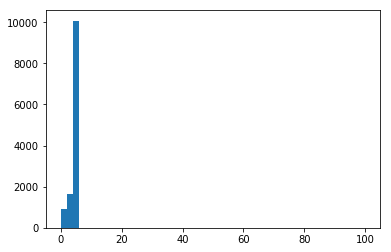

In [50]:
a = plt.hist(tarea,bins=50,range=(0,100))

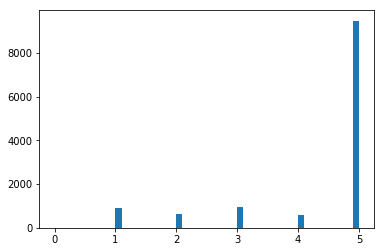

In [45]:
a = plt.hist(tarea,bins=50,range=(0,5))

In [46]:
sum(tarea)

333786

In [47]:
mask = get_gt_mask(1)

In [49]:
np.product(shape(mask))

307200